# Data Loading and Merging

In [2]:
import os  # Import os module for interacting with the operating system (to handle file paths)

# Importing the pandas library to handle data manipulation and analysis.
import pandas as pd

# Setting a pandas option to display all columns when printing data frames.
# This is useful for viewing datasets with a large number of columns without truncation.
pd.set_option('display.max_columns', None)

In [3]:
# Define the column headers for the dataset
columns_header = ['transaction_unique_identifier', 'price', 'date_of_transfer', 'postcode', 'property_type', 'old_new',
                  'duration', 'PAON', 'SAON', 'street', 'locality', 'town_city', 'district', 'county',
                  'pdp_category_type', 'record_status']

# Function to read and merge datasets from multiple parts and years
def read_and_merge_datasets(data_dir, start_year, end_year, parts_per_year=2):
    all_data = []  # Initialize an empty list to store the data for all years

    # Loop over each year within the specified range
    for year in range(start_year, end_year + 1):
        yearly_parts = []  # List to store parts of the dataset for the current year

        # Loop over each part (since data is split into parts for each year)
        for part in range(1, parts_per_year + 1):
            # Construct the file name and file path dynamically for each part of the year
            file_name = f"pp-{year}-part{part}.csv"
            file_path = os.path.join(data_dir, file_name)

            try:
                # Attempt to load the CSV file into a DataFrame
                df = pd.read_csv(file_path)
                # Assign predefined column headers to the DataFrame
                df.columns = columns_header
                # Append the loaded part of the year to the yearly parts list
                yearly_parts.append(df)
                # Print a success message for each loaded file
                print(f"Successfully loaded {file_name}")
            except FileNotFoundError:
                # Handle cases where the file is not found
                print(f"File not found: {file_name}")
            except Exception as e:
                # Handle other potential errors during file loading
                print(f"Error loading {file_name}: {e}")

        # If data was successfully loaded for the current year, concatenate all parts
        if yearly_parts:
            merged_year_data = pd.concat(yearly_parts, ignore_index=True)  # Merge parts of the year
            all_data.append(merged_year_data)  # Append the merged data to the all_data list

    # If data from multiple years was loaded, concatenate it into a single DataFrame
    if all_data:
        year_data_2012_2017 = pd.concat(all_data, ignore_index=True)  # Merge all years' data
        print(f"Successfully merged data for years {start_year} to {end_year}")
        return year_data_2012_2017  # Return the merged DataFrame
    else:
        # If no data was found, print a message and return an empty DataFrame
        print(f"No data found for years {start_year} to {end_year}")
        return pd.DataFrame()

# Specify the directory where the datasets are located
data_directory = ('./datasets/')

# Call the function to read and merge data from 2012 to 2017 (two parts per year)
year_data_2012_2017 = read_and_merge_datasets(data_directory, start_year=2012, end_year=2017, parts_per_year=2)

year_data_2012_2017

Successfully loaded pp-2012-part1.csv
Successfully loaded pp-2012-part2.csv
Successfully loaded pp-2013-part1.csv
Successfully loaded pp-2013-part2.csv
Successfully loaded pp-2014-part1.csv
Successfully loaded pp-2014-part2.csv
Successfully loaded pp-2015-part1.csv
Successfully loaded pp-2015-part2.csv
Successfully loaded pp-2016-part1.csv
Successfully loaded pp-2016-part2.csv
Successfully loaded pp-2017-part1.csv
Successfully loaded pp-2017-part2.csv
Successfully merged data for years 2012 to 2017


,transaction_unique_identifier,price,date_of_transfer,postcode,property_type,old_new,duration,PAON,SAON,street,locality,town_city,district,county,pdp_category_type,record_status
0,{2B730656-E3B6-479E-9ECD-5ADEA87583CE},242300,2012-09-28 00:00,E4 7PG,T,N,F,86,NaN,EPPING WAY,NaN,LONDON,WALTHAM FOREST,GREATER LONDON,A,A
1,{54FE2758-A097-4211-B165-53C37EBE5670},189500,2012-07-20 00:00,CH3 5QX,S,N,F,30,NaN,TOLL BAR ROAD,NaN,CHESTER,CHESHIRE WEST AND CHESTER,CHESHIRE WEST AND CHESTER,A,A
2,{55539D8E-4050-4A77-A921-53C380E2932E},125000,2012-03-09 00:00,BN9 9SA,T,N,F,14,NaN,LAWES AVENUE,NaN,NEWHAVEN,LEWES,EAST SUSSEX,A,A
3,{67855833-AB4E-44E8-BB7D-53C3902D2761},145000,2012-04-20 00:00,CB9 9EH,S,N,F,3,NaN,HONEYSUCKLE CLOSE,NaN,HAVERHILL,ST EDMUNDSBURY,SUFFOLK,A,A
4,{AE31BD58-1B51-4EB9-B595-5744775F93A7},152500,2012-07-16 00:00,IP14 2PR,S,N,F,23,NaN,MELFORD ROAD,NaN,STOWMARKET,MID SUFFOLK,SUFFOLK,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5588223,{5F54B81C-C0BD-2B45-E053-6B04A8C01FB0},187995,2017-06-30 00:00,CB7 5DP,F,Y,L,93,NaN,CELANDINE VIEW,SOHAM,ELY,EAST CAMBRIDGESHIRE,CAMBRIDGESHIRE,A,A
5588224,{5F54B81C-C0BE-2B45-E053-6B04A8C01FB0},1235000,2017-07-14 00:00,CB4 1DT,D,N,F,10,NaN,CHURCH STREET,NaN,CAMBRIDGE,CAMBRIDGE,CAMBRIDGESHIRE,A,A
5588225,{5F54B81C-C0BF-2B45-E053-6B04A8C01FB0},90000,2017-06-16 00:00,PE1 2GA,F,Y,L,2,FLAT 3,PARK ROAD,NaN,PETERBOROUGH,CITY OF PETERBOROUGH,CITY OF PETERBOROUGH,A,A
5588226,{5F54B81C-C0C0-2B45-E053-6B04A8C01FB0},362995,2017-07-06 00:00,PE3 6AR,S,Y,F,EUCALYPTUS HOUSE,NaN,ALDERMANS DRIVE,NaN,PETERBOROUGH,CITY OF PETERBOROUGH,CITY OF PETERBOROUGH,A,A


In [4]:
# Define a function to read and merge datasets that only have one part per year
def read_and_merge_single_part_datasets(data_dir, start_year, end_year):
    all_data = []  # Initialize an empty list to store the data for all years

    # Loop through each year in the specified range
    for year in range(start_year, end_year + 1):
        # Create the file name for the current year dataset
        file_name = f"pp-{year}.csv"
        # Create the full file path by joining the directory and file name
        file_path = os.path.join(data_dir, file_name)

        try:
            # Attempt to read the CSV file into a DataFrame
            df = pd.read_csv(file_path)
            # Rename the columns of the DataFrame to match the specified header
            df.columns = columns_header
            # Append the DataFrame to the list of all data
            all_data.append(df)
            # Print a success message
            print(f"Successfully loaded {file_name}")
        except FileNotFoundError:
            # If the file is not found, print a warning message
            print(f"File not found: {file_name}")
        except Exception as e:
            # Print any other error encountered while reading the file
            print(f"Error loading {file_name}: {e}")

    # Check if any data was loaded successfully
    if all_data:
        # Merge all the yearly DataFrames into a single DataFrame, ignoring the index to maintain data consistency
        merged_data_2018_2022 = pd.concat(all_data, ignore_index=True)
        # Print a success message indicating the range of merged years
        print(f"Successfully merged data for years {start_year} to {end_year}")
        return merged_data_2018_2022  # Return the merged DataFrame
    else:
        # If no data was found, print a message and return an empty DataFrame
        print(f"No data found for years {start_year} to {end_year}")
        return pd.DataFrame()  # Return an empty DataFrame

# Call the function to read and merge datasets for the years 2018 to 2022
year_data_2018_2022 = read_and_merge_single_part_datasets(data_directory, start_year=2018, end_year=2022)

year_data_2018_2022

Successfully loaded pp-2018.csv
Successfully loaded pp-2019.csv
Successfully loaded pp-2020.csv
Successfully loaded pp-2021.csv
Successfully loaded pp-2022.csv
Successfully merged data for years 2018 to 2022


,transaction_unique_identifier,price,date_of_transfer,postcode,property_type,old_new,duration,PAON,SAON,street,locality,town_city,district,county,pdp_category_type,record_status
0,{726BF13A-993F-0A46-E053-6C04A8C01D0D},115000,2018-07-13 00:00,DL17 9LB,S,N,F,4,NaN,THE LANE,WEST CORNFORTH,FERRYHILL,COUNTY DURHAM,COUNTY DURHAM,A,A
1,{726BF13A-9940-0A46-E053-6C04A8C01D0D},24000,2018-04-10 00:00,SR7 9AG,F,N,L,20B,NaN,WOODS TERRACE,MURTON,SEAHAM,COUNTY DURHAM,COUNTY DURHAM,A,A
2,{726BF13A-9941-0A46-E053-6C04A8C01D0D},56000,2018-06-22 00:00,DL5 5PS,T,N,F,6,NaN,HEILD CLOSE,NaN,NEWTON AYCLIFFE,COUNTY DURHAM,COUNTY DURHAM,A,A
3,{726BF13A-9942-0A46-E053-6C04A8C01D0D},220000,2018-05-25 00:00,DL16 7HE,D,N,F,25,NaN,BECKWITH CLOSE,KIRK MERRINGTON,SPENNYMOOR,COUNTY DURHAM,COUNTY DURHAM,A,A
4,{726BF13A-9943-0A46-E053-6C04A8C01D0D},58000,2018-05-09 00:00,DL14 6FH,F,N,L,23,NaN,AINTREE DRIVE,NaN,BISHOP AUCKLAND,COUNTY DURHAM,COUNTY DURHAM,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5265559,{E7B085FC-99AC-7E31-E053-6C04A8C0E67F},166500,2022-07-29 00:00,NG4 2NS,T,N,F,8,NaN,ASPER STREET,NETHERFIELD,NOTTINGHAM,GEDLING,NOTTINGHAMSHIRE,A,A
5265560,{E7B085FC-99AD-7E31-E053-6C04A8C0E67F},595000,2022-07-08 00:00,LE14 3BQ,D,N,F,LANTERN COTTAGE,NaN,STATION ROAD,UPPER BROUGHTON,MELTON MOWBRAY,RUSHCLIFFE,NOTTINGHAMSHIRE,A,A
5265561,{E7B085FC-99AE-7E31-E053-6C04A8C0E67F},260000,2022-03-15 00:00,NG9 5LF,S,N,F,28,NaN,OAKDALE DRIVE,CHILWELL,NOTTINGHAM,BROXTOWE,NOTTINGHAMSHIRE,A,A
5265562,{E7B085FC-99AF-7E31-E053-6C04A8C0E67F},250000,2022-07-19 00:00,NG5 8FZ,D,N,F,37,NaN,HOMEFIELD AVENUE,ARNOLD,NOTTINGHAM,GEDLING,NOTTINGHAMSHIRE,A,A


In [5]:
# Concatenate (merge) the two DataFrames: 'year_data_2012_2017' and 'year_data_2018_2022'
# The ignore_index=True ensures that the index is reset after merging, providing a continuous index
part1_merged = pd.concat([year_data_2012_2017, year_data_2018_2022], ignore_index=True)

part1_merged.shape

(10853792, 16)

In [6]:
# Remove leading and trailing whitespace characters from the 'postcode' column
# and convert all characters to uppercase for standardization.
part1_merged['postcode'] = part1_merged['postcode'].str.strip().str.upper().str.replace(" ", "")

# Display the updated 'postcode' column to verify the changes made.
part1_merged[['postcode']]

,postcode
0,E47PG
1,CH35QX
2,BN99SA
3,CB99EH
4,IP142PR
...,...
10853787,NG42NS
10853788,LE143BQ
10853789,NG95LF
10853790,NG58FZ


In [7]:
part1_merged.to_csv('./datasets/part1_merged.csv', header=True, index=False) 

part1_merged = pd.read_csv('./datasets/part1_merged.csv')

part1_merged.head()

,transaction_unique_identifier,price,date_of_transfer,postcode,property_type,old_new,duration,PAON,SAON,street,locality,town_city,district,county,pdp_category_type,record_status
0,{2B730656-E3B6-479E-9ECD-5ADEA87583CE},242300,2012-09-28 00:00,E47PG,T,N,F,86,NaN,EPPING WAY,NaN,LONDON,WALTHAM FOREST,GREATER LONDON,A,A
1,{54FE2758-A097-4211-B165-53C37EBE5670},189500,2012-07-20 00:00,CH35QX,S,N,F,30,NaN,TOLL BAR ROAD,NaN,CHESTER,CHESHIRE WEST AND CHESTER,CHESHIRE WEST AND CHESTER,A,A
2,{55539D8E-4050-4A77-A921-53C380E2932E},125000,2012-03-09 00:00,BN99SA,T,N,F,14,NaN,LAWES AVENUE,NaN,NEWHAVEN,LEWES,EAST SUSSEX,A,A
3,{67855833-AB4E-44E8-BB7D-53C3902D2761},145000,2012-04-20 00:00,CB99EH,S,N,F,3,NaN,HONEYSUCKLE CLOSE,NaN,HAVERHILL,ST EDMUNDSBURY,SUFFOLK,A,A
4,{AE31BD58-1B51-4EB9-B595-5744775F93A7},152500,2012-07-16 00:00,IP142PR,S,N,F,23,NaN,MELFORD ROAD,NaN,STOWMARKET,MID SUFFOLK,SUFFOLK,A,A


In [8]:
# Read the postcode-local authority district codes lookup dataset & store it in a DataFrame named 'postcodes_2'
postcodes_2 = pd.read_excel('./datasets/2_postcodes_LAD.xlsx')

# Read the local authority district codes-ITL code lookup dataset & store it in a DataFrame named 'itl_codes_3'
itl_codes_3 = pd.read_csv('./datasets/3_Local_Authority_District_(April_2023)_to_LAU1_to_ITL3_to_ITL2_to_ITL1_(January_2021)Lookup.csv')

# Display the contents of the 'postcodes_2' DataFrame to verify that the data has been read correctly.
postcodes_2.Postcode = postcodes_2['Postcode'].str.strip().str.upper().str.replace(" ", "")
postcodes_2 = postcodes_2[['Postcode', 'LAD Code']]

print(postcodes_2.shape)

postcodes_2.head()

(1048575, 2)


,Postcode,LAD Code
0,AB10AA,S12000033
1,AB10AB,S12000033
2,AB10AD,S12000033
3,AB10AE,S12000034
4,AB10AF,S12000033


In [9]:
# Select only the columns 'LAD23CD' and 'ITL321CD' from the 'itl_codes_3' DataFrame
# to keep only the relevant data needed for further analysis.
itl_codes_3 = itl_codes_3[['LAD23CD', 'ITL321CD']]

# Rename the selected columns for better readability and understanding:
# 'LAD23CD' is renamed to 'LAD Code' and 'ITL321CD' is renamed to 'ITL Code'.
itl_codes_3.columns = ['LAD Code', 'ITL Code']

# Display the updated 'itl_codes_3' DataFrame to verify the changes made to the columns.
print(itl_codes_3.shape)

itl_codes_3.head()

(388, 2)


,LAD Code,ITL Code
0,E06000001,TLC11
1,E06000004,TLC11
2,E06000002,TLC12
3,E06000003,TLC12
4,E06000005,TLC13


In [10]:
lat_long_new = pd.read_csv('./datasets/ONSPD_FEB_2023_UK.csv')

lat_long_new = lat_long_new[['pcd', 'lat', 'long']]
lat_long_new.columns = ['Postcode', 'latitude', 'longitude']

lat_long_new['Postcode'] = lat_long_new['Postcode'].str.strip().str.upper().str.replace(" ", "")

print('Number of rows and columns: ', lat_long_new.shape)

lat_long_new.head()

/var/folders/27/nqdbxn3d1glgghfp86tjryqc0000gn/T/ipykernel_9937/1818192797.py:1: DtypeWarning: Columns (18,31,40,45,50,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  lat_long_new = pd.read_csv('./datasets/ONSPD_FEB_2023_UK.csv')


Number of rows and columns:  (2687274, 3)


,Postcode,latitude,longitude
0,AB10AA,57.101474,-2.242851
1,AB10AB,57.102554,-2.246308
2,AB10AD,57.100556,-2.248342
3,AB10AE,57.084444,-2.255708
4,AB10AF,57.096656,-2.258102


In [11]:
pcd_lat_long = pd.merge(postcodes_2, lat_long_new, on='Postcode', how='inner')

print(pcd_lat_long.shape)

pcd_lat_long.head()

(1045926, 4)


,Postcode,LAD Code,latitude,longitude
0,AB10AA,S12000033,57.101474,-2.242851
1,AB10AB,S12000033,57.102554,-2.246308
2,AB10AD,S12000033,57.100556,-2.248342
3,AB10AE,S12000034,57.084444,-2.255708
4,AB10AF,S12000033,57.096656,-2.258102


In [12]:
# Merge the 'postcodes_2' DataFrame with the 'itl_codes_3' DataFrame
# using the 'LAD Code' column as the key.
# The 'how' parameter is set to 'left' to keep all records from 'postcodes_2'
# and include matching records from 'itl_codes_3'.
postcode_itl = pd.merge(postcodes_2, itl_codes_3, on='LAD Code', how='left')

# Display the final 'postcode_itl' DataFrame to verify the merged results and selected columns.
postcode_itl_lat_long = pd.merge(postcode_itl, lat_long_new, on='Postcode', how='inner')

print(postcode_itl_lat_long.shape)

postcode_itl_lat_long.head()

(1204726, 5)


,Postcode,LAD Code,ITL Code,latitude,longitude
0,AB10AA,S12000033,TLM50,57.101474,-2.242851
1,AB10AB,S12000033,TLM50,57.102554,-2.246308
2,AB10AD,S12000033,TLM50,57.100556,-2.248342
3,AB10AE,S12000034,TLM50,57.084444,-2.255708
4,AB10AF,S12000033,TLM50,57.096656,-2.258102


In [13]:
# Perform an inner merge between the 'part1_merged' DataFrame and the 'postcode_itl' DataFrame.
# The merge is done on the 'postcode' column from 'part1_merged' and the 'Postcode' column from 'postcode_itl'.
# An inner join means only the records with matching values in both DataFrames will be kept.
first_three_parts = pd.merge(part1_merged, postcode_itl_lat_long, left_on='postcode', right_on='Postcode', how='inner')

# Display the resulting 'first_three_parts' DataFrame to verify the merge operation
# and to inspect the combined data from both DataFrames.
first_three_parts

,transaction_unique_identifier,price,date_of_transfer,postcode,property_type,old_new,duration,PAON,SAON,street,locality,town_city,district,county,pdp_category_type,record_status,Postcode,LAD Code,ITL Code,latitude,longitude
0,{2B730656-E3B6-479E-9ECD-5ADEA87583CE},242300,2012-09-28 00:00,E47PG,T,N,F,86,NaN,EPPING WAY,NaN,LONDON,WALTHAM FOREST,GREATER LONDON,A,A,E47PG,E09000031,TLI53,51.638436,-0.007006
1,{54FE2758-A097-4211-B165-53C37EBE5670},189500,2012-07-20 00:00,CH35QX,S,N,F,30,NaN,TOLL BAR ROAD,NaN,CHESTER,CHESHIRE WEST AND CHESTER,CHESHIRE WEST AND CHESTER,A,A,CH35QX,E06000050,TLD63,53.187813,-2.849749
2,{55539D8E-4050-4A77-A921-53C380E2932E},125000,2012-03-09 00:00,BN99SA,T,N,F,14,NaN,LAWES AVENUE,NaN,NEWHAVEN,LEWES,EAST SUSSEX,A,A,BN99SA,E07000063,TLJ22,50.794711,0.045205
3,{67855833-AB4E-44E8-BB7D-53C3902D2761},145000,2012-04-20 00:00,CB99EH,S,N,F,3,NaN,HONEYSUCKLE CLOSE,NaN,HAVERHILL,ST EDMUNDSBURY,SUFFOLK,A,A,CB99EH,E07000245,TLH14,52.088841,0.423241
4,{53A98F2D-81FE-4ADA-B1CF-50200A8EE38D},230000,2012-01-12 00:00,GU195EW,T,N,F,75,NaN,COLLEGE RIDE,NaN,BAGSHOT,SURREY HEATH,SURREY,A,A,GU195EW,E07000214,TLJ25,51.359556,-0.702501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4568294,{E7B085FC-8A67-7E31-E053-6C04A8C0E67F},1550000,2022-05-06 00:00,EC2Y8DD,F,N,L,CROMWELL TOWER,FLAT 242,BARBICAN,NaN,LONDON,CITY OF LONDON,GREATER LONDON,A,A,EC2Y8DD,E09000001,TLI31,51.520576,-0.092820
4568295,{E7B085FC-8A69-7E31-E053-6C04A8C0E67F},370000,2022-07-22 00:00,HA02JP,F,N,L,CIRCLE COURT,12,HARROWDENE ROAD,NaN,WEMBLEY,BRENT,GREATER LONDON,A,A,HA02JP,E09000005,TLI72,51.559027,-0.304809
4568296,{E7B085FC-8A6B-7E31-E053-6C04A8C0E67F},955000,2022-06-17 00:00,EC2A4AP,F,N,L,25,GROUND FLOOR AND BASEMENT,COWPER STREET,NaN,LONDON,ISLINGTON,GREATER LONDON,A,A,EC2A4AP,E09000019,TLI43,51.525522,-0.085117
4568297,{E7B085FC-8A6D-7E31-E053-6C04A8C0E67F},896000,2022-04-14 00:00,EN51DU,S,N,F,4,NaN,LYONSDOWN AVENUE,NEW BARNET,BARNET,BARNET,GREATER LONDON,A,A,EN51DU,E09000003,TLI71,51.642659,-0.176631


In [14]:
# Convert the 'date_of_transfer' column in the 'first_three_parts' DataFrame to datetime format.
# This allows for easier manipulation and extraction of date-related information.
first_three_parts.date_of_transfer = pd.to_datetime(first_three_parts.date_of_transfer)

# Create a new column 'year' in the 'first_three_parts' DataFrame by extracting the year
# from the 'date_of_transfer' column using the dt accessor.
first_three_parts['year'] = first_three_parts.date_of_transfer.dt.year

# Display the first few rows of the updated 'first_three_parts' DataFrame to verify the changes
# and to check the new 'year' column along with the other columns.
first_three_parts.head()

,transaction_unique_identifier,price,date_of_transfer,postcode,property_type,old_new,duration,PAON,SAON,street,locality,town_city,district,county,pdp_category_type,record_status,Postcode,LAD Code,ITL Code,latitude,longitude,year
0,{2B730656-E3B6-479E-9ECD-5ADEA87583CE},242300,2012-09-28,E47PG,T,N,F,86,NaN,EPPING WAY,NaN,LONDON,WALTHAM FOREST,GREATER LONDON,A,A,E47PG,E09000031,TLI53,51.638436,-0.007006,2012
1,{54FE2758-A097-4211-B165-53C37EBE5670},189500,2012-07-20,CH35QX,S,N,F,30,NaN,TOLL BAR ROAD,NaN,CHESTER,CHESHIRE WEST AND CHESTER,CHESHIRE WEST AND CHESTER,A,A,CH35QX,E06000050,TLD63,53.187813,-2.849749,2012
2,{55539D8E-4050-4A77-A921-53C380E2932E},125000,2012-03-09,BN99SA,T,N,F,14,NaN,LAWES AVENUE,NaN,NEWHAVEN,LEWES,EAST SUSSEX,A,A,BN99SA,E07000063,TLJ22,50.794711,0.045205,2012
3,{67855833-AB4E-44E8-BB7D-53C3902D2761},145000,2012-04-20,CB99EH,S,N,F,3,NaN,HONEYSUCKLE CLOSE,NaN,HAVERHILL,ST EDMUNDSBURY,SUFFOLK,A,A,CB99EH,E07000245,TLH14,52.088841,0.423241,2012
4,{53A98F2D-81FE-4ADA-B1CF-50200A8EE38D},230000,2012-01-12,GU195EW,T,N,F,75,NaN,COLLEGE RIDE,NaN,BAGSHOT,SURREY HEATH,SURREY,A,A,GU195EW,E07000214,TLJ25,51.359556,-0.702501,2012


In [15]:
# The 'pd.read_excel()' function is used to load excel file.
# the sheet name ('Table 2') to read from, and 'skiprows=1' to skip the first row (usually containing metadata).
gdhi_4_1 = pd.read_excel('./datasets/4_regionalgrossdisposablehouseholdincomeallitlregions20221.xlsx', sheet_name='Table 2', skiprows=1)

# Select only the relevant columns from the 'gdhi_4_1' DataFrame for further analysis.
# The columns selected are: 'ITL', 'ITL code', 'Region name', and annual income data from 2012 to 2022.
gdhi_4_1 = gdhi_4_1[['ITL', 'ITL code', 'Region name', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]

# Display the first few rows of the 'gdhi_4_1' DataFrame to verify the data has been read correctly
# and to inspect the selected columns.
gdhi_4_1.head()

,ITL,ITL code,Region name,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,UK,UK,United Kingdom,63710843,64138721,64619493,65088058,65607141,65965992,66288927,66630707,66744067,66983488,67603461
1,Other,TLB,England,53506812,53918686,54370319,54808676,55289034,55619548,55924528,56230056,56325961,56554891,57112542
2,ITL1,TLC,North East,2598972,2603299,2610482,2611804,2618253,2623787,2629393,2636676,2637426,2647493,2682069
3,ITL2,TLC1,Tees Valley and Durham,1177283,1178584,1181036,1182799,1185354,1188601,1190189,1193188,1193651,1199812,1216827
4,ITL3,TLC11,Hartlepool and Stockton-on-Tees,285181,286388,287471,287915,288672,289352,289797,289261,288590,289607,293959


In [16]:
# Reshape the 'gdhi_4_1' DataFrame from wide format to long format using the 'melt()' function.
# The 'id_vars' parameter specifies the columns that should remain as identifier variables ('ITL', 'ITL code', 'Region name'),
# while the other columns are unpivoted into two new columns: 'year' and 'population'.
gdhi_long = gdhi_4_1.melt(id_vars=['ITL', 'ITL code', 'Region name'], var_name='year', value_name='population')

# Extract the year from the 'year' column using a regular expression,
# converting the extracted year string to an integer data type.
gdhi_long['year'] = gdhi_long['year'].str.extract('(\d{4})').astype(int)

# Convert the 'population' column to numeric values, coercing any errors (e.g., non-numeric values) to NaN.
# This ensures that the population data is in a format suitable for numerical operations and analysis.
gdhi_long['population'] = pd.to_numeric(gdhi_long['population'], errors='coerce')

# Display the reshaped 'gdhi_long' DataFrame to verify the transformation and inspect the data.
gdhi_long

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/var/folders/27/nqdbxn3d1glgghfp86tjryqc0000gn/T/ipykernel_9937/1938218638.py:8: SyntaxWarning: invalid escape sequence '\d'
  gdhi_long['year'] = gdhi_long['year'].str.extract('(\d{4})').astype(int)


,ITL,ITL code,Region name,year,population
0,UK,UK,United Kingdom,2012,63710843.0
1,Other,TLB,England,2012,53506812.0
2,ITL1,TLC,North East,2012,2598972.0
3,ITL2,TLC1,Tees Valley and Durham,2012,1177283.0
4,ITL3,TLC11,Hartlepool and Stockton-on-Tees,2012,285181.0
...,...,...,...,...,...
2569,ITL3,TLN0C,Causeway Coast and Glens,2022,141316.0
2570,ITL3,TLN0D,Antrim and Newtownabbey,2022,146148.0
2571,ITL3,TLN0E,Lisburn and Castlereagh,2022,149915.0
2572,ITL3,TLN0F,Mid and East Antrim,2022,139200.0


In [17]:
# Merge the 'gdhi_long' DataFrame with the 'first_three_parts' DataFrame using the 'pd.merge()' function.
# This operation combines the two DataFrames based on the specified key columns.
# - 'how='left'' specifies a left join, meaning all rows from 'first_three_parts' will be retained,
#   and matching rows from 'gdhi_long' will be added where available.
# - 'left_on=['ITL Code', 'year']' specifies the columns from 'first_three_parts' to match on.
# - 'right_on=['ITL code', 'year']' specifies the corresponding columns from 'gdhi_long' to match on.
first_four_parts = pd.merge(first_three_parts, gdhi_long, how='left', left_on=['ITL Code', 'year'], right_on=['ITL code', 'year'])

# Display the merged DataFrame 'first_four_parts' to verify the results of the merge operation.
first_four_parts

,transaction_unique_identifier,price,date_of_transfer,postcode,property_type,old_new,duration,PAON,SAON,street,locality,town_city,district,county,pdp_category_type,record_status,Postcode,LAD Code,ITL Code,latitude,longitude,year,ITL,ITL code,Region name,population
0,{2B730656-E3B6-479E-9ECD-5ADEA87583CE},242300,2012-09-28,E47PG,T,N,F,86,NaN,EPPING WAY,NaN,LONDON,WALTHAM FOREST,GREATER LONDON,A,A,E47PG,E09000031,TLI53,51.638436,-0.007006,2012,ITL3,TLI53,Redbridge and Waltham Forest,549012.0
1,{54FE2758-A097-4211-B165-53C37EBE5670},189500,2012-07-20,CH35QX,S,N,F,30,NaN,TOLL BAR ROAD,NaN,CHESTER,CHESHIRE WEST AND CHESTER,CHESHIRE WEST AND CHESTER,A,A,CH35QX,E06000050,TLD63,53.187813,-2.849749,2012,ITL3,TLD63,Cheshire West and Chester,331231.0
2,{55539D8E-4050-4A77-A921-53C380E2932E},125000,2012-03-09,BN99SA,T,N,F,14,NaN,LAWES AVENUE,NaN,NEWHAVEN,LEWES,EAST SUSSEX,A,A,BN99SA,E07000063,TLJ22,50.794711,0.045205,2012,ITL3,TLJ22,East Sussex CC,530358.0
3,{67855833-AB4E-44E8-BB7D-53C3902D2761},145000,2012-04-20,CB99EH,S,N,F,3,NaN,HONEYSUCKLE CLOSE,NaN,HAVERHILL,ST EDMUNDSBURY,SUFFOLK,A,A,CB99EH,E07000245,TLH14,52.088841,0.423241,2012,ITL3,TLH14,Suffolk CC,732697.0
4,{53A98F2D-81FE-4ADA-B1CF-50200A8EE38D},230000,2012-01-12,GU195EW,T,N,F,75,NaN,COLLEGE RIDE,NaN,BAGSHOT,SURREY HEATH,SURREY,A,A,GU195EW,E07000214,TLJ25,51.359556,-0.702501,2012,ITL3,TLJ25,West Surrey,758887.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4568294,{E7B085FC-8A67-7E31-E053-6C04A8C0E67F},1550000,2022-05-06,EC2Y8DD,F,N,L,CROMWELL TOWER,FLAT 242,BARBICAN,NaN,LONDON,CITY OF LONDON,GREATER LONDON,A,A,EC2Y8DD,E09000001,TLI31,51.520576,-0.092820,2022,ITL3,TLI31,Camden and City of London,228822.0
4568295,{E7B085FC-8A69-7E31-E053-6C04A8C0E67F},370000,2022-07-22,HA02JP,F,N,L,CIRCLE COURT,12,HARROWDENE ROAD,NaN,WEMBLEY,BRENT,GREATER LONDON,A,A,HA02JP,E09000005,TLI72,51.559027,-0.304809,2022,ITL3,TLI72,Brent,341183.0
4568296,{E7B085FC-8A6B-7E31-E053-6C04A8C0E67F},955000,2022-06-17,EC2A4AP,F,N,L,25,GROUND FLOOR AND BASEMENT,COWPER STREET,NaN,LONDON,ISLINGTON,GREATER LONDON,A,A,EC2A4AP,E09000019,TLI43,51.525522,-0.085117,2022,ITL3,TLI43,Haringey and Islington,482007.0
4568297,{E7B085FC-8A6D-7E31-E053-6C04A8C0E67F},896000,2022-04-14,EN51DU,S,N,F,4,NaN,LYONSDOWN AVENUE,NEW BARNET,BARNET,BARNET,GREATER LONDON,A,A,EN51DU,E09000003,TLI71,51.642659,-0.176631,2022,ITL3,TLI71,Barnet,390346.0


In [18]:
# The 'pd.read_excel()' function is used to load the data, specifying the path to the file,
# the sheet name ('Table 3') to read from, and 'skiprows=1' to skip the first row (usually containing metadata).
gdhi_4_2 = pd.read_excel('./datasets/4_regionalgrossdisposablehouseholdincomeallitlregions20221.xlsx', sheet_name='Table 3', skiprows=1)

# Select only the relevant columns from the 'gdhi_4_2' DataFrame for further analysis.
# The columns selected are: 'ITL', 'ITL code', 'Region name', and annual income data from 2012 to 2022.
gdhi_4_2 = gdhi_4_2[['ITL', 'ITL code', 'Region name', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]

gdhi_4_2.head()

,ITL,ITL code,Region name,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,UK,UK,United Kingdom,16870,17506,18061,19004,19227,19677,20406,21015,20962,21635,22789
1,Other,TLB,England,17190,17851,18425,19448,19682,20136,20904,21515,21433,22137,23338
2,ITL1,TLC,North East,14227,14564,14959,15516,15718,16038,16474,16991,17239,17592,18388
3,ITL2,TLC1,Tees Valley and Durham,13930,14242,14703,15194,15368,15687,16137,16625,16917,17200,17955
4,ITL3,TLC11,Hartlepool and Stockton-on-Tees,14363,14528,14957,15328,15536,15871,16217,16857,17190,17600,18411


In [19]:
# Reshape the 'gdhi_4_2' DataFrame from wide format to long format using the 'melt()' function.
# The 'id_vars' parameter specifies the columns that should remain as identifier variables ('ITL', 'ITL code', 'Region name'),
# while the other columns are unpivoted into two new columns: 'year' and 'GDHI'.
gdhi_long_2 = gdhi_4_2.melt(id_vars=['ITL', 'ITL code', 'Region name'], var_name='year', value_name='GDHI')

# Extract the year from the 'year' column using a regular expression,
# converting the extracted year string to an integer data type.
gdhi_long_2['year'] = gdhi_long_2['year'].str.extract('(\d{4})').astype(int)

# Convert the 'GDHI' column to numeric values, coercing any errors (e.g., non-numeric values) to NaN.
# This ensures that the GDHI data is in a format suitable for numerical operations and analysis.
gdhi_long_2['GDHI'] = pd.to_numeric(gdhi_long_2['GDHI'], errors='coerce')

# Merge the reshaped 'gdhi_long_2' DataFrame with the previously merged 'first_four_parts' DataFrame.
# The merging is done based on matching 'ITL code' and 'year' columns from both DataFrames.
# The 'how='left'' parameter indicates a left join, meaning all rows from 'first_four_parts' will be kept,
# and matching rows from 'gdhi_long_2' will be added where available.
first_four_parts = pd.merge(first_four_parts, gdhi_long_2, how='left', left_on=['ITL code', 'year'], right_on=['ITL code', 'year'])

first_four_parts.head()

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/var/folders/27/nqdbxn3d1glgghfp86tjryqc0000gn/T/ipykernel_9937/883368772.py:8: SyntaxWarning: invalid escape sequence '\d'
  gdhi_long_2['year'] = gdhi_long_2['year'].str.extract('(\d{4})').astype(int)


,transaction_unique_identifier,price,date_of_transfer,postcode,property_type,old_new,duration,PAON,SAON,street,locality,town_city,district,county,pdp_category_type,record_status,Postcode,LAD Code,ITL Code,latitude,longitude,year,ITL_x,ITL code,Region name_x,population,ITL_y,Region name_y,GDHI
0,{2B730656-E3B6-479E-9ECD-5ADEA87583CE},242300,2012-09-28,E47PG,T,N,F,86,NaN,EPPING WAY,NaN,LONDON,WALTHAM FOREST,GREATER LONDON,A,A,E47PG,E09000031,TLI53,51.638436,-0.007006,2012,ITL3,TLI53,Redbridge and Waltham Forest,549012.0,ITL3,Redbridge and Waltham Forest,17629.0
1,{54FE2758-A097-4211-B165-53C37EBE5670},189500,2012-07-20,CH35QX,S,N,F,30,NaN,TOLL BAR ROAD,NaN,CHESTER,CHESHIRE WEST AND CHESTER,CHESHIRE WEST AND CHESTER,A,A,CH35QX,E06000050,TLD63,53.187813,-2.849749,2012,ITL3,TLD63,Cheshire West and Chester,331231.0,ITL3,Cheshire West and Chester,17550.0
2,{55539D8E-4050-4A77-A921-53C380E2932E},125000,2012-03-09,BN99SA,T,N,F,14,NaN,LAWES AVENUE,NaN,NEWHAVEN,LEWES,EAST SUSSEX,A,A,BN99SA,E07000063,TLJ22,50.794711,0.045205,2012,ITL3,TLJ22,East Sussex CC,530358.0,ITL3,East Sussex CC,18150.0
3,{67855833-AB4E-44E8-BB7D-53C3902D2761},145000,2012-04-20,CB99EH,S,N,F,3,NaN,HONEYSUCKLE CLOSE,NaN,HAVERHILL,ST EDMUNDSBURY,SUFFOLK,A,A,CB99EH,E07000245,TLH14,52.088841,0.423241,2012,ITL3,TLH14,Suffolk CC,732697.0,ITL3,Suffolk CC,16200.0
4,{53A98F2D-81FE-4ADA-B1CF-50200A8EE38D},230000,2012-01-12,GU195EW,T,N,F,75,NaN,COLLEGE RIDE,NaN,BAGSHOT,SURREY HEATH,SURREY,A,A,GU195EW,E07000214,TLJ25,51.359556,-0.702501,2012,ITL3,TLJ25,West Surrey,758887.0,ITL3,West Surrey,24222.0


In [20]:
bank_rates_5 = pd.read_csv('./datasets/5_bank_rate.csv')

# Convert the 'Date Changed' column from string format to datetime format using 'pd.to_datetime()'.
# The 'format' parameter specifies the expected format of the date strings in the column.
# This conversion allows for easier date manipulation and analysis.
bank_rates_5['Date Changed'] = pd.to_datetime(bank_rates_5['Date Changed'])

# Rename the columns of the DataFrame for clarity and consistency.
# The first column is renamed to 'Date Changed', and the second column is renamed to 'bank_rate'.
bank_rates_5.columns = ['Date Changed', 'bank_rate']

print(bank_rates_5.shape)

bank_rates_5.head()

(253, 2)


/var/folders/27/nqdbxn3d1glgghfp86tjryqc0000gn/T/ipykernel_9937/3489718197.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bank_rates_5['Date Changed'] = pd.to_datetime(bank_rates_5['Date Changed'])


,Date Changed,bank_rate
0,2024-08-01,5.00
1,2023-08-03,5.25
2,2023-06-22,5.00
3,2023-05-11,4.50
4,2023-03-23,4.25


In [21]:
# Convert 'Date Changed' to datetime format.
# This allows for proper date manipulation and comparisons in later steps.
bank_rates_5['Date Changed'] = pd.to_datetime(bank_rates_5['Date Changed'], format='%d-%b-%y')

# Sort the DataFrame by 'Date Changed' in ascending order to ensure chronological order.
bank_rates_5 = bank_rates_5.sort_values(by='Date Changed')

# Define the specific date range of interest (from January 1, 2012, to December 31, 2022).
start_date = pd.Timestamp('2012-01-01')
end_date = pd.Timestamp('2022-12-31')

# Generate a complete date range that spans from the earliest date to the latest date within the specified range.
# This ensures that we have a record for each date even if there's no change in the bank rate on certain days.
full_date_range = pd.date_range(start=max(bank_rates_5['Date Changed'].min(), start_date),
                                end=min(bank_rates_5['Date Changed'].max(), end_date))

# Create a new DataFrame using this full date range, which will be used to store the bank rates corresponding to each date.
bank_rates_5_full = pd.DataFrame(full_date_range, columns=['date'])

# Initialize a new column 'bank_rate' in the full DataFrame with NaN values, which will later hold the corresponding bank rates.
bank_rates_5_full['bank_rate'] = None

# Loop through each row in the original bank rates DataFrame (except the last one) to fill in the bank rates based on the date range.
for i in range(len(bank_rates_5) - 1):
    # Create a mask that identifies the date range between two 'Date Changed' values.
    mask = (bank_rates_5_full['date'] >= bank_rates_5.iloc[i]['Date Changed']) & (bank_rates_5_full['date'] < bank_rates_5.iloc[i+1]['Date Changed'])

    # Use the mask to assign the bank rate to the appropriate dates in the full DataFrame.
    bank_rates_5_full.loc[mask, 'bank_rate'] = bank_rates_5.iloc[i]['bank_rate']

bank_rates_5_full

,date,bank_rate
0,2012-01-01,0.5
1,2012-01-02,0.5
2,2012-01-03,0.5
3,2012-01-04,0.5
4,2012-01-05,0.5
...,...,...
4013,2022-12-27,3.5
4014,2022-12-28,3.5
4015,2022-12-29,3.5
4016,2022-12-30,3.5


In [22]:
# Count the occurrences of each unique bank rate in the 'bank_rate' column of the bank_rates_5_full DataFrame.
# This provides insight into how many times each bank rate value appears, which can be useful for understanding
# the distribution of bank rates over the specified date range.
bank_rates_5_full.bank_rate.value_counts()

bank_rate
0.5     1992
0.1      637
0.75     636
0.25     512
1.25      49
1.75      49
1.0       42
2.25      42
3.0       42
3.5       17
Name: count, dtype: int64

In [23]:
# Load the Consumer Prices Index (Housing) data from a CSV file.
# The `skiprows` parameter is set to 477 to skip initial rows that are not needed.
cpih_6 = pd.read_csv('./datasets/6_cpih.csv', skiprows=477)

# Select the first 132 rows from the DataFrame to limit the dataset to the relevant portion.
cpih_6 = cpih_6.iloc[:132, :]

# Rename the columns for clarity:
# 'date' for the date of the CPIH measurement and 'CPIH' for the actual index value.
cpih_6.columns = ['date', 'CPIH']

cpih_6

,date,CPIH
0,2012 JAN,94.7
1,2012 FEB,95.2
2,2012 MAR,95.4
3,2012 APR,95.9
4,2012 MAY,95.9
...,...,...
127,2022 AUG,121.8
128,2022 SEP,122.3
129,2022 OCT,124.3
130,2022 NOV,124.8


In [24]:
# Convert the 'date' column into a datetime format.
# The format '%Y %b' is used to parse the year and the abbreviated month name (e.g., '2022 Jan').
cpih_6['date'] = pd.to_datetime(cpih_6['date'], format='%Y %b')

# Create an empty DataFrame to store the daily CPIH data for each day of the month.
cpih_6_full = pd.DataFrame()

# Loop through each row in the DataFrame to generate daily data.
for i, row in cpih_6.iterrows():
    # Generate a date range for the full month, from the start date to the end of the month.
    days = pd.date_range(start=row['date'], end=row['date'] + pd.offsets.MonthEnd(0), freq='D')

    # Create a new DataFrame for the daily data with the generated date range.
    # The 'CPIH' value for each day in the month is set to the corresponding CPIH value from the original DataFrame.
    daily_data = pd.DataFrame({
        'date': days,
        'CPIH': row['CPIH']  # Assign the CPIH value to all days in the month
    })

    # Append the daily data DataFrame to the cumulative result DataFrame.
    cpih_6_full = pd.concat([cpih_6_full, daily_data])

# Reset the index of the final DataFrame to ensure it is continuous and ordered correctly.
cpih_6_full.reset_index(drop=True, inplace=True)

cpih_6_full

,date,CPIH
0,2012-01-01,94.7
1,2012-01-02,94.7
2,2012-01-03,94.7
3,2012-01-04,94.7
4,2012-01-05,94.7
...,...,...
4013,2022-12-27,125.3
4014,2022-12-28,125.3
4015,2022-12-29,125.3
4016,2022-12-30,125.3


In [25]:
# Load the unemployment data from a CSV file, skipping the first 765 rows to get to the relevant data.
unemployment_7 = pd.read_csv('./datasets/7_unemployment.csv', skiprows=765)

# Select the first 132 rows of the DataFrame to keep only the necessary data for analysis.
unemployment_7 = unemployment_7.iloc[:132, :]

# Rename the columns of the DataFrame for easier access and understanding.
# The first column is named 'date' and the second is named 'unemployment_rate'.
unemployment_7.columns = ['date', 'unemployment_rate']

unemployment_7

,date,unemployment_rate
0,2012 JAN,8.3
1,2012 FEB,8.2
2,2012 MAR,8.2
3,2012 APR,8.1
4,2012 MAY,8.0
...,...,...
127,2022 AUG,3.8
128,2022 SEP,3.9
129,2022 OCT,3.8
130,2022 NOV,3.9


In [26]:
# Convert the 'date' column into a datetime format using the specified format.
unemployment_7['date'] = pd.to_datetime(unemployment_7['date'], format='%Y %b')

# Create an empty DataFrame to store daily dates and unemployment rates.
unemployment_7_full = pd.DataFrame()

# Loop through each row in the unemployment DataFrame to generate daily records.
for i, row in unemployment_7.iterrows():
    # Generate a date range for the entire month based on the current row's date.
    days = pd.date_range(start=row['date'], end=row['date'] + pd.offsets.MonthEnd(0), freq='D')

    # Create a new DataFrame to hold the daily unemployment data for the current month.
    daily_data = pd.DataFrame({
        'date': days,
        'unemployment_rate': row['unemployment_rate']  # Assign the same unemployment rate to each day in the month.
    })

    # Append the new daily data to the result DataFrame.
    unemployment_7_full = pd.concat([unemployment_7_full, daily_data])

# Reset the index of the final DataFrame to ensure it is sequential and clean.
unemployment_7_full.reset_index(drop=True, inplace=True)

unemployment_7_full

,date,unemployment_rate
0,2012-01-01,8.3
1,2012-01-02,8.3
2,2012-01-03,8.3
3,2012-01-04,8.3
4,2012-01-05,8.3
...,...,...
4013,2022-12-27,3.8
4014,2022-12-28,3.8
4015,2022-12-29,3.8
4016,2022-12-30,3.8


In [27]:
# Read the GDP data from a CSV file, skipping the first 311 rows to focus on relevant data.
gdp_8 = pd.read_csv('./datasets/8_gdp.csv', skiprows=311)

# Select the first 44 rows of the DataFrame for analysis.
gdp_8 = gdp_8.iloc[:44, :]

# Rename the columns for clarity; 'date' will represent the time, and 'GDP' will hold GDP values.
gdp_8.columns = ['date', 'GDP']

gdp_8.head()

,date,GDP
0,2012 Q1,532300
1,2012 Q2,531663
2,2012 Q3,536720
3,2012 Q4,536188
4,2013 Q1,537974


In [28]:
# Create a list to hold expanded daily GDP data
expanded_data = []

# Loop through each row in the GDP DataFrame
for index, row in gdp_8.iterrows():
    quarter = row['date']  # Extract quarter label
    gdp_value = row['GDP']  # Extract GDP value

    # Determine start and end dates for each quarter
    if 'Q1' in quarter:
        start_date = f"{quarter.split()[0]}-01-01"  # Q1 start date
        end_date = f"{quarter.split()[0]}-03-31"    # Q1 end date
    elif 'Q2' in quarter:
        start_date = f"{quarter.split()[0]}-04-01"  # Q2 start date
        end_date = f"{quarter.split()[0]}-06-30"    # Q2 end date
    elif 'Q3' in quarter:
        start_date = f"{quarter.split()[0]}-07-01"  # Q3 start date
        end_date = f"{quarter.split()[0]}-09-30"    # Q3 end date
    elif 'Q4' in quarter:
        start_date = f"{quarter.split()[0]}-10-01"  # Q4 start date
        end_date = f"{quarter.split()[0]}-12-31"    # Q4 end date

    # Create a date range for the quarter
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')

    # Append each date with its corresponding GDP value
    for date in date_range:
        expanded_data.append({'date': date, 'GDP': gdp_value})

# Create a new DataFrame from the expanded data
gdp_8_full = pd.DataFrame(expanded_data)

gdp_8_full

,date,GDP
0,2012-01-01,532300
1,2012-01-02,532300
2,2012-01-03,532300
3,2012-01-04,532300
4,2012-01-05,532300
...,...,...
4013,2022-12-27,634044
4014,2022-12-28,634044
4015,2022-12-29,634044
4016,2022-12-30,634044


In [29]:
# Step 1: Merge bank rates with CPIH data
bank_cpih_merged = pd.merge(bank_rates_5_full, cpih_6_full, how='left', on='date')

# Step 2: Merge the result with unemployment data
bank_cpih_unemployment_merged = pd.merge(bank_cpih_merged, unemployment_7_full, how='left', on='date')

# Step 3: Merge the result with GDP data
bank_cpih_unemployment_gdp_merged = pd.merge(bank_cpih_unemployment_merged, gdp_8_full, how='left', on='date')

bank_cpih_unemployment_gdp_merged

,date,bank_rate,CPIH,unemployment_rate,GDP
0,2012-01-01,0.5,94.7,8.3,532300
1,2012-01-02,0.5,94.7,8.3,532300
2,2012-01-03,0.5,94.7,8.3,532300
3,2012-01-04,0.5,94.7,8.3,532300
4,2012-01-05,0.5,94.7,8.3,532300
...,...,...,...,...,...
4013,2022-12-27,3.5,125.3,3.8,634044
4014,2022-12-28,3.5,125.3,3.8,634044
4015,2022-12-29,3.5,125.3,3.8,634044
4016,2022-12-30,3.5,125.3,3.8,634044


In [30]:
bank_cpih_unemployment_gdp_merged.date = pd.to_datetime(bank_cpih_unemployment_gdp_merged.date)

bank_cpih_unemployment_gdp_merged.head()

,date,bank_rate,CPIH,unemployment_rate,GDP
0,2012-01-01,0.5,94.7,8.3,532300
1,2012-01-02,0.5,94.7,8.3,532300
2,2012-01-03,0.5,94.7,8.3,532300
3,2012-01-04,0.5,94.7,8.3,532300
4,2012-01-05,0.5,94.7,8.3,532300


In [31]:
# Merge first_four_parts with the bank_cpih_unemployment_gdp_merged DataFrame
all_merging_done_final_ready_data = pd.merge(first_four_parts, bank_cpih_unemployment_gdp_merged, how='left', left_on='date_of_transfer', right_on='date')

all_merging_done_final_ready_data.head()

,transaction_unique_identifier,price,date_of_transfer,postcode,property_type,old_new,duration,PAON,SAON,street,locality,town_city,district,county,pdp_category_type,record_status,Postcode,LAD Code,ITL Code,latitude,longitude,year,ITL_x,ITL code,Region name_x,population,ITL_y,Region name_y,GDHI,date,bank_rate,CPIH,unemployment_rate,GDP
0,{2B730656-E3B6-479E-9ECD-5ADEA87583CE},242300,2012-09-28,E47PG,T,N,F,86,NaN,EPPING WAY,NaN,LONDON,WALTHAM FOREST,GREATER LONDON,A,A,E47PG,E09000031,TLI53,51.638436,-0.007006,2012,ITL3,TLI53,Redbridge and Waltham Forest,549012.0,ITL3,Redbridge and Waltham Forest,17629.0,2012-09-28,0.5,96.4,7.9,536720
1,{54FE2758-A097-4211-B165-53C37EBE5670},189500,2012-07-20,CH35QX,S,N,F,30,NaN,TOLL BAR ROAD,NaN,CHESTER,CHESHIRE WEST AND CHESTER,CHESHIRE WEST AND CHESTER,A,A,CH35QX,E06000050,TLD63,53.187813,-2.849749,2012,ITL3,TLD63,Cheshire West and Chester,331231.0,ITL3,Cheshire West and Chester,17550.0,2012-07-20,0.5,95.7,7.9,536720
2,{55539D8E-4050-4A77-A921-53C380E2932E},125000,2012-03-09,BN99SA,T,N,F,14,NaN,LAWES AVENUE,NaN,NEWHAVEN,LEWES,EAST SUSSEX,A,A,BN99SA,E07000063,TLJ22,50.794711,0.045205,2012,ITL3,TLJ22,East Sussex CC,530358.0,ITL3,East Sussex CC,18150.0,2012-03-09,0.5,95.4,8.2,532300
3,{67855833-AB4E-44E8-BB7D-53C3902D2761},145000,2012-04-20,CB99EH,S,N,F,3,NaN,HONEYSUCKLE CLOSE,NaN,HAVERHILL,ST EDMUNDSBURY,SUFFOLK,A,A,CB99EH,E07000245,TLH14,52.088841,0.423241,2012,ITL3,TLH14,Suffolk CC,732697.0,ITL3,Suffolk CC,16200.0,2012-04-20,0.5,95.9,8.1,531663
4,{53A98F2D-81FE-4ADA-B1CF-50200A8EE38D},230000,2012-01-12,GU195EW,T,N,F,75,NaN,COLLEGE RIDE,NaN,BAGSHOT,SURREY HEATH,SURREY,A,A,GU195EW,E07000214,TLJ25,51.359556,-0.702501,2012,ITL3,TLJ25,West Surrey,758887.0,ITL3,West Surrey,24222.0,2012-01-12,0.5,94.7,8.3,532300


In [32]:
all_merging_done_final_ready_data.columns

Index(['transaction_unique_identifier', 'price', 'date_of_transfer',
       'postcode', 'property_type', 'old_new', 'duration', 'PAON', 'SAON',
       'street', 'locality', 'town_city', 'district', 'county',
       'pdp_category_type', 'record_status', 'Postcode', 'LAD Code',
       'ITL Code', 'latitude', 'longitude', 'year', 'ITL_x', 'ITL code',
       'Region name_x', 'population', 'ITL_y', 'Region name_y', 'GDHI', 'date',
       'bank_rate', 'CPIH', 'unemployment_rate', 'GDP'],
      dtype='object')

In [33]:
# Step 1: Extract the 'ITL code' column into a separate DataFrame
itl_code = all_merging_done_final_ready_data[['ITL code']]

# Step 2: Drop specified columns from the main DataFrame
all_merging_done_final_ready_data.drop(['ITL_x', 'ITL_y', 'Postcode', 'ITL code', 'Region name_x', 'Region name_y'], axis=1, inplace=True)

# Step 3: Display a random sample of 5 rows from the modified DataFrame
all_merging_done_final_ready_data.sample(5)

,transaction_unique_identifier,price,date_of_transfer,postcode,property_type,old_new,duration,PAON,SAON,street,locality,town_city,district,county,pdp_category_type,record_status,LAD Code,ITL Code,latitude,longitude,year,population,GDHI,date,bank_rate,CPIH,unemployment_rate,GDP
3317328,{A2479555-0FBE-74C7-E053-6B04A8C0887D},199995,2020-01-28,CM170GH,F,Y,L,3,NaN,DUNNOCK ROAD,NaN,HARLOW,HARLOW,ESSEX,A,A,E07000073,TLH35,51.789175,0.148113,2020,317466.0,25329.0,2020-01-28,0.75,108.3,4.1,604719
1241910,{F5AAD28F-489F-4658-B080-06257E37EE12},236000,2015-04-08,CA130GW,S,Y,F,72,NaN,WOODVILLE PARK,NaN,COCKERMOUTH,ALLERDALE,CUMBRIA,A,A,E06000063,TLD12,54.661502,-3.369752,2015,265169.0,19213.0,2015-04-08,0.5,99.9,5.7,572673
2356128,{75050A85-95A5-9A88-E053-6B04A8C02390},250000,2018-08-23,CR02NG,F,N,L,"VICEROY COURT, 36",53,DINGWALL ROAD,NaN,CROYDON,CROYDON,GREATER LONDON,A,A,E09000008,TLI62,51.378441,-0.095199,2018,386999.0,22716.0,2018-08-23,0.75,106.5,4.2,609653
468775,{7276D03E-C8C4-4B73-9AD1-30FB95AFBFEA},83000,2013-08-16,DL41EX,S,N,F,18,NaN,DEAN GARDENS,NaN,SHILDON,COUNTY DURHAM,COUNTY DURHAM,A,A,E06000047,TLC14,54.635720,-1.650076,2013,513179.0,14230.0,2013-08-16,0.5,98.4,7.6,546064
2123147,{49B78529-F3D7-7921-E050-A8C063056E8D},110000,2017-01-20,CO28YH,F,N,L,51,NaN,AVIGNON CLOSE,NaN,COLCHESTER,COLCHESTER,ESSEX,A,A,E07000071,TLH34,51.874279,0.918130,2017,483922.0,18953.0,2017-01-20,0.25,101.8,4.7,594423


In [34]:
all_merging_done_final_ready_data.to_csv('./datasets/all_merging_done_final_ready_data.csv', header=True, index=False)  

all_merging_done_final_ready_data = pd.read_csv('./datasets/all_merging_done_final_ready_data.csv')

all_merging_done_final_ready_data.head()

,transaction_unique_identifier,price,date_of_transfer,postcode,property_type,old_new,duration,PAON,SAON,street,locality,town_city,district,county,pdp_category_type,record_status,LAD Code,ITL Code,latitude,longitude,year,population,GDHI,date,bank_rate,CPIH,unemployment_rate,GDP
0,{2B730656-E3B6-479E-9ECD-5ADEA87583CE},242300,2012-09-28,E47PG,T,N,F,86,NaN,EPPING WAY,NaN,LONDON,WALTHAM FOREST,GREATER LONDON,A,A,E09000031,TLI53,51.638436,-0.007006,2012,549012.0,17629.0,2012-09-28,0.5,96.4,7.9,536720
1,{54FE2758-A097-4211-B165-53C37EBE5670},189500,2012-07-20,CH35QX,S,N,F,30,NaN,TOLL BAR ROAD,NaN,CHESTER,CHESHIRE WEST AND CHESTER,CHESHIRE WEST AND CHESTER,A,A,E06000050,TLD63,53.187813,-2.849749,2012,331231.0,17550.0,2012-07-20,0.5,95.7,7.9,536720
2,{55539D8E-4050-4A77-A921-53C380E2932E},125000,2012-03-09,BN99SA,T,N,F,14,NaN,LAWES AVENUE,NaN,NEWHAVEN,LEWES,EAST SUSSEX,A,A,E07000063,TLJ22,50.794711,0.045205,2012,530358.0,18150.0,2012-03-09,0.5,95.4,8.2,532300
3,{67855833-AB4E-44E8-BB7D-53C3902D2761},145000,2012-04-20,CB99EH,S,N,F,3,NaN,HONEYSUCKLE CLOSE,NaN,HAVERHILL,ST EDMUNDSBURY,SUFFOLK,A,A,E07000245,TLH14,52.088841,0.423241,2012,732697.0,16200.0,2012-04-20,0.5,95.9,8.1,531663
4,{53A98F2D-81FE-4ADA-B1CF-50200A8EE38D},230000,2012-01-12,GU195EW,T,N,F,75,NaN,COLLEGE RIDE,NaN,BAGSHOT,SURREY HEATH,SURREY,A,A,E07000214,TLJ25,51.359556,-0.702501,2012,758887.0,24222.0,2012-01-12,0.5,94.7,8.3,532300


In [35]:
# the reason behind .copy() is that making changes in the final_ready_data will not have any affect of the  all_merging_done_final_ready_data
final_ready_data = all_merging_done_final_ready_data.copy()

print(final_ready_data.shape)

final_ready_data.sample(10, random_state=42)

(4568299, 28)


,transaction_unique_identifier,price,date_of_transfer,postcode,property_type,old_new,duration,PAON,SAON,street,locality,town_city,district,county,pdp_category_type,record_status,LAD Code,ITL Code,latitude,longitude,year,population,GDHI,date,bank_rate,CPIH,unemployment_rate,GDP
2014543,{61D8894D-C55C-3DE6-E053-6C04A8C01207},35000,2017-12-01,DL159EA,T,N,F,15,NaN,WILSON STREET,NaN,CROOK,COUNTY DURHAM,COUNTY DURHAM,A,A,E06000047,TLC14,54.717485,-1.745830,2017,515911.0,15716.0,2017-12-01,0.50,105.0,4.4,606396
4011512,{DBA933F8-EA52-669D-E053-6B04A8C0AD56},400000,2021-10-26,BS35BA,S,N,F,328,NaN,ST JOHNS LANE,NaN,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,A,E06000023,TLK11,51.435774,-2.597028,2021,471285.0,21089.0,2021-10-26,0.10,113.4,4.2,624592
4212622,{F87E72F8-C447-176C-E053-6B04A8C0D2BE},300000,2022-11-18,EX141PZ,T,N,F,43,NaN,MONKTON ROAD,NaN,HONITON,EAST DEVON,DEVON,A,A,E07000040,TLK43,50.802269,-3.179937,2022,826108.0,22209.0,2022-11-18,3.00,124.8,3.9,634044
4259135,{E073986B-984D-2134-E053-6C04A8C0233B},258550,2022-04-25,HG13JE,D,N,F,8,NaN,RIPLEY WAY,NaN,HARROGATE,HARROGATE,NORTH YORKSHIRE,A,A,E06000065,TLE22,54.010850,-1.545866,2022,623896.0,24277.0,2022-04-25,0.75,119.0,3.9,631258
2525854,{79A74E22-AD3D-1289-E053-6B04A8C01627},365000,2018-10-12,B64NH,O,N,F,OCTAGON BUSINESS CENTRE,UNIT 1,MILLER STREET,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,B,A,E08000025,TLG31,52.493863,-1.892284,2018,1146050.0,14745.0,2018-10-12,0.75,106.7,4.1,610481
4503908,{0B85394F-CB32-69A5-E063-4704A8C07DAC},367000,2022-09-16,BH119FZ,S,Y,F,22,NaN,MORTIMER PLACE,BEARWOOD,BOURNEMOUTH,"BOURNEMOUTH, CHRISTCHURCH AND POOLE","BOURNEMOUTH, CHRISTCHURCH AND POOLE",A,A,E06000058,TLK24,50.769932,-1.940523,2022,402559.0,23108.0,2022-09-16,1.75,122.3,3.9,631977
3448381,{B82222ED-261C-6691-E053-6B04A8C02FB2},175000,2020-11-05,HG27PA,S,N,L,16,NaN,FIRST AVENUE,NaN,HARROGATE,HARROGATE,NORTH YORKSHIRE,B,A,E06000065,TLE22,53.995490,-1.498380,2020,610899.0,22127.0,2020-11-05,0.10,109.1,5.3,570338
2606251,{726BF13B-2511-0A46-E053-6C04A8C01D0D},470000,2018-06-25,HG42JE,T,N,F,13,NaN,CRESCENT PARADE,NaN,RIPON,HARROGATE,NORTH YORKSHIRE,A,A,E06000065,TLE22,54.141145,-1.525369,2018,607735.0,21648.0,2018-06-25,0.50,105.9,4.1,607775
3769978,{C18F412A-98EC-81A6-E053-6B04A8C0AD18},122500,2021-02-12,CA13NB,S,N,F,31,NaN,MAYFIELD AVENUE,NaN,CARLISLE,CARLISLE,CUMBRIA,A,A,E06000063,TLD11,54.879705,-2.906972,2021,230922.0,18868.0,2021-02-12,0.10,109.4,5.1,564411
1039845,{21E5FEB6-6937-2439-E050-A8C06205342E},111000,2015-04-23,DE560ER,T,N,F,34,NaN,NASEBY ROAD,NaN,BELPER,AMBER VALLEY,DERBYSHIRE,B,A,E07000032,TLF13,53.025692,-1.450969,2015,496160.0,18442.0,2015-04-23,0.50,99.9,5.7,572673


In [36]:
# 'index=False' prevents pandas from writing row indices to the CSV file, which is usually unnecessary for most applications.
final_ready_data.to_csv('./datasets/final_ready_data.csv', header=True, index=False, float_format='%.6f')

final_ready_data = pd.read_csv('./datasets/final_ready_data.csv')

final_ready_data.head()

,transaction_unique_identifier,price,date_of_transfer,postcode,property_type,old_new,duration,PAON,SAON,street,locality,town_city,district,county,pdp_category_type,record_status,LAD Code,ITL Code,latitude,longitude,year,population,GDHI,date,bank_rate,CPIH,unemployment_rate,GDP
0,{2B730656-E3B6-479E-9ECD-5ADEA87583CE},242300,2012-09-28,E47PG,T,N,F,86,NaN,EPPING WAY,NaN,LONDON,WALTHAM FOREST,GREATER LONDON,A,A,E09000031,TLI53,51.638436,-0.007006,2012,549012.0,17629.0,2012-09-28,0.5,96.4,7.9,536720
1,{54FE2758-A097-4211-B165-53C37EBE5670},189500,2012-07-20,CH35QX,S,N,F,30,NaN,TOLL BAR ROAD,NaN,CHESTER,CHESHIRE WEST AND CHESTER,CHESHIRE WEST AND CHESTER,A,A,E06000050,TLD63,53.187813,-2.849749,2012,331231.0,17550.0,2012-07-20,0.5,95.7,7.9,536720
2,{55539D8E-4050-4A77-A921-53C380E2932E},125000,2012-03-09,BN99SA,T,N,F,14,NaN,LAWES AVENUE,NaN,NEWHAVEN,LEWES,EAST SUSSEX,A,A,E07000063,TLJ22,50.794711,0.045205,2012,530358.0,18150.0,2012-03-09,0.5,95.4,8.2,532300
3,{67855833-AB4E-44E8-BB7D-53C3902D2761},145000,2012-04-20,CB99EH,S,N,F,3,NaN,HONEYSUCKLE CLOSE,NaN,HAVERHILL,ST EDMUNDSBURY,SUFFOLK,A,A,E07000245,TLH14,52.088841,0.423241,2012,732697.0,16200.0,2012-04-20,0.5,95.9,8.1,531663
4,{53A98F2D-81FE-4ADA-B1CF-50200A8EE38D},230000,2012-01-12,GU195EW,T,N,F,75,NaN,COLLEGE RIDE,NaN,BAGSHOT,SURREY HEATH,SURREY,A,A,E07000214,TLJ25,51.359556,-0.702501,2012,758887.0,24222.0,2012-01-12,0.5,94.7,8.3,532300


In [37]:
import joblib
import matplotlib.pyplot as plt
import seaborn           as sns
import numpy             as np
import pandas            as pd
import pickle
import time
import warnings

from collections                     import Counter
from sklearn.ensemble                import RandomForestRegressor
from sklearn.linear_model            import LinearRegression
from sklearn.metrics                 import root_mean_squared_error
from sklearn.metrics                 import mean_absolute_error
from sklearn.metrics                 import r2_score
from sklearn.model_selection         import train_test_split
from sklearn.naive_bayes             import MultinomialNB

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.reset_option("display.max_info_columns")

# Data Analysis and Visualisation

In [39]:
final_ready_data = pd.read_csv('./datasets/final_ready_data.csv')
final_ready_data['date_of_transfer'] = pd.to_datetime(final_ready_data['date_of_transfer'])
final_ready_data['month'] = final_ready_data['date_of_transfer'].dt.month
final_ready_data['day'] = final_ready_data['date_of_transfer'].dt.day
final_ready_data.to_pickle('./datasets/final_ready_data_pkl.pkl')

# less size, quick saving and loading.

# Load the DataFrame from pickle file
final_ready_data = pd.read_pickle('./datasets/final_ready_data_pkl.pkl')
final_ready_data

,transaction_unique_identifier,price,date_of_transfer,postcode,property_type,old_new,duration,PAON,SAON,street,locality,town_city,district,county,pdp_category_type,record_status,LAD Code,ITL Code,latitude,longitude,year,population,GDHI,date,bank_rate,CPIH,unemployment_rate,GDP,month,day
0,{2B730656-E3B6-479E-9ECD-5ADEA87583CE},242300,2012-09-28,E47PG,T,N,F,86,NaN,EPPING WAY,NaN,LONDON,WALTHAM FOREST,GREATER LONDON,A,A,E09000031,TLI53,51.638436,-0.007006,2012,549012.0,17629.0,2012-09-28,0.50,96.4,7.9,536720,9,28
1,{54FE2758-A097-4211-B165-53C37EBE5670},189500,2012-07-20,CH35QX,S,N,F,30,NaN,TOLL BAR ROAD,NaN,CHESTER,CHESHIRE WEST AND CHESTER,CHESHIRE WEST AND CHESTER,A,A,E06000050,TLD63,53.187813,-2.849749,2012,331231.0,17550.0,2012-07-20,0.50,95.7,7.9,536720,7,20
2,{55539D8E-4050-4A77-A921-53C380E2932E},125000,2012-03-09,BN99SA,T,N,F,14,NaN,LAWES AVENUE,NaN,NEWHAVEN,LEWES,EAST SUSSEX,A,A,E07000063,TLJ22,50.794711,0.045205,2012,530358.0,18150.0,2012-03-09,0.50,95.4,8.2,532300,3,9
3,{67855833-AB4E-44E8-BB7D-53C3902D2761},145000,2012-04-20,CB99EH,S,N,F,3,NaN,HONEYSUCKLE CLOSE,NaN,HAVERHILL,ST EDMUNDSBURY,SUFFOLK,A,A,E07000245,TLH14,52.088841,0.423241,2012,732697.0,16200.0,2012-04-20,0.50,95.9,8.1,531663,4,20
4,{53A98F2D-81FE-4ADA-B1CF-50200A8EE38D},230000,2012-01-12,GU195EW,T,N,F,75,NaN,COLLEGE RIDE,NaN,BAGSHOT,SURREY HEATH,SURREY,A,A,E07000214,TLJ25,51.359556,-0.702501,2012,758887.0,24222.0,2012-01-12,0.50,94.7,8.3,532300,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4568294,{E7B085FC-8A67-7E31-E053-6C04A8C0E67F},1550000,2022-05-06,EC2Y8DD,F,N,L,CROMWELL TOWER,FLAT 242,BARBICAN,NaN,LONDON,CITY OF LONDON,GREATER LONDON,A,A,E09000001,TLI31,51.520576,-0.092820,2022,228822.0,62428.0,2022-05-06,1.00,119.7,3.9,631258,5,6
4568295,{E7B085FC-8A69-7E31-E053-6C04A8C0E67F},370000,2022-07-22,HA02JP,F,N,L,CIRCLE COURT,12,HARROWDENE ROAD,NaN,WEMBLEY,BRENT,GREATER LONDON,A,A,E09000005,TLI72,51.559027,-0.304809,2022,341183.0,27434.0,2022-07-22,1.25,121.2,3.6,631977,7,22
4568296,{E7B085FC-8A6B-7E31-E053-6C04A8C0E67F},955000,2022-06-17,EC2A4AP,F,N,L,25,GROUND FLOOR AND BASEMENT,COWPER STREET,NaN,LONDON,ISLINGTON,GREATER LONDON,A,A,E09000019,TLI43,51.525522,-0.085117,2022,482007.0,35815.0,2022-06-17,1.25,120.5,3.7,631258,6,17
4568297,{E7B085FC-8A6D-7E31-E053-6C04A8C0E67F},896000,2022-04-14,EN51DU,S,N,F,4,NaN,LYONSDOWN AVENUE,NEW BARNET,BARNET,BARNET,GREATER LONDON,A,A,E09000003,TLI71,51.642659,-0.176631,2022,390346.0,33730.0,2022-04-14,0.75,119.0,3.9,631258,4,14


In [40]:
# Step 1: Generate summary statistics for the DataFrame
# This provides descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset's distribution
summary_statistics = final_ready_data.describe().T

# Step 2: Display the summary statistics
summary_statistics  # Display the summary statistics DataFrame

,count,mean,min,25%,50%,75%,max,std
price,4568299.0,312569.000651,1.0,148000.0,228000.0,350000.0,421364142.0,1163313.58302
date_of_transfer,4568299,2017-11-06 16:37:30.212081408,2012-01-01 00:00:00,2015-04-23 00:00:00,2017-11-13 00:00:00,2020-09-11 00:00:00,2022-12-31 00:00:00,NaN
latitude,4568299.0,52.369506,50.517666,51.406882,51.895192,53.556933,55.128374,1.221488
longitude,4568299.0,-1.520587,-4.640901,-2.454379,-1.71735,-0.409655,1.44786,1.246085
year,4568299.0,2017.324123,2012.0,2015.0,2017.0,2020.0,2022.0,3.072771
population,4568299.0,528577.95114,105557.0,344151.0,525063.0,612169.0,1205137.0,220310.669028
GDHI,4568299.0,19858.177613,11449.0,17179.0,19739.0,22127.0,62428.0,3810.426959
bank_rate,4568299.0,0.533118,0.1,0.25,0.5,0.5,3.5,0.480672
CPIH,4568299.0,105.463206,94.7,100.0,104.5,109.1,125.3,6.874384
unemployment_rate,4568299.0,5.108921,3.6,4.1,4.8,5.6,8.3,1.257174


posx and posy should be finite values
posx and posy should be finite values


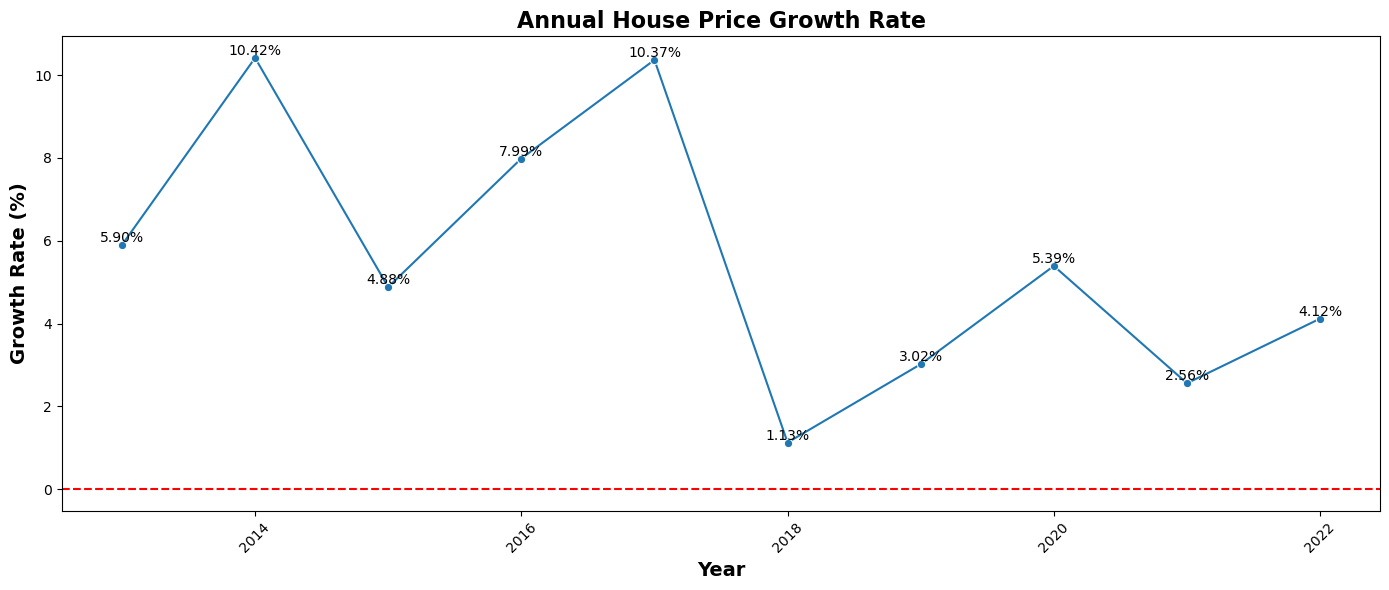

In [41]:
# Calculate the average price by year
average_price_per_year = final_ready_data.groupby('year')['price'].mean().reset_index()

# Calculate percentage change
average_price_per_year['growth_rate'] = average_price_per_year['price'].pct_change() * 100

# Plotting the growth rate
plt.figure(figsize=(14, 6))
sns.lineplot(data=average_price_per_year, x='year', y='growth_rate', marker='o', palette='pastel')
plt.title('Annual House Price Growth Rate', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14, weight='bold')
plt.ylabel('Growth Rate (%)', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--')  # Line at 0% growth

# Annotating the growth rate values
for i in range(len(average_price_per_year)):
    plt.text(x=average_price_per_year['year'].iloc[i], 
             y=average_price_per_year['growth_rate'].iloc[i], 
             s=f"{average_price_per_year['growth_rate'].iloc[i]:.2f}%", 
             ha='center', va='bottom', fontsize=10)
    
plt.tight_layout()
plt.show()

**Analysis of Average Price Growth Rate Over the Years:**

- **Growth Peaks:** The highest growth rates occurred in 2014 and 2017, with over 10% growth rate. This could indicate periods of high demand or economic factors favoring price increases.

- **Gradual Decline Post-2017:** After 2017, the growth rate trends downward, showing a more stabilized market with only modest growth rates in most years.

- **Low in 2018:** 2018 saw the lowest growth rate (1.13%), possibly suggesting a cooling off in the market, reduced demand, or economic uncertainty.

- **Minor Uptick in 2020:** A slight growth rebound in 2020 (5.39%) might reflect increased demand during early pandemic conditions when many sought new homes.

This visualization highlights the housing market's cyclicality, with high growth years followed by periods of stability or slower increases.

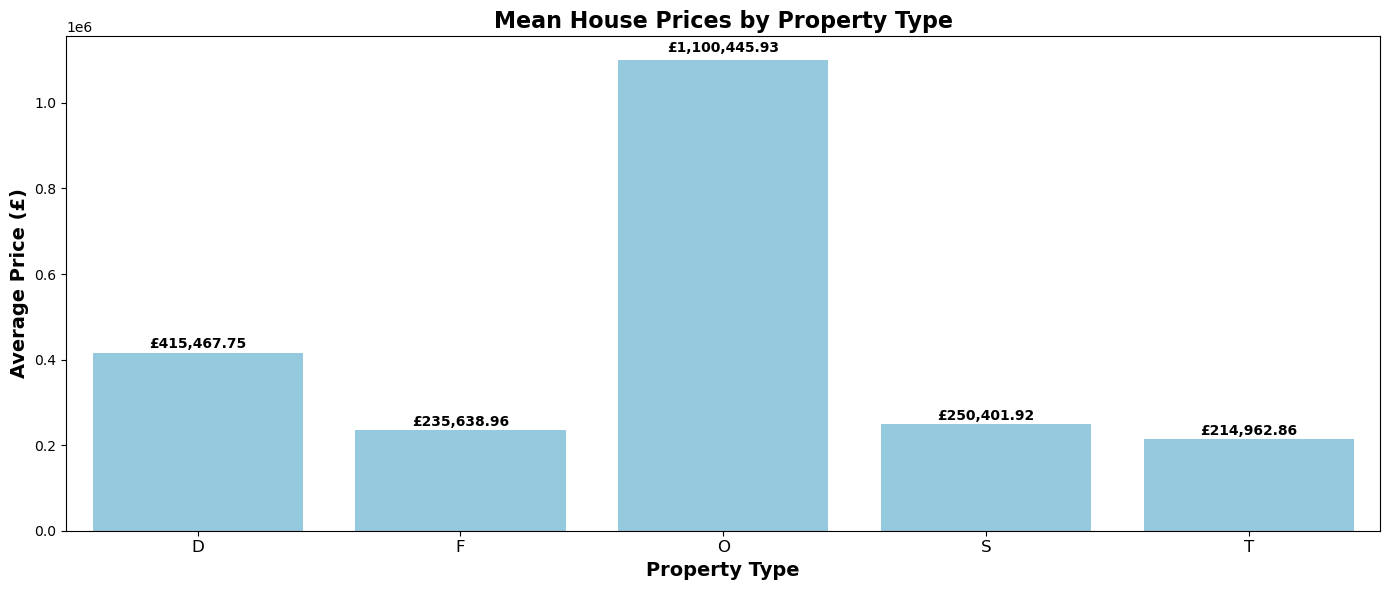

In [43]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate mean prices by property type
mean_prices = final_ready_data.groupby('property_type')['price'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(14, 6))

# Create the bar plot
sns.barplot(data=mean_prices, x='property_type', y='price', color='skyblue', ci=None)

# Add title and labels
plt.title('Mean House Prices by Property Type', fontsize=16, weight='bold')
plt.xlabel('Property Type', fontsize=14, weight='bold')
plt.ylabel('Average Price (£)', fontsize=14, weight='bold')
plt.xticks(fontsize=12)

# Adding average price as text annotations above each bar
for i, row in mean_prices.iterrows():
    x_pos = i  # X-axis position for the property type
    y_pos = row['price']  # Y-axis value (mean price)
    plt.text(x=x_pos, 
             y=y_pos + (y_pos * 0.01),  # Slightly above the bar
             s=f"£{y_pos:,.2f}",  # Format mean price as currency
             ha='center',  # Center alignment horizontally
             va='bottom',  # Text placed just above the bar
             fontsize=10, 
             color='black', 
             weight='bold')

# Adjust layout for a clean visualization
plt.tight_layout()

# Show the plot
plt.show()

### **Analysis of House Prices by Property Type**

This point plot illustrates the average house prices across different property types. Here are the key insights based on the aggregated data:

- **Detached (D)**:

  - **Average Price**: £415,467

  - **Interpretation**: Detached homes command a higher price on average, reflecting the premium associated with this property type, which often includes more space and privacy.

- **Flats (F)**:

  - **Average Price**: £235,639

  - **Interpretation**: Flats are positioned as a more affordable option, appealing to buyers seeking lower prices in urban areas.

- **Other (O)**:

  - **Average Price**: £1,100,446

  - **Interpretation**: The "Other" category shows exceptional price variability, suggesting it could have outliers or high-end or specialized properties that are not typical residential options.

- **Semi-Detached (S)**:

  - **Average Price**: £250,401

  - **Interpretation**: Semi-detached homes have moderately priced averages and relatively stable pricing, making them a common and accessible choice for families.

- **Terraced (T)**:

  - **Average Price**: £214,963

  - **Interpretation**: Terraced homes represent a more affordable housing option, with a smaller price spread than detached properties, appealing to buyers looking for budget-friendly homes.

### **Summary:**

- **Detached homes(D)** have a relatively high average price, but it is significantly lower than **Others(O)**, which seems to include either luxury homes or a special category of properties.
- **Flats(F)** and **Semi-Detached(S)** homes have similar price ranges, making them more affordable compared to **Detached(D)** homes.
- **Terraced(T)** homes have the lowest average prices of all property types.
- **Others(O)** The "Other" category shows exceptionally high prices , suggesting it could have outliers or high-end and specialized properties that are not typical residential options.


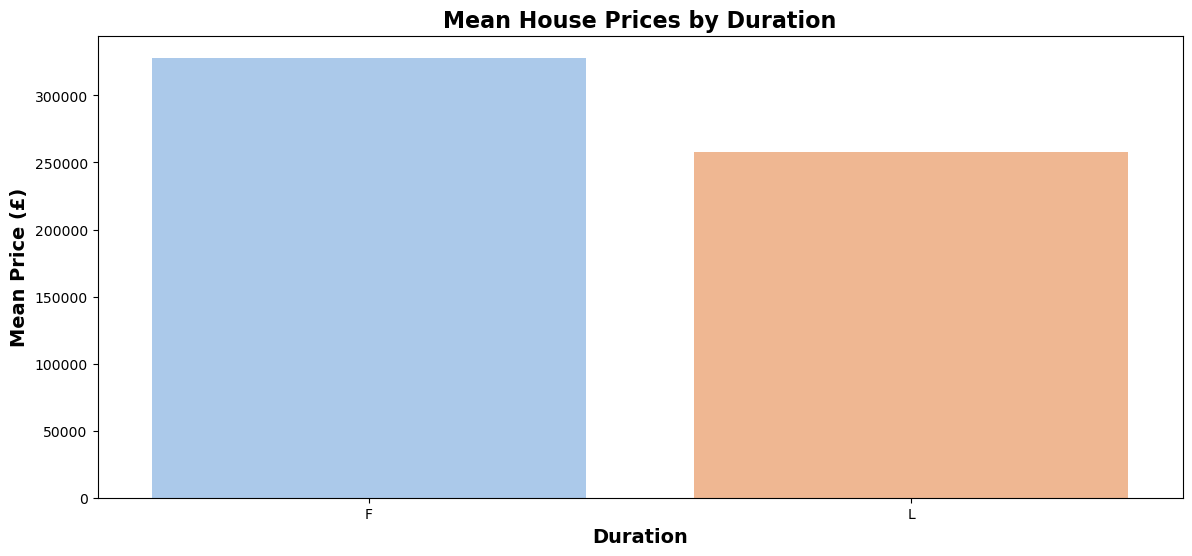

In [45]:
# Calculate mean price by duration
mean_price_duration = final_ready_data.groupby('duration')['price'].agg(['mean', 'std']).reset_index()

# Plotting mean house prices by duration with error bars
plt.figure(figsize=(14, 6))
sns.barplot(data=mean_price_duration, x='duration', y='mean', ci='sd', palette='pastel')
plt.title('Mean House Prices by Duration', fontsize=16, weight='bold')
plt.xlabel('Duration', fontsize=14, weight='bold')
plt.ylabel('Mean Price (£)', fontsize=14, weight='bold')

plt.show()

**Analysis of Mean Price by Duration:**

- The average price for a **Freehold(F)** property is £328,107.60.
- The average price for a **Leasehold(L)** property is £257,506.06.
- The price difference between a Freehold and Leasehold property is £70,601.54, with the Freehold property being more expensive.
- The percentage difference between the two is approximately 27.43%, indicating that Freehold properties are significantly more expensive than Leasehold properties.

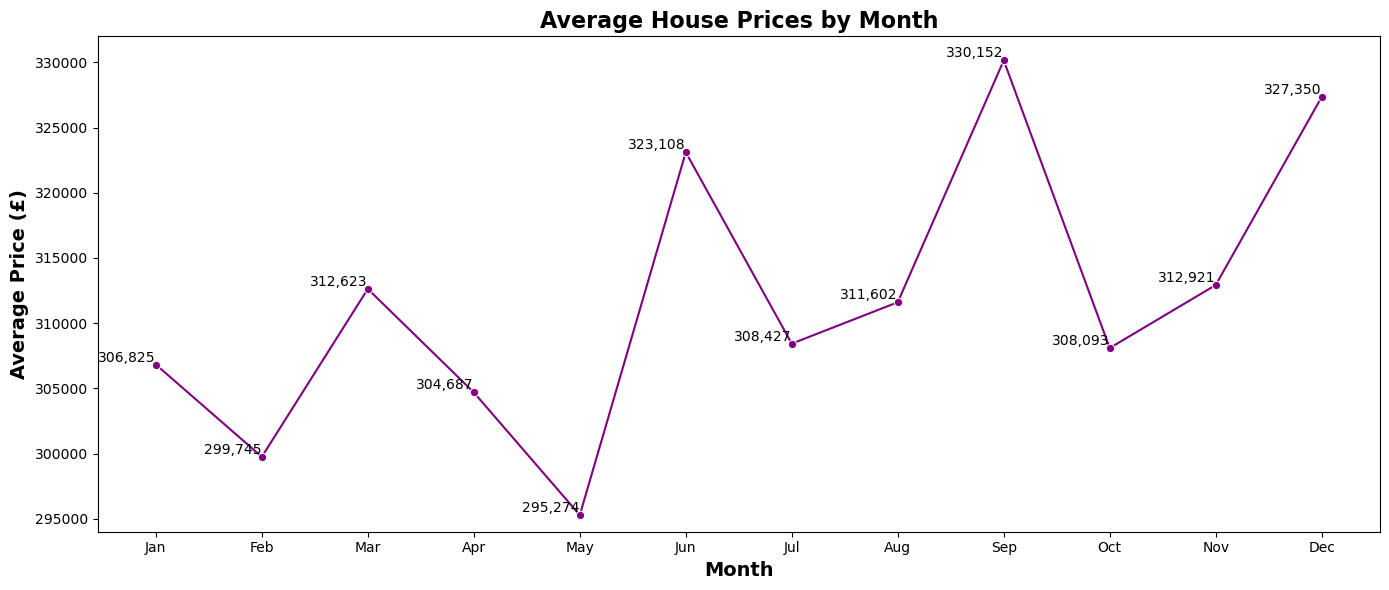

In [47]:
# Calculate average price by month
average_price_month = final_ready_data.groupby('month')['price'].mean().reset_index()

# Plotting average price by month
plt.figure(figsize=(14, 6))
sns.lineplot(data=average_price_month, x='month', y='price', marker='o', color='purple')
plt.title('Average House Prices by Month', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=14, weight='bold')
plt.ylabel('Average Price (£)', fontsize=14, weight='bold')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

for x, y in zip(average_price_month['month'], average_price_month['price']):
    plt.text(x, y, f'{y:,.0f}', ha='right', va='bottom', fontsize=10, color='black')

plt.ylim(294000, 332000)
plt.tight_layout()

plt.show()

**Analysis of Average House Prices by Month:**

- Average house prices reach their highest in September (£330,152), possibly indicating increased demand as summer ends and buyers finalize purchases for the year.

- The lowest average price occurs in May (£295,274), hinting at a potential market lull or seasonal dip during late spring.

- Prices increase in summer, with June (£323,108) and July (£308,427) showing elevated averages, likely due to a seasonal uptick in buyer activity.

- December prices average £327,350, which may reflect year-end buying behavior or final market adjustments.

This pattern indicates that summer and early fall generally see stronger prices, while late spring may offer more affordable buying opportunities.

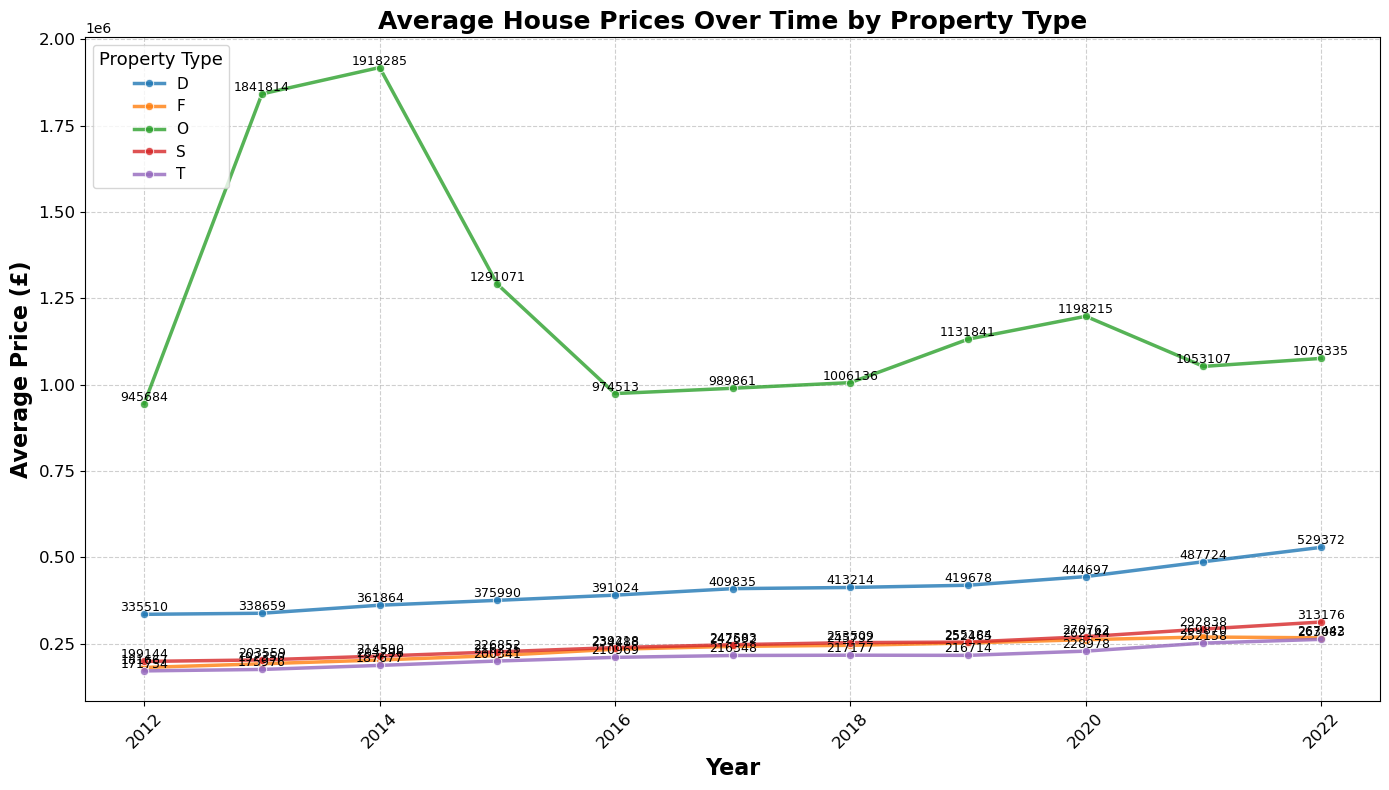

In [49]:
# Group by year and property type
average_price_by_type_year = final_ready_data.groupby(['year', 'property_type'])['price'].mean().reset_index()

#print(average_price_by_type_year)

# Plotting average price over time by property type
plt.figure(figsize=(14, 8))  # Increased height for better readability
sns.lineplot(data=average_price_by_type_year, x='year', y='price', hue='property_type', marker='o', palette='tab10', linewidth=2.5, alpha=0.8)

# Title and labels
plt.title('Average House Prices Over Time by Property Type', fontsize=18, weight='bold')
plt.xlabel('Year', fontsize=16, weight='bold')
plt.ylabel('Average Price (£)', fontsize=16, weight='bold')

# Customize ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Enhance legend
plt.legend(title='Property Type', title_fontsize='13', fontsize='11', loc='upper left')

# Add grid lines for better readability
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Add annotations for important points (if any, e.g., peaks)
for _, row in average_price_by_type_year.iterrows():
    plt.text(row['year'], row['price'], f'{int(row["price"])}', fontsize=9, ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Key Observations:**
- **Detached houses(D)** have the highest average prices and show consistent growth over the years.
- **Flats(F)** and **Semi-Detached(S)** properties also show price increases, though at a slower rate.
- **Others(O)** category exhibits unusual price spikes, particularly in 2013 and 2014, which could indicate certain rare property types (e.g., mansions or commercial properties).
- **Terraced houses(T)** have the lowest price point but still show steady growth over time.

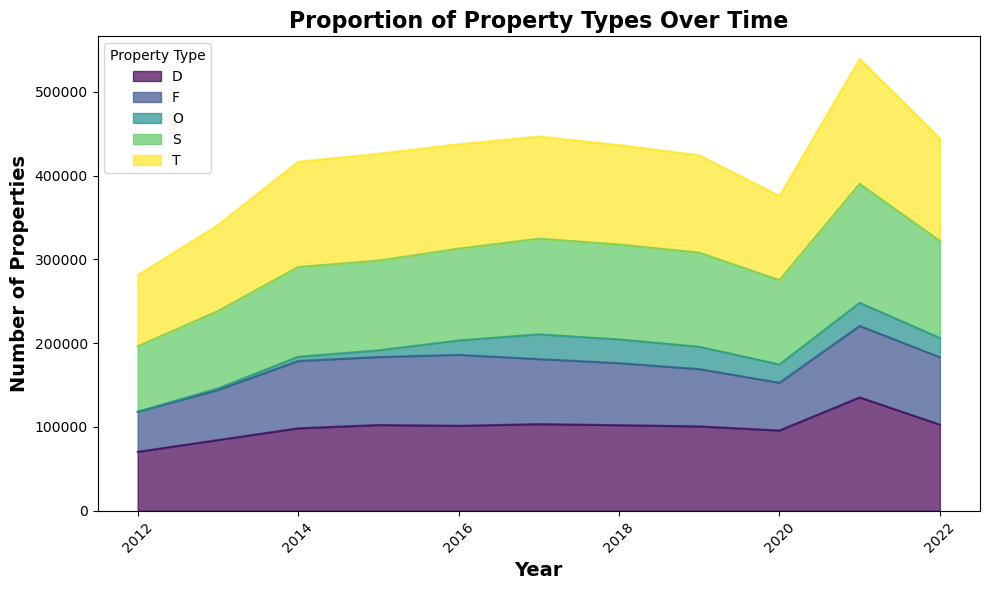

In [51]:
# Group by year and property type
property_types_year = final_ready_data.groupby(['year', 'property_type']).size().unstack(fill_value=0)

# Plotting stacked area chart
property_types_year.plot(kind='area', stacked=True, cmap='viridis', alpha=0.7, figsize=(10, 6))
plt.title('Proportion of Property Types Over Time', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14, weight='bold')
plt.ylabel('Number of Properties', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.legend(title='Property Type')
plt.tight_layout()

plt.show()

The area chart depicting the distribution of property types by year reveals the following trends:

- **Detached Properties (D):** have been relatively stable.

- **Semi-Detached(S)** and **Terraced(T)** properties are gaining popularity.

- **Flats (F):** have seen a slight decline in market share, though still significant in absolute numbers.

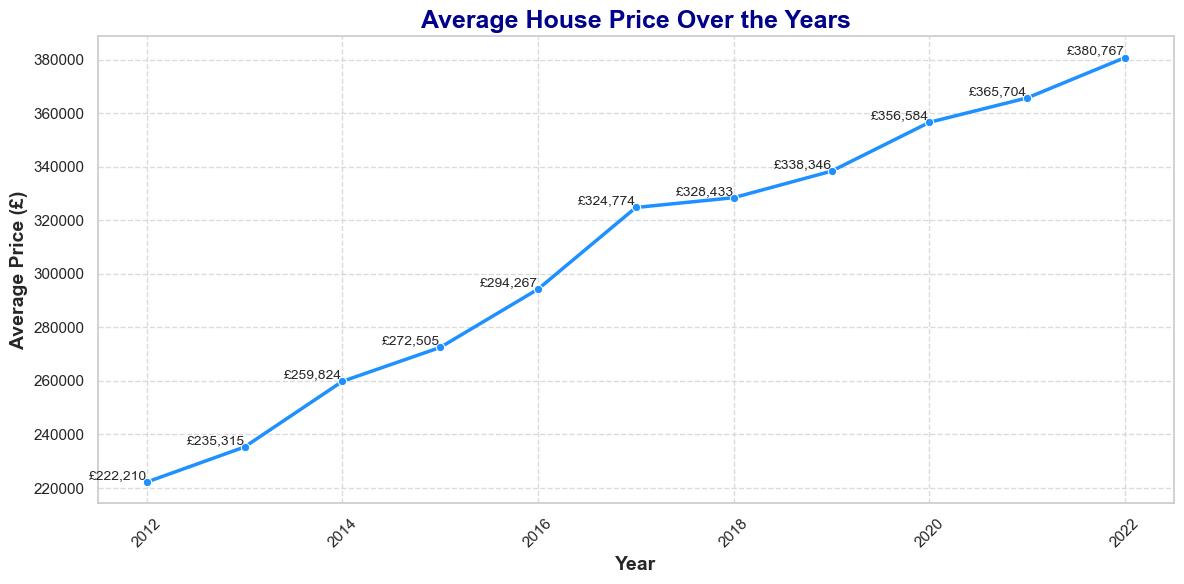

In [53]:
# Group by year and compute average price
price_by_year = final_ready_data.groupby('year')['price'].mean()

# Plot price over time
plt.figure(figsize=(12, 6))  # Adjusted figure size for better visibility
sns.set(style="whitegrid")  # Set background style

# Use a color palette and add markers
sns.lineplot(x=price_by_year.index, y=price_by_year.values, marker='o', color='dodgerblue', linewidth=2.5)

# Title and labels with enhanced aesthetics
plt.title('Average House Price Over the Years', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Year', fontsize=14, weight='bold')
plt.ylabel('Average Price (£)', fontsize=14, weight='bold')

# Add grid for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Annotate specific points on the line
for x, y in zip(price_by_year.index, price_by_year.values):
    plt.text(x, y, f'£{int(y):,}', fontsize=10, ha='right', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit

plt.show()

The line chart illustrating the average house prices by year shows a consistent upward trend from 2012 to 2022. Key insights include:

- **Continuous Increase:** The average price has consistently increase each year, from £222,210 in 2012 to £380,767 in 2022, indicating a strong long-term growth in property values.

- **Growth Rate**: The growth rate has fluctuated over the years, with peaks (such as in 2014 and 2017) and slowdowns (notably in 2018). This indicates that the housing market is influenced by a variety of factors, including economic conditions and government policies.

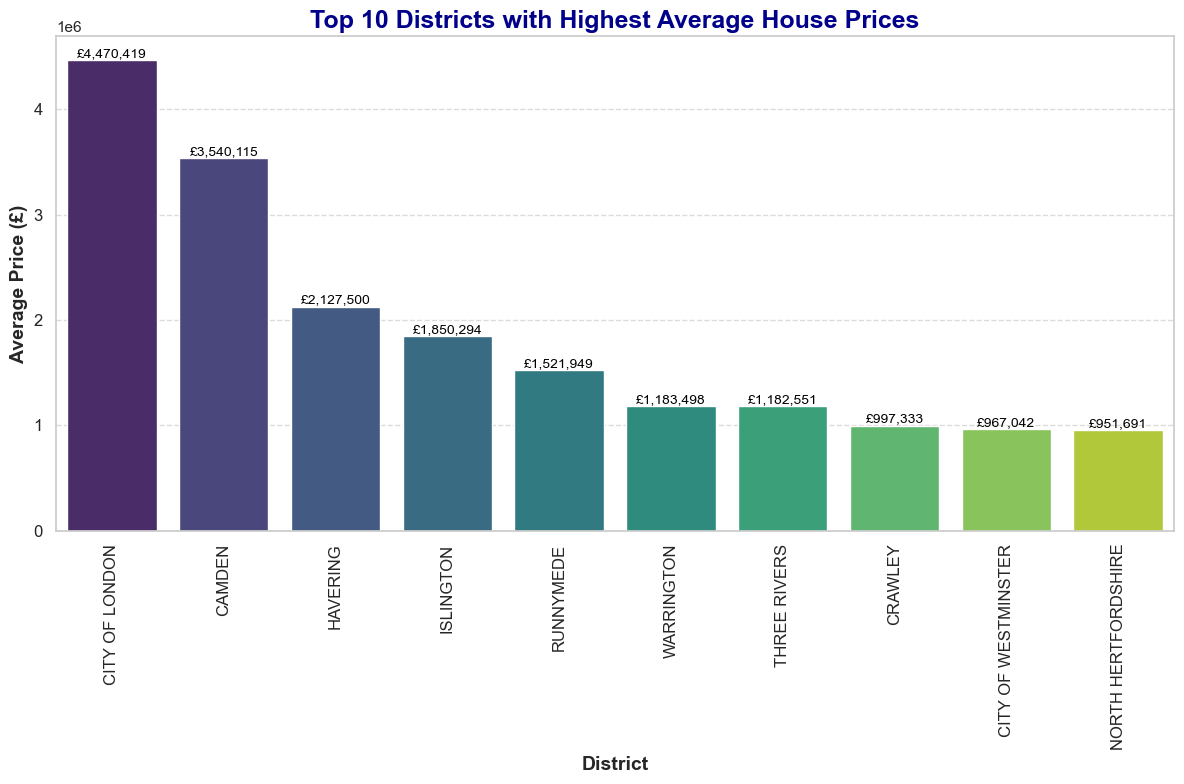

In [55]:
# Group by district and calculate mean price
price_by_district = final_ready_data.groupby('district')['price'].mean().sort_values(ascending=False).head(10)

# Plot the average price by district
plt.figure(figsize=(12, 8))  # Increase figure size for better visibility
sns.set(style="whitegrid")  # Set background style for improved aesthetics

# Create the bar plot with aesthetic enhancements
sns.barplot(x=price_by_district.index, y=price_by_district.values, palette='viridis')  # Use a color palette for better visual appeal

# Title and labels with enhanced aesthetics
plt.title('Top 10 Districts with Highest Average House Prices',
          fontsize=18, weight='bold', color='darkblue')
plt.xlabel('District', fontsize=14, weight='bold')
plt.ylabel('Average Price (£)', fontsize=14, weight='bold')

# Customize the x and y ticks for better readability
plt.xticks(rotation=90, fontsize=12)  # Rotate x labels for better visibility
plt.yticks(fontsize=12)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value annotations on top of the bars
for index, value in enumerate(price_by_district.values):
    plt.text(index, value, f'£{value:,.0f}', ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

**Top 10 Districts by Average House Price:**


- **CITY OF LONDON** leads the list with an average house price of approximately `£4.47 million`. This is by far the highest among the districts, reflecting its status as a prime area with high demand and luxury properties.

- **CAMDEN** follows with an average price of `£3.54 million`, indicating its appeal for affluent buyers and its desirable location in central London.

- **HAVERING** and **ISLINGTON** both show significant average prices of `£2.13 million` and `£1.85 million`, respectively, demonstrating that even outer areas and areas with significant cultural and commercial appeal in London have high property values.

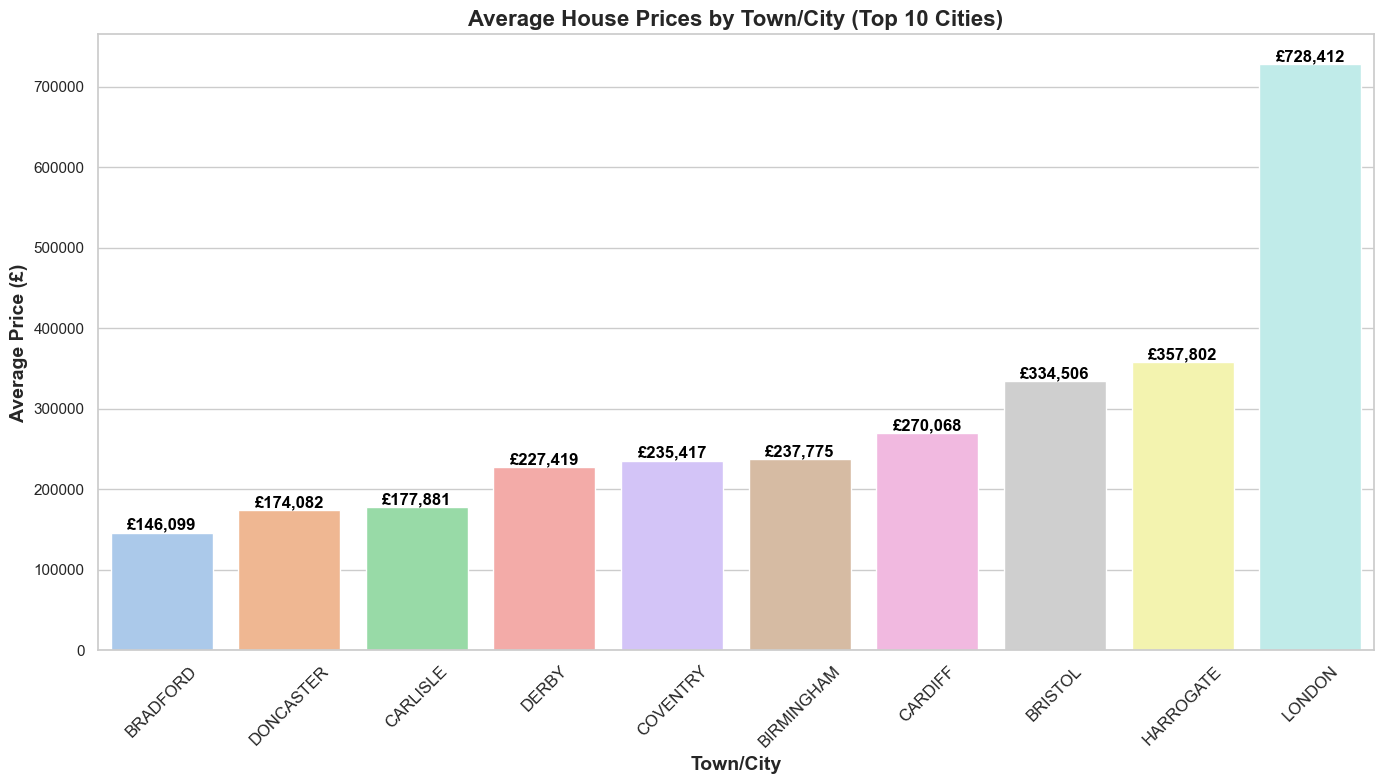

In [57]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Extract the top 10 cities with the highest number of entries
# Reasoning:
# - Focusing on cities with the most data ensures more reliable averages, reducing the impact of outliers or small sample sizes.
# - These cities often represent significant markets, providing insights into trends in key areas.
# - Limiting to the top 10 keeps the visualization clean and interpretable.
top_cities = final_ready_data['town_city'].value_counts().head(10).index

# Calculate average price for the top 10 towns/cities
average_prices = final_ready_data[final_ready_data['town_city'].isin(top_cities)].groupby('town_city')['price'].mean().sort_values()

# Plot average prices using a bar plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x=average_prices.index, y=average_prices.values, palette='pastel')

# Add title and labels
plt.title('Average House Prices by Town/City (Top 10 Cities)', fontsize=16, weight='bold')
plt.xlabel('Town/City', fontsize=14, weight='bold')
plt.ylabel('Average Price (£)', fontsize=14, weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Add values on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'£{p.get_height():,.0f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=12, weight='bold', color='black')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels

plt.show()

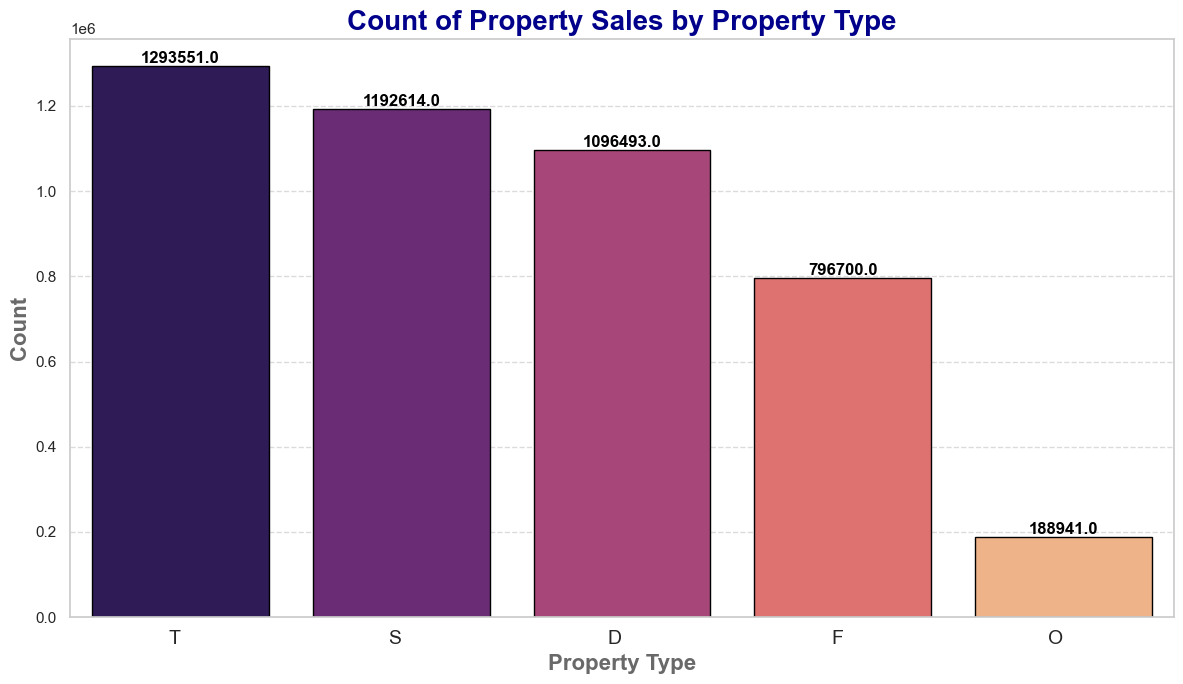

In [58]:
# Count plot of property types
plt.figure(figsize=(12, 7))  # Set a larger figure size for better visibility
sns.set(style="whitegrid")  # Set a clean background style

# Create the count plot with aesthetic enhancements
sns.countplot(data=final_ready_data, x='property_type', palette='magma', edgecolor='black')

# Title and labels with enhanced aesthetics
plt.title('Count of Property Sales by Property Type', fontsize=20, weight='bold', color='darkblue')
plt.xlabel('Property Type', fontsize=16, weight='bold', color='dimgray')
plt.ylabel('Count', fontsize=16, weight='bold', color='dimgray')

# Customize x-ticks for better readability
plt.xticks(fontsize=14, ha='right')

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with counts
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Show the plot with tight layout
plt.tight_layout()
plt.show()

The data suggests that **terraced(T)**, **semi-detached(S)**, and **detached(D)** homes dominate the housing market in the dataset, with **flats** being less common, and **other** types making up a small but distinct segment.

In [60]:
print('The number of rows and columns in the dataset: \n',final_ready_data.shape)
print('\n\n')
final_ready_data.info()

The number of rows and columns in the dataset: 
 (4568299, 30)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4568299 entries, 0 to 4568298
Data columns (total 30 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   transaction_unique_identifier  object        
 1   price                          int64         
 2   date_of_transfer               datetime64[ns]
 3   postcode                       object        
 4   property_type                  object        
 5   old_new                        object        
 6   duration                       object        
 7   PAON                           object        
 8   SAON                           object        
 9   street                         object        
 10  locality                       object        
 11  town_city                      object        
 12  district                       object        
 13  county                         object        
 14  

In [61]:
# no record with bank_rate = 0

final_ready_data[final_ready_data.bank_rate == 0.0]

,transaction_unique_identifier,price,date_of_transfer,postcode,property_type,old_new,duration,PAON,SAON,street,locality,town_city,district,county,pdp_category_type,record_status,LAD Code,ITL Code,latitude,longitude,year,population,GDHI,date,bank_rate,CPIH,unemployment_rate,GDP,month,day


In [62]:
# Step 1: Convert 'date_of_transfer' column to datetime format
final_ready_data['date_of_transfer'] = pd.to_datetime(final_ready_data['date_of_transfer'], format='%Y-%m-%d')

# Step 3: Extract the year from the 'year' column and store it as an integer
final_ready_data['year'] = pd.to_datetime(final_ready_data['year'], format='%Y').dt.year.astype(int)

# Step 4: Display a random sample of 10 rows from the modified DataFrame
print(final_ready_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4568299 entries, 0 to 4568298
Data columns (total 30 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   transaction_unique_identifier  object        
 1   price                          int64         
 2   date_of_transfer               datetime64[ns]
 3   postcode                       object        
 4   property_type                  object        
 5   old_new                        object        
 6   duration                       object        
 7   PAON                           object        
 8   SAON                           object        
 9   street                         object        
 10  locality                       object        
 11  town_city                      object        
 12  district                       object        
 13  county                         object        
 14  pdp_category_type              object        
 15  record_status  

In [63]:
final_ready_data.columns

Index(['transaction_unique_identifier', 'price', 'date_of_transfer',
       'postcode', 'property_type', 'old_new', 'duration', 'PAON', 'SAON',
       'street', 'locality', 'town_city', 'district', 'county',
       'pdp_category_type', 'record_status', 'LAD Code', 'ITL Code',
       'latitude', 'longitude', 'year', 'population', 'GDHI', 'date',
       'bank_rate', 'CPIH', 'unemployment_rate', 'GDP', 'month', 'day'],
      dtype='object')

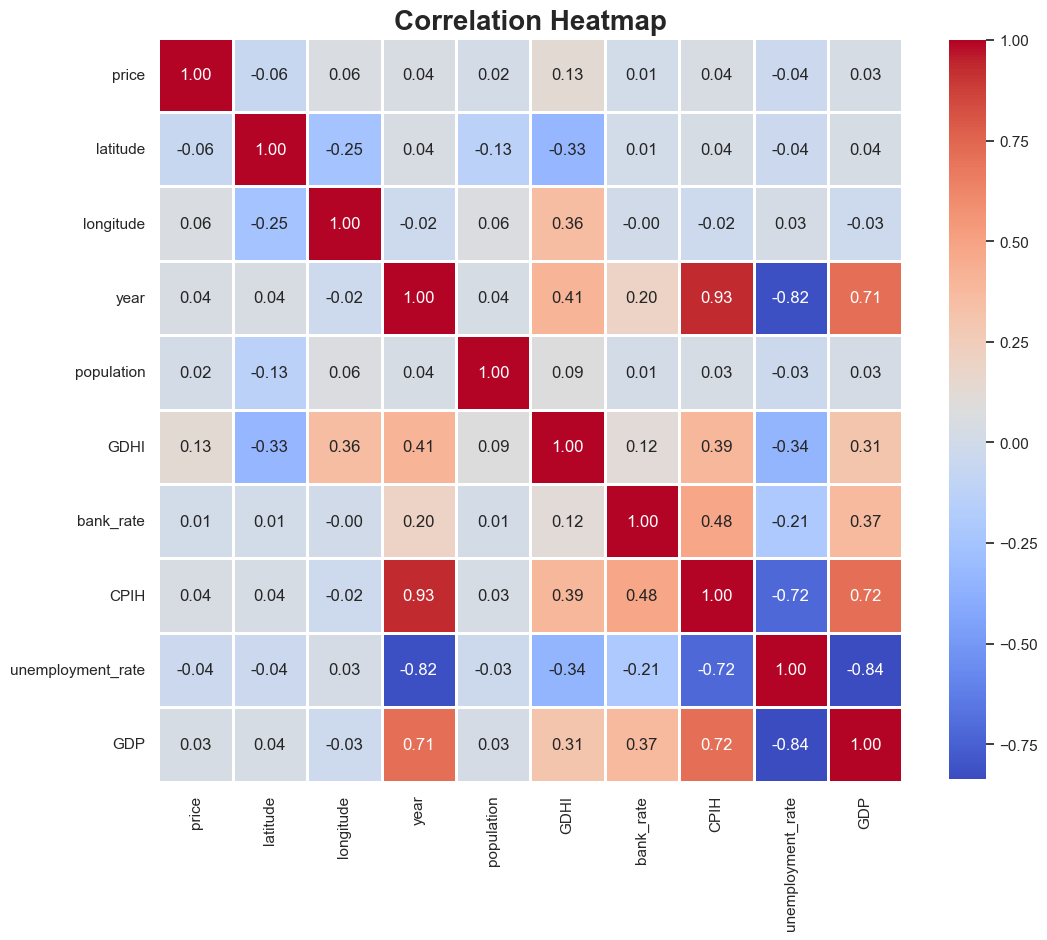

In [64]:
# Set the style of seaborn
plt.figure(figsize=(12, 15))
correlation_matrix = final_ready_data.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .64}, linewidths=0.8)
plt.title('Correlation Heatmap', fontsize=20, weight='bold')

plt.show()

In [65]:
correlation_matrix

,price,latitude,longitude,year,population,GDHI,bank_rate,CPIH,unemployment_rate,GDP
price,1.000000,-0.056453,0.055444,0.041935,0.015964,0.125442,0.006936,0.038726,-0.036457,0.031200
latitude,-0.056453,1.000000,-0.254917,0.041155,-0.131781,-0.332080,0.007923,0.038074,-0.039979,0.035005
longitude,0.055444,-0.254917,1.000000,-0.023721,0.063079,0.360848,-0.004061,-0.020880,0.028727,-0.025221
year,0.041935,0.041155,-0.023721,1.000000,0.035659,0.409919,0.201109,0.929413,-0.818824,0.713505
population,0.015964,-0.131781,0.063079,0.035659,1.000000,0.086654,0.009728,0.033066,-0.030212,0.025566
GDHI,0.125442,-0.332080,0.360848,0.409919,0.086654,1.000000,0.116758,0.390666,-0.342393,0.307767
bank_rate,0.006936,0.007923,-0.004061,0.201109,0.009728,0.116758,1.000000,0.477328,-0.212298,0.373623
CPIH,0.038726,0.038074,-0.020880,0.929413,0.033066,0.390666,0.477328,1.000000,-0.719357,0.717584
unemployment_rate,-0.036457,-0.039979,0.028727,-0.818824,-0.030212,-0.342393,-0.212298,-0.719357,1.000000,-0.837170
GDP,0.031200,0.035005,-0.025221,0.713505,0.025566,0.307767,0.373623,0.717584,-0.837170,1.000000


### **Correlation Analysis**

**Price and Economic Indicators:**

- **GDHI (Gross Disposable Household Income):**
The correlation with price is moderately positive (0.125). While it is not the strongest correlation, it indicates that, as income increases, house prices tend to rise. This relationship, though weak, suggests that economic prosperity can push up housing demand and prices.

- **Bank Rate:**
The correlation is minimal (0.0069), meaning that changes in the bank rate have little to no effect on house prices. This could indicate that other factors, such as local demand or supply constraints, play a bigger role in shaping house prices than monetary policy.

- **CPIH (Consumer Prices Index including Housing):**
There is a weak positive correlation (0.0387) between price and CPIH, which implies that as the cost of living, including housing costs, rises, house prices tend to follow suit. However, this correlation is not strong enough to conclude that CPIH has a major impact on house prices by itself.

**Price and Unemployment Rate:**

- **Unemployment Rate:**
There is a very weak negative correlation (-0.0365) with price. This indicates that, while there might be a slight trend where house prices fall as unemployment rises, the relationship is weak. However, it could still suggest that higher unemployment negatively impacts housing demand, thereby suppressing price increases.

**Price and Year:**

- **Year:**
The correlation with price is very weak (0.0419), suggesting that over time, house prices have experienced modest increases, but this is not a strong driver of price variation. Other factors likely contribute more substantially to price changes over the years.

**Other Notable Correlations:**

- **CPIH and Unemployment Rate:**
There is a significant negative correlation (-0.719) between CPIH and unemployment, suggesting that higher unemployment levels tend to coincide with lower overall consumer prices, including housing. This reflects a classic economic relationship where economic downturns result in reduced demand, leading to lower prices.

- **GDP and Unemployment Rate:**
A very strong negative correlation (-0.837) suggests that as unemployment rises, GDP tends to fall, indicating a clear economic relationship where economic slowdown (higher unemployment) is associated with reduced economic output, further reinforcing the idea that economic stability is important for the housing market.

**Summary:**

1. **GDHI and Housing Prices:** The most notable positive relationship is between **GDHI** and house prices, indicating that higher disposable incomes are linked to higher house prices.

2. **Unemployment_rate and Price:** The weak negative correlation between **unemployment_rate** and house prices suggests that unemployment impacts the housing market, but the relationship is not as significant as other economic factors.

3. **CPIH and Housing Costs:** **CPIH** shows only a weak positive correlation with house prices, indicating that housing costs and overall inflation tend to rise in tandem but don’t drive house price movements substantially on their own.

4. **CPIH and Unemployment:** The strong negative correlation between **CPIH** and **unemployment_rate** reflects a scenario where rising unemployment results in lower living standards, reducing demand for housing and thus lowering prices.

5. **GDP and Unemployment:** The negative correlation between **GDP** and **unemployment_rate** aligns with the conventional economic understanding that high unemployment tends to suppress economic output, further contributing to lower house prices.

This analysis suggests that while **GDHI** and **CPIH** have moderate relationships with house prices, **unemployment_rate** and **GDP** are the more significant negative influences on the housing market.

In [67]:
# Calculate the percentage of missing values for each column.
final_ready_data.isnull().sum()/len(final_ready_data)*100

transaction_unique_identifier     0.000000
price                             0.000000
date_of_transfer                  0.000000
postcode                          0.000000
property_type                     0.000000
old_new                           0.000000
duration                          0.000000
PAON                              0.000022
SAON                             87.014882
street                            2.433116
locality                         63.933490
town_city                         0.000000
district                          0.000000
county                            0.000000
pdp_category_type                 0.000000
record_status                     0.000000
LAD Code                          0.000000
ITL Code                          0.000000
latitude                          0.000000
longitude                         0.000000
year                              0.000000
population                        0.000000
GDHI                              0.000000
date       

# Data Cleaning

In [69]:
# List of columns to check and drop
columns_to_drop = ['transaction_unique_identifier', 'postcode', 'PAON', 'SAON', 'street',
                   'locality', 'district', 'county', 'record_status', 'LAD Code', 'ITL Code', 'date']

# Drop the columns that are present in final_ready_data
final_ready_data = final_ready_data.drop(columns=[col for col in columns_to_drop if col in final_ready_data.columns])

# Display the updated DataFrame info
final_ready_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4568299 entries, 0 to 4568298
Data columns (total 18 columns):
 #   Column             Dtype         
---  ------             -----         
 0   price              int64         
 1   date_of_transfer   datetime64[ns]
 2   property_type      object        
 3   old_new            object        
 4   duration           object        
 5   town_city          object        
 6   pdp_category_type  object        
 7   latitude           float64       
 8   longitude          float64       
 9   year               int64         
 10  population         float64       
 11  GDHI               float64       
 12  bank_rate          float64       
 13  CPIH               float64       
 14  unemployment_rate  float64       
 15  GDP                int64         
 16  month              int32         
 17  day                int32         
dtypes: datetime64[ns](1), float64(7), int32(2), int64(3), object(5)
memory usage: 592.5+ MB


### **Justification for the Columns Removed**

1. **transaction_unique_identifier:**

  - **Missing Values:** `0%`
  
  - **Unique Values:** `3,931,235`

  - **Justification:** This column is a unique identifier for each transaction. While it has no missing values, the large number of unique values makes it impractical for modeling. It does not provide predictive value and only complicates the dataset, so it is safely removed.


2. **`postcode:`**

  - **Missing Values:** `0%`

  - **Unique Values:** `438,270`

  - **Justification:** The `postcode` column, while complete, has an extremely high cardinality (`438,270` unique values). Such a high number of unique values makes it less useful for model training, as the level of detail may lead to overfitting. Additionally, location features such as `town_city`, `latitude`, and `longitude` are more general and sufficient for capturing geographical context.



3. **`PAON (Primary Addressable Object Name):`**

  - **Missing Values:** `0.000022%`

  - **Unique Values:** `160,875`

  - **Justification:** Although `PAON` has very few missing values, it refers to specific house numbers. With 160,875 unique values, this column is highly granular and does not add much to the general price prediction model. It increases complexity and is removed to ensure the model remains focused on broader location-related features.


4. **`SAON (Secondary Addressable Object Name):`**

  - **Missing Values:** `87.01%`

  - **Unique Values:** `18,578`

  - **Justification:** Justification: The extremely high percentage of missing values (87.01%) makes this column largely incomplete and unsuitable for analysis. Even with complete data, it provides very specific information that is not relevant for general price predictions, so it is removed.


5. **`Street:`**

  - **Missing Values:** `2.43%`

  - **Unique Values:** `139,156`

  - **Justification:** Although this column has a relatively low percentage of missing values, the high number of unique values (139,156) suggests that it is too specific and may lead to overfitting. Street-level detail does not significantly improve general price prediction, so this column is excluded to maintain a focus on higher-level location attributes.


6. **`Locality:`**

  - **Missing Values:** `63.93%`

  - **Unique Values:** `7,725`

  - **Justification:** The `locality` column has a very high proportion of missing values (63.93%), making it incomplete and less useful for analysis. Even though it has a moderate number of unique values, other columns like `town_city` capture broader geographical context, making `locality` redundant for modeling.


7. **`district:`**

  - **Missing Values:** `0%`

  - **Unique Values:** `320`

  - **Justification:** While `district` provides location context, it is highly specific and may overlap with other geographical features such as `town_city`, making it redundant. Given that more general location data is already captured by other columns, this column is removed to avoid unnecessary complexity and multicollinearity.


8. **`county:`**

  - **Missing Values:** `0%`

  - **Unique Values:** `103`

  - **Justification:** The `county` column provides geographical information but is largely redundant with other location data. Since features like `town_city` already provide enough context, removing `county` reduces potential multicollinearity and simplifies the analysis.


9. **`record_status:`**

  - **Missing Values:** `0%`

  - **Unique Values:** `1`

  - **Justification:** The `record_status` column has only one unique value, making it constant and not useful for any analysis. It does not provide any variation or predictive value, so it is removed.


10. **`LAD Code (Local Authority District Code):`**

  - **Missing Values:** `0%`

  - **Unique Values:** `199`

  - **Justification:** The `LAD Code` is a geographic code overlaps with data already provided by `town_city`, this column is removed to reduce redundancy and avoid complexity.


11. **`ITL Code:`**

  - **Missing Values:** `0%`

  - **Unique Values:** `104`

  - **Justification:** Similar to the `LAD Code`, geographic code overlaps with data already provided by `town_city`.

12. **`date:`**

  - **Missing Values:** `0%`

  - **Unique Values:** `3,987`

  - **Justification:** Provides no additional value beyond what is captured by `date_of_transer`

#### **Conclusion:**
Conclusion
By removing these columns, the dataset is made more manageable and relevant for predictive modeling. The remaining columns, such as `price`, `town_city`, `year`, `population`, and economic factors like `GDHI`, `CPIH`, and `unemployment_rate`, provide the most significant insights into house price prediction. The updated dataset is now focused on the most meaningful features, improving both the quality of the analysis and the efficiency of subsequent models. This process also reduces potential issues like multicollinearity, overfitting, and unnecessary complexity.

In [71]:
print('Total number of rows: ', final_ready_data.shape[0])

print('Number of duplicates before removal: ', final_ready_data.duplicated().sum())

final_ready_data.drop_duplicates(inplace=True)

print('Number of duplicates after removal: ', final_ready_data.duplicated().sum())

Total number of rows:  4568299
Number of duplicates before removal:  616650
Number of duplicates after removal:  0


In [72]:
copy_of_final_ready_data = final_ready_data.copy()

copy_of_final_ready_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3951649 entries, 0 to 4568298
Data columns (total 18 columns):
 #   Column             Dtype         
---  ------             -----         
 0   price              int64         
 1   date_of_transfer   datetime64[ns]
 2   property_type      object        
 3   old_new            object        
 4   duration           object        
 5   town_city          object        
 6   pdp_category_type  object        
 7   latitude           float64       
 8   longitude          float64       
 9   year               int64         
 10  population         float64       
 11  GDHI               float64       
 12  bank_rate          float64       
 13  CPIH               float64       
 14  unemployment_rate  float64       
 15  GDP                int64         
 16  month              int32         
 17  day                int32         
dtypes: datetime64[ns](1), float64(7), int32(2), int64(3), object(5)
memory usage: 542.7+ MB


In [73]:
# print numeric & categorical columns
num_cols = copy_of_final_ready_data.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)

print()
print('*'*80)
print()

cat_cols = copy_of_final_ready_data.select_dtypes(include=['object']).columns
cat_cols

Index(['price', 'latitude', 'longitude', 'year', 'population', 'GDHI',
       'bank_rate', 'CPIH', 'unemployment_rate', 'GDP'],
      dtype='object')

********************************************************************************



Index(['property_type', 'old_new', 'duration', 'town_city',
       'pdp_category_type'],
      dtype='object')

In [74]:
# Categorize columns based on the number of unique values (<10 or >=10)

# Initialize empty lists to store names of columns with fewer than and more than 10 unique values
fewer_than_10 = []
more_than_10  = []

# Step 1: Iterate over each categorical column
for column in copy_of_final_ready_data[cat_cols].columns:
    # Step 2: Count the number of unique values in the current column
    unique_values_count = copy_of_final_ready_data[cat_cols][column].nunique()

    # Step 4: Check if the column has fewer than 10 or more than 10 unique values
    if unique_values_count < 10:
        fewer_than_10.append(column)  # Step 5a: Append column name to fewer_than_10 list
    else:
        more_than_10.append(column)  # Step 5b: Append column name to more_than_10 list


# Step 6: Print columns with fewer than 10 unique values along with their value counts
print('<>' * 22)
print("Columns with fewer than 10 unique values:")
print('<>' * 22)
print()

for column in fewer_than_10:
    print()
    print(f"Column: {column}")
    print(copy_of_final_ready_data[cat_cols][column].value_counts())  # Display counts of unique values
    print()  # Empty line for additional spacing
    print()  # Empty line for additional spacing
    print(f'The number of Unique values in the column "{column}" are: ', {copy_of_final_ready_data[cat_cols][column].nunique()})
    print()  # Empty line for additional spacing
    print()  # Empty line for additional spacing
    print('*' * 30)


# Step 7: Print columns with more than 10 unique values along with their value counts
print('<>' * 22)
print("Columns with more than 10 unique values:")
print('<>' * 22)
print()

for column in more_than_10:
    print()
    print(f"Column: {column}")
    print(copy_of_final_ready_data[cat_cols][column].value_counts())  # Display counts of unique values
    print()  # Empty line for additional spacing
    print()  # Empty line for additional spacing
    print(f'The number of Unique values in the column "{column}" are: ', {copy_of_final_ready_data[cat_cols][column].nunique()})
    print()  # Empty line for additional spacing
    print()  # Empty line for additional spacing
    print('*' * 30)

<><><><><><><><><><><><><><><><><><><><><><>
Columns with fewer than 10 unique values:
<><><><><><><><><><><><><><><><><><><><><><>


Column: property_type
property_type
T    1124336
S    1030436
D     926473
F     717608
O     152796
Name: count, dtype: int64


The number of Unique values in the column "property_type" are:  {5}


******************************

Column: old_new
old_new
N    3547524
Y     404125
Name: count, dtype: int64


The number of Unique values in the column "old_new" are:  {2}


******************************

Column: duration
duration
F    3039950
L     911699
Name: count, dtype: int64


The number of Unique values in the column "duration" are:  {2}


******************************

Column: pdp_category_type
pdp_category_type
A    3528785
B     422864
Name: count, dtype: int64


The number of Unique values in the column "pdp_category_type" are:  {2}


******************************
<><><><><><><><><><><><><><><><><><><><><><>
Columns with more than 10 unique val

In [75]:
# Map string values in specified DataFrame columns to unique integers, store mappings for reference, 
# and return the updated DataFrame along with the mappings.

def map_string_to_int(df, columns):
    # Dictionary to store the mapping for each column
    mappings = {}

    # Iterate through each specified column in the list
    for col in columns:
        # Get the unique values in the current column
        unique_values = df[col].unique()

        # Create a mapping dictionary that assigns each unique value to a unique integer
        mapping_dict = {val: idx for idx, val in enumerate(unique_values)}

        # Store the mapping dictionary in the mappings dictionary for later reference
        mappings[col] = mapping_dict

        # Map the string values in the DataFrame to integers using the created mapping dictionary
        # Use .loc to avoid SettingWithCopyWarning
        df.loc[:, col] = df[col].map(mapping_dict)
        df[col] = df[col].astype('int64')  # Convert the column to integer type

    # Return the modified DataFrame and the mapping dictionaries for each column
    return df, mappings  # The modified DataFrame and the mappings used

# Example usage
# Apply the mapping function to the categorical columns that have fewer than 10 unique values
copy_of_final_ready_data[copy_of_final_ready_data[cat_cols].columns], categorical_mappings = map_string_to_int(copy_of_final_ready_data[cat_cols], copy_of_final_ready_data[cat_cols].columns)

# Display the first few rows of the modified categorical columns
copy_of_final_ready_data[copy_of_final_ready_data[cat_cols].columns].head()

,property_type,old_new,duration,town_city,pdp_category_type
0,0,0,0,0,0
1,1,0,0,1,0
2,0,0,0,2,0
3,1,0,0,3,0
4,0,0,0,4,0


In [76]:
copy_of_final_ready_data[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3951649 entries, 0 to 4568298
Data columns (total 5 columns):
 #   Column             Dtype
---  ------             -----
 0   property_type      int64
 1   old_new            int64
 2   duration           int64
 3   town_city          int64
 4   pdp_category_type  int64
dtypes: int64(5)
memory usage: 180.9 MB


In [77]:
# Define the path to save the dictionary
file_path = './datasets/categorical_mappings.pkl'

# Save the dictionary as a pickle file
with open(file_path, 'wb') as file:
    pickle.dump(categorical_mappings, file)

print(f"Dictionary saved to {file_path}")

Dictionary saved to ./datasets/categorical_mappings.pkl


In [78]:
file_path = './datasets/categorical_mappings.pkl'

# Load the dictionary back from pkl file
with open(file_path, 'rb') as file:
    categorical_mappings = pickle.load(file)

In [79]:
# Display the mappings used for each column

filtered_mappings = {k: v for k, v in categorical_mappings.items() if k != 'town_city'}

# Print each key-value pair
for key, value in filtered_mappings.items():
    print(f"{key}: {value}")

property_type: {'T': 0, 'S': 1, 'D': 2, 'F': 3, 'O': 4}
old_new: {'N': 0, 'Y': 1}
duration: {'F': 0, 'L': 1}
pdp_category_type: {'A': 0, 'B': 1}


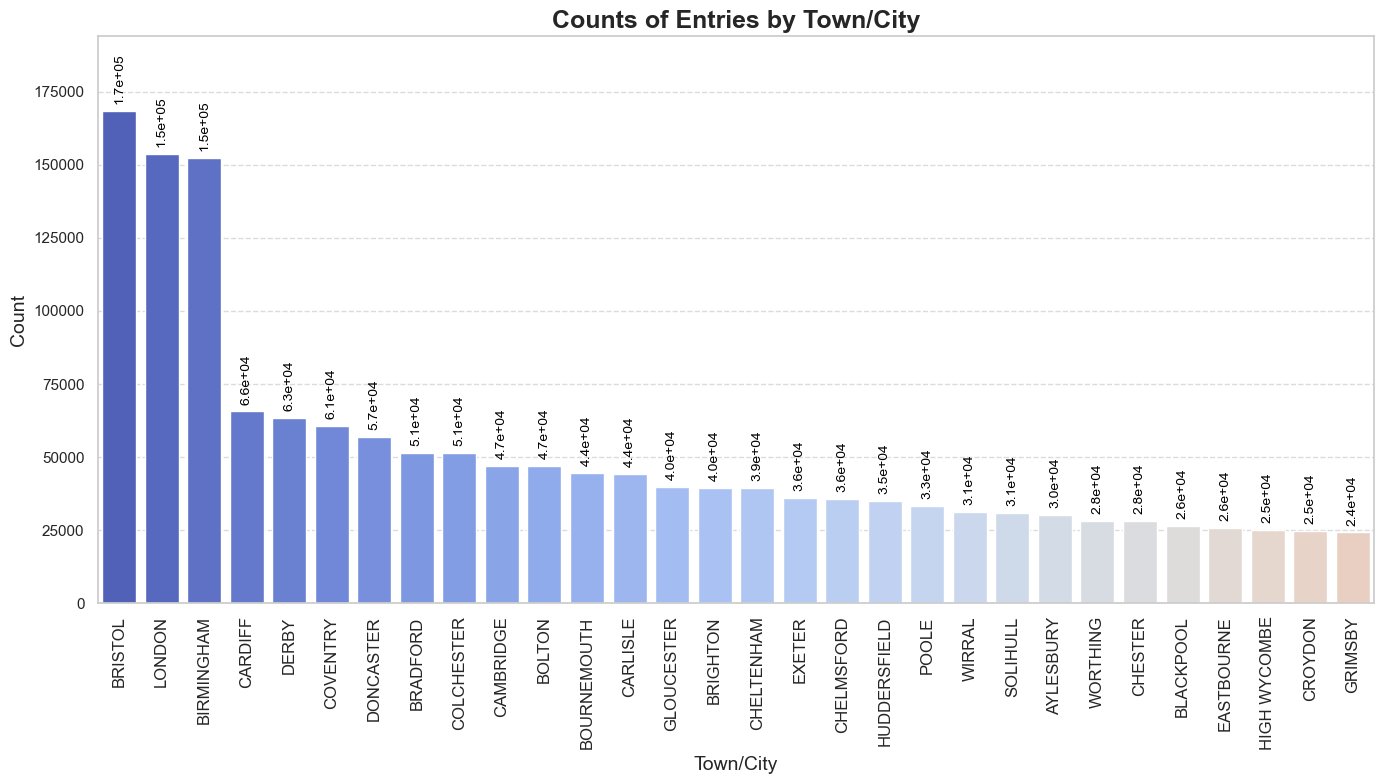

In [80]:
# Set the aesthetics for the plot
sns.set(style="whitegrid")

# Plot the value counts for town_city
plt.figure(figsize=(14, 8))
town_city_counts = final_ready_data['town_city'].value_counts()

# Create a bar plot with a different palette
ax = sns.barplot(x=town_city_counts.index[:50], y=town_city_counts.values[:50], palette='coolwarm')

# Add titles and labels
plt.title('Counts of Entries by Town/City', fontsize=18, weight='bold')
plt.xlabel('Town/City', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=12)

# Add grid lines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set x-axis limit to avoid cutting off labels
plt.xlim(-0.5, 29.5)
plt.ylim(0, 194000)

# Add value labels on top of each bar in scientific notation
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1e}',  # Format in scientific notation
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points', rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

In [81]:
num_cols = ['price', 'population', 'GDHI', 'bank_rate', 'CPIH', 'unemployment_rate', 'GDP']
copy_of_final_ready_data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
price,3951649.0,313961.301277,1.193002e+06,1.0,146500.00,230000.0,350000.0,421364142.0
population,3951649.0,524695.943687,2.312879e+05,105557.0,338159.00,506447.0,624076.0,1205137.0
GDHI,3951649.0,19794.600418,3.992431e+03,11449.0,16848.00,19472.0,22160.0,62428.0
bank_rate,3951649.0,0.532932,4.789746e-01,0.1,0.25,0.5,0.5,3.5
CPIH,3951649.0,105.435168,6.877083e+00,94.7,100.00,104.5,109.1,125.3
unemployment_rate,3951649.0,5.115310,1.260770e+00,3.6,4.10,4.8,5.6,8.3
GDP,3951649.0,587131.840259,3.132593e+04,481769.0,564411.00,589476.0,610481.0,634044.0


## **Summary Statistics**

| Column               | count    | mean       | std        | min       | 25%        | 50%        | 75%        | max         |
|----------------------|----------|------------|------------|-----------|------------|------------|------------|-------------|
| price                | 3951649  | 313961.30  | 1193002.00 | 1.00      | 146500.00  | 230000.00  | 350000.00  | 421364142.00|
| population           | 3951649  | 524695.94  | 231287.90  | 105557.00 | 338159.00  | 506447.00  | 624076.00  | 1205137.00  |
| GDHI                 | 3951649  | 19794.60   | 3992.43    | 11449.00  | 16848.00   | 19472.00   | 22160.00   | 62428.00    |
| bank_rate            | 3951649  | 0.53       | 0.48       | 0.10      | 0.25       | 0.50       | 0.50       | 3.50        |
| CPIH                 | 3951649  | 105.44     | 6.88       | 94.70     | 100.00     | 104.50     | 109.10     | 125.30      |
| unemployment_rate    | 3951649  | 5.12       | 1.26       | 3.60      | 4.10       | 4.80       | 5.60       | 8.30        |
| GDP                  | 3951649  | 587131.84  | 31325.93   | 481769.00 | 564411.00  | 589476.00  | 610481.00  | 634044.00   |


**Price**

The **maximum price** of `421,364,142` is significantly higher than the `75th percentile` value of `350,000`. Price clearly has outliers that could skew analyses. Removing outliers is justified.

**Population**

Standard deviation is not excessively high compared to the mean. **Max value(1205137)** is not drastically higher than the **75th percentile (624076)**, as such Population data appears to represent natural variation. Outlier removal is not required.

**GDHI**

The **maximum GDHI** value of `62,428` is much higher than the `75th percentile` value of `22,160`.This outlier should be removed.

**Bank Rate**

The **bank_rate** ranges from `0.10` to `3.50`, with a mean of `0.53`. Standard deviation is close to the mean, Max value is significantly higher than the 75th percentile. But given the nature of interest rates, which has varied significantly over time these are valid.

**CPIH**

The **CPIH** ranges from `94.70` to `125.30`, with the `75th percentile` at `109.10` and `25th percentile` at `100.00`.Max and min values are not far from the 25th and 75th percentiles, CPIH data appears well-distributed. Outlier removal is not required.

**Unemployment Rate**

The **unemployment_rate** ranges from `3.60` to `8.30`. Low standard deviation compared to the mean.Max and min values are not far from the 25th and 75th percentiles as such unemployment rate data appears well-distributed. Outlier removal is not required.

**GDP**

The **maximum value (634,044)** is slightly higher than the `75th percentile` at `610,481`, but not drastically. **Min values(481769)** is not far from the 25th percentile at `564411`. While GDP can vary, this range does not suggest a major outlier, and outlier removal may not be necessary


**Conclusion:**

The analysis highlights that **price** and **GDHI** columns may contain outliers that need to removed.

In [83]:
# Function to remove outliers from specified numerical columns using the IQR (Interquartile Range) method.
def remove_outliers(df, numerical_cols):
    # Create a copy of the DataFrame to avoid modifying the original
    df_cleaned = df.copy()

    # Ensure the specified columns exist in the DataFrame
    for col in numerical_cols:
        if col not in df_cleaned.columns:
            raise ValueError(f"Column '{col}' not found in DataFrame.")
        
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1

        # Determine bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove rows where the numeric columns' values are outside the bounds
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned

# List of columns where outliers need to be removed
outlier_cols = ['price', 'GDHI']

# Check the original shape of the DataFrame before cleaning
print("Original DataFrame shape:", copy_of_final_ready_data.shape)

# Remove outliers
copy_of_final_ready_data = remove_outliers(copy_of_final_ready_data, outlier_cols)

# Show the shape of the cleaned DataFrame
print("Cleaned DataFrame shape:", copy_of_final_ready_data.shape)

Original DataFrame shape: (3951649, 18)
Cleaned DataFrame shape: (3684258, 18)


In [84]:
copy_of_final_ready_data[outlier_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
price,3684258.0,243681.784593,134673.904977,1.0,140000.0,217995.0,320796.25,655250.0
GDHI,3684258.0,19406.065467,3522.004270,11449.0,16736.0,19176.0,21772.00,29597.0


In [85]:
copy_of_final_ready_data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
price,3684258.0,243681.784593,134673.904977,1.0,140000.00,217995.0,320796.25,655250.0
population,3684258.0,520247.766633,229366.136569,105557.0,336977.00,503653.0,617671.00,1205137.0
GDHI,3684258.0,19406.065467,3522.004270,11449.0,16736.00,19176.0,21772.00,29597.0
bank_rate,3684258.0,0.526749,0.463231,0.1,0.25,0.5,0.50,3.5
CPIH,3684258.0,105.190027,6.773574,94.7,99.90,104.3,108.80,125.3
unemployment_rate,3684258.0,5.148832,1.273866,3.6,4.10,4.8,5.60,8.3
GDP,3684258.0,586324.258354,31271.961480,481769.0,564411.00,589476.0,610481.00,634044.0


### **Statistical Summary**

**After Removing Outliers:**

| Column              | Max       | New Mean     | Implication |
|---------------------|-----------|--------------|-------------|
| **Price**           | 655,250   | 243681.784593   | Removal of extreme values has brought the price range closer to the 75th percentile, resulting in a more realistic and stable dataset for price analysis. |
| **GDHI**            | 29597   | 19406.065467    | Outliers have been removed, leading to a more realistic and meaningful range of GDHI values, useful for income-based insights. |

After removing outliers, the dataset reflects a more balanced and accurate view of each variable. The reduced skewness and extreme values enable clearer, more realistic analysis and modeling, which improves the robustness of any predictive analytics or insights derived from this data.

### **Statistical Summary including all numerical Columns**

#### **Before Removing Outliers:**

| Column             | count  | mean      | std        | min     | 25%        | 50%        | 75%        | max        |
|--------------------|--------|-----------|------------|---------|------------|------------|------------|------------|
| price              | 3951649| 313961.30 | 1193002.00 | 1.00    | 146500.00  | 230000.00  | 350000.00  | 421364142.00|
| population         | 3951649| 524695.94 | 231287.90  | 105557.00| 338159.00  | 506447.00  | 624076.00  | 1205137.00 |
| GDHI               | 3951649| 19794.60  | 3992.43    | 11449.00| 16848.00   | 19472.00   | 22160.00   | 62428.00   |
| bank_rate          | 3951649| 0.53      | 0.48       | 0.10    | 0.25       | 0.50       | 0.50       | 3.50       |
| CPIH               | 3951649| 105.44    | 6.88       | 94.70   | 100.00     | 104.50     | 109.10     | 125.30     |
| unemployment_rate  | 3951649| 5.12      | 1.26       | 3.60    | 4.10       | 4.80       | 5.60       | 8.30       |
| GDP                | 3951649| 587131.84 | 31325.93   | 481769.00| 564411.00  | 589476.00  | 610481.00  | 634044.00  |

---

#### **After Removing Outliers:**

| Column             | count   | mean        | std        | min      | 25%        | 50%        | 75%        | max        |
|--------------------|---------|-------------|------------|----------|------------|------------|------------|------------|
| price              | 3684258 | 243681.78   | 134673.90  | 1.0      | 140000.00  | 217995.00  | 320796.25  | 655250.00  |
| population         | 3684258 | 520247.77   | 229366.14  | 105557.0 | 336977.00  | 503653.00  | 617671.00  | 1205137.00 |
| GDHI               | 3684258 | 19406.07    | 3522.00    | 11449.0  | 16736.00   | 19176.00   | 21772.00   | 29597.00   |
| bank_rate          | 3684258 | 0.53        | 0.46       | 0.1      | 0.25       | 0.50       | 0.50       | 3.50       |
| CPIH               | 3684258 | 105.19      | 6.77       | 94.7     | 99.90      | 104.30     | 108.80     | 125.30     |
| unemployment_rate  | 3684258 | 5.15        | 1.27       | 3.6      | 4.10       | 4.80       | 5.60       | 8.30       |
| GDP                | 3684258 | 586324.26   | 31271.96   | 481769.0 | 564411.00  | 589476.00  | 610481.00  | 634044.00  |


In [88]:
# Remove date_of_transfer column
copy_of_final_ready_data.reset_index(drop=True, inplace=True)
copy_of_final_ready_data.drop(['date_of_transfer'], axis=1, inplace=True)

In [89]:
copy_of_final_ready_data.sample(10)

,price,property_type,old_new,duration,town_city,pdp_category_type,latitude,longitude,year,population,GDHI,bank_rate,CPIH,unemployment_rate,GDP,month,day
3271010,278000,1,0,0,14,0,51.785247,1.137746,2021,497276.0,20908.0,0.10,111.4,4.7,605353,6,28
1766484,295000,0,0,0,221,0,50.889084,-0.328974,2017,402624.0,23143.0,0.25,104.4,4.3,606396,10,18
3078933,424000,0,0,0,27,0,51.436568,-2.563662,2021,471285.0,21089.0,0.10,109.3,5.2,564411,1,29
858875,111000,1,0,0,101,0,53.164645,-3.084700,2014,289422.0,15846.0,0.50,99.6,6.0,563694,7,3
2754263,230000,1,0,0,27,0,51.439218,-2.543336,2020,471851.0,20176.0,0.10,108.6,4.2,481769,5,22
1103742,78000,0,0,0,74,0,53.468855,-1.072710,2015,804616.0,15197.0,0.50,99.9,5.7,572673,4,14
794952,310000,2,0,0,74,0,53.512083,-1.177251,2014,801485.0,14670.0,0.50,100.1,5.9,567619,10,31
413453,25000,0,0,1,43,0,53.784050,-2.238875,2013,327336.0,13762.0,0.50,98.8,7.2,549709,10,9
3383213,85000,3,0,1,125,0,53.549700,-0.043706,2022,327830.0,18168.0,0.50,115.4,3.9,629149,2,18
31736,62500,0,0,0,228,0,54.645461,-3.552191,2012,264016.0,17251.0,0.50,95.6,8.0,531663,6,27


In [90]:
# Core libraries
import os
import time
import json
import pickle
import joblib
import warnings
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Scikit-learn models and preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# Scikit-learn model selection and metrics
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Additional libraries for specific regressors
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Other libraries
from scipy.stats import gaussian_kde
from math             import sqrt
from collections      import Counter
from scipy.stats      import gaussian_kde

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [91]:
copy_of_final_ready_data.to_csv('./datasets/copy_of_final_ready_data.csv', header=True, index=False)
copy_of_final_ready_data = pd.read_csv('./datasets/copy_of_final_ready_data.csv')

copy_of_final_ready_data.to_pickle('./datasets/copy_of_final_ready_data_pkl.pkl')
copy_of_final_ready_data = pd.read_pickle('./datasets/copy_of_final_ready_data_pkl.pkl')

copy_of_final_ready_data.head()

,price,property_type,old_new,duration,town_city,pdp_category_type,latitude,longitude,year,population,GDHI,bank_rate,CPIH,unemployment_rate,GDP,month,day
0,242300,0,0,0,0,0,51.638436,-0.007006,2012,549012.0,17629.0,0.5,96.4,7.9,536720,9,28
1,189500,1,0,0,1,0,53.187813,-2.849749,2012,331231.0,17550.0,0.5,95.7,7.9,536720,7,20
2,125000,0,0,0,2,0,50.794711,0.045205,2012,530358.0,18150.0,0.5,95.4,8.2,532300,3,9
3,145000,1,0,0,3,0,52.088841,0.423241,2012,732697.0,16200.0,0.5,95.9,8.1,531663,4,20
4,230000,0,0,0,4,0,51.359556,-0.702501,2012,758887.0,24222.0,0.5,94.7,8.3,532300,1,12


In [92]:
copy_of_final_ready_data.shape

(3684258, 17)

In [93]:
# Filter the dataset to exclude the bottom 0.51% of house prices (extremely low outliers with min as £1)
copy_of_final_ready_data = copy_of_final_ready_data[copy_of_final_ready_data['price'] > copy_of_final_ready_data['price'].quantile(0.0051)]
copy_of_final_ready_data.reset_index(drop=True, inplace=True)

copy_of_final_ready_data.shape

(3664541, 17)

In [94]:
copy_of_final_ready_data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
price,3664541.0,244930.703849,133950.752670,25001.0,142500.00,219950.0,322500.0,655250.0
population,3664541.0,520331.447013,229407.919936,105557.0,336977.00,503653.0,617671.0,1205137.0
GDHI,3664541.0,19407.270821,3520.151000,11449.0,16736.00,19176.0,21772.0,29597.0
bank_rate,3664541.0,0.526875,0.463330,0.1,0.25,0.5,0.5,3.5
CPIH,3664541.0,105.182650,6.777690,94.7,99.90,104.3,108.8,125.3
unemployment_rate,3664541.0,5.151396,1.275017,3.6,4.10,4.8,5.6,8.3
GDP,3664541.0,586279.409250,31274.493081,481769.0,564411.00,585856.0,610481.0,634044.0


### Justification for Filtering the `price` Column at the 0.51st Percentile (New Threshold: £25,000)

The decision to filter out entries below the `0.51st percentile` for `price` - i.e., transactions under `£25,000`—is a critical preprocessing step to enhance the dataset’s accuracy and analytical value. Here’s why filtering these values is justified:

#### 1. **Exclusion of Unrealistic Low Prices:**
   - The dataset currently includes `15,514 entries` with prices below `£25,000`, with a minimum recorded price of just `£1`. Such low values are highly likely to represent non-standard transactions or possible data errors.
   - Including these extremely low values would misrepresent the true scope of UK housing prices, as they are not reflective of typical market conditions.

#### 2. **Improve Model Performance:**
   - Extremely low-priced entries introduce noise and increase the risk of overfitting in predictive models. These low values create a skewed price distribution, leading to reduced model generalization and predictive accuracy.
   - By removing transactions under `£25,000`, we provide models with a more stable, representative dataset, ultimately improving the reliability and consistency of predictions.

#### 3. **Stabilization of Summary Statistics:**
   - Low outliers, especially those as extreme as `£1`, heavily impact summary statistics such as the mean and variance, potentially misleading interpretations of central tendency and spread in the data.
   - Filtering out these values results in more reliable statistical measures and provides clearer, unbiased insights.

# Data Analysis & Visualisation after Data Cleaning

In [97]:
# in this cell we are doing reverse mapping of the categorical columns just for the visualization purpose.
file_path = './datasets/categorical_mappings.pkl'

# Load the dictionary
with open(file_path, 'rb') as file:
    categorical_mappings = pickle.load(file)

clean_df = copy_of_final_ready_data.copy()

reverse_mappings = {key: {v: k for k, v in value.items()} for key, value in categorical_mappings.items()}

for column, mapping in reverse_mappings.items():
    if column in clean_df.columns:
        clean_df[column] = clean_df[column].replace(mapping)

clean_df.shape

(3664541, 17)

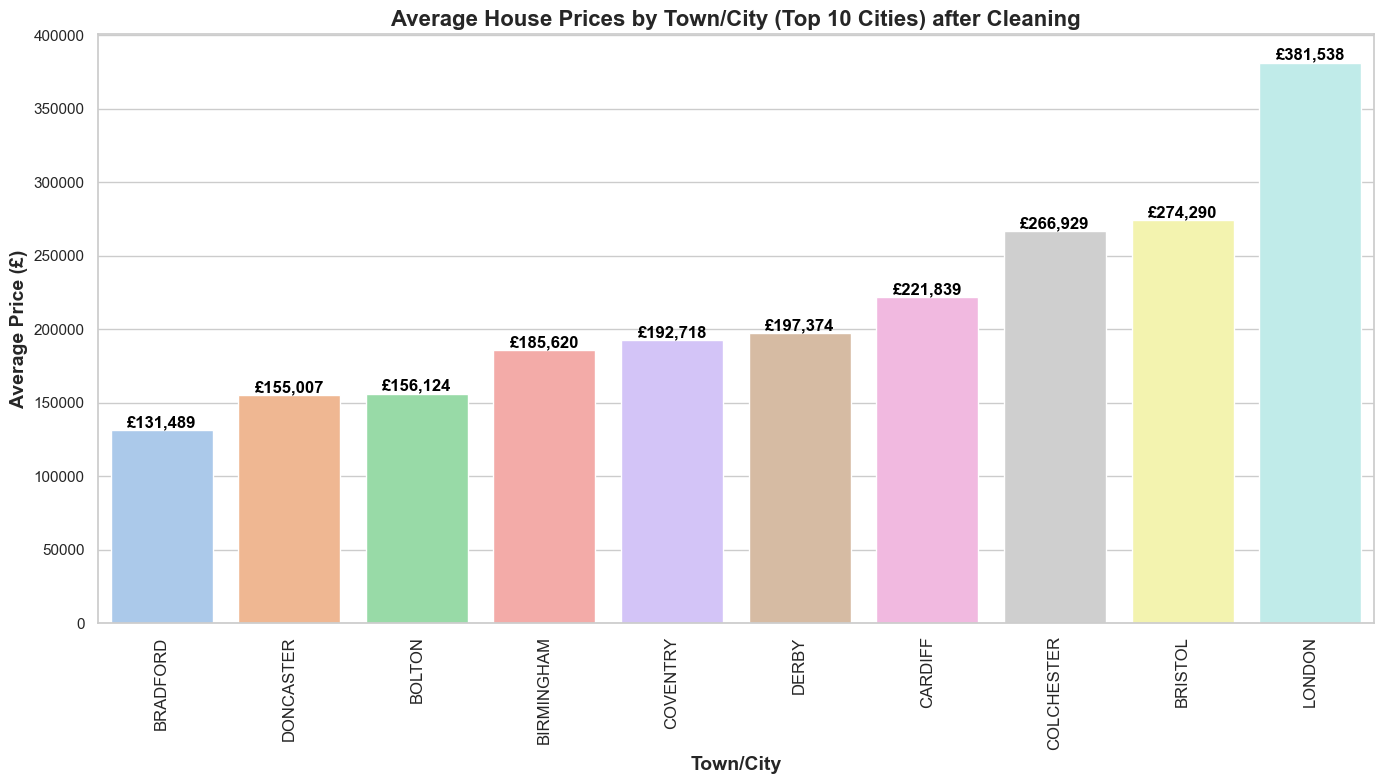

In [98]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Extract the top 10 cities with the highest number of entries
# Reasoning:
# - Focusing on cities with the most data ensures more reliable averages, reducing the impact of outliers or small sample sizes.
# - These cities often represent significant markets, providing insights into trends in key areas.
# - Limiting to the top 10 keeps the visualization clean and interpretable.
top_cities_clean = clean_df['town_city'].value_counts().nlargest(10).index

# Calculate average price for the top 10 towns/cities
average_prices = clean_df[clean_df['town_city'].isin(top_cities_clean)].groupby('town_city')['price'].mean().sort_values()

# Plot average prices using a bar plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x=average_prices.index, y=average_prices.values, palette='pastel')

# Add title and labels
plt.title('Average House Prices by Town/City (Top 10 Cities) after Cleaning', fontsize=16, weight='bold')
plt.xlabel('Town/City', fontsize=14, weight='bold')
plt.ylabel('Average Price (£)', fontsize=14, weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=12)

# Add values on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'£{p.get_height():,.0f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=12, weight='bold', color='black')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels

plt.show()

### Analysis of Average House Prices in Top 10 Cities (Before and After Cleaning)

This analysis compares the average property prices for the top 10 cities based on the number of entries before and after cleaning the dataset to remove outliers.

**The top 10 cities are extracted first in this script to focus the analysis on a manageable subset of data and highlight key insights**. Here's why this approach is beneficial:
- Focusing on cities with the most data ensures more reliable averages, reducing the impact of outliers or small sample sizes.
- These cities often represent significant markets, providing insights into trends in key areas.
- Limiting to the top 10 keeps the visualization clean and interpretable.

### Key Observations

- **London**:

  - **Before Cleaning**: £728,412, significantly higher due to outliers, reflecting its reputation as a prime location with high demand and property prices.

  - **After Cleaning**: £381,538, indicating a more realistic average in the absence of extreme values.

- **Second-Tier Cities**:

  - **Before Cleaning**:
    - **Harrogate** and **Bristol** were priced at £357,802 and £334,506, respectively, as premium yet affordable alternatives to London.

  - **After Cleaning**:
    - Bristol’s adjusted average (£274,290) remains the second-highest, while Harrogate was removed from the top 10, likely due to fewer entries after outlier removal.

- **Mid-Range Markets**:

  - **Before Cleaning**:
    - **Cardiff**, **Birmingham**, **Coventry**, and **Derby** had prices between £227,419 and £270,068, showing their broad appeal at moderate prices.

  - **After Cleaning**:
    - Cardiff’s adjusted average (£221,839) continues to rank among the top, with Coventry and Derby also showing consistency at £192,718 and £197,374 respectively.

- **Affordable Markets**:

  - **Before Cleaning**:
    - **Bradford**, **Doncaster**, and **Carlisle** had the lowest prices, with Bradford at £146,099.

  - **After Cleaning**:
    - Bradford continues to be the most affordable city with an average property price of £131,489, while Doncaster follows closely with a lower average of £155,007. Notably, Carlisle has dropped out of the top 10 cities.
      
#### **Summary:**

The cleaning process provides a clearer picture of housing affordability across these cities:

- **London** retains the highest average but at a more reasonable price point.

- **Bristol** and **Cardiff** remain popular mid- to high-priced options.

- **Bradford** and **Doncaster** consistently show lower price points, making them more affordable markets.


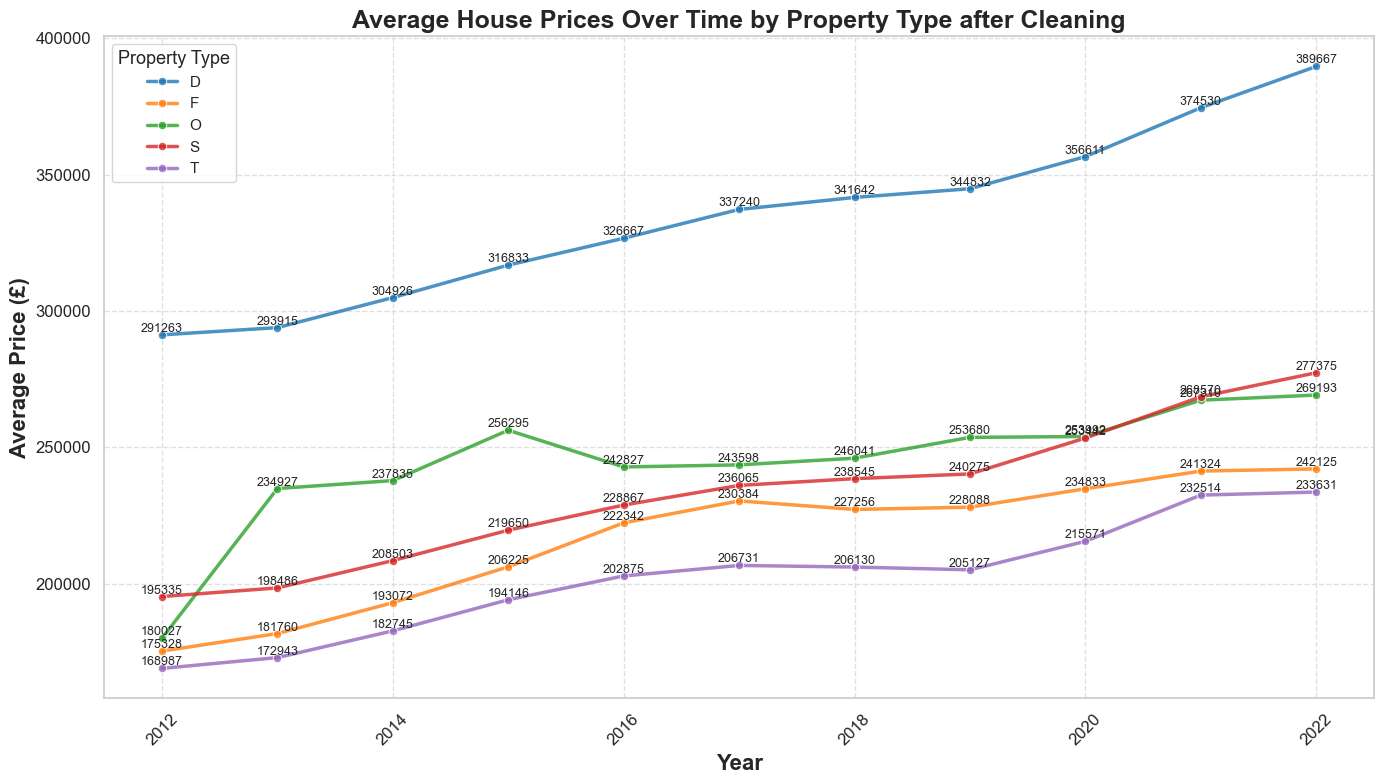

In [100]:
# Group by year and property type
average_price_by_type_year_clean = clean_df.groupby(['year', 'property_type'])['price'].mean().reset_index()

# Plotting average price over time by property type
plt.figure(figsize=(14, 8))  # Increased height for better readability
sns.lineplot(data=average_price_by_type_year_clean, x='year', y='price', hue='property_type', marker='o', palette='tab10', linewidth=2.5, alpha=0.8)

# Title and labels
plt.title('Average House Prices Over Time by Property Type after Cleaning', fontsize=18, weight='bold')
plt.xlabel('Year', fontsize=16, weight='bold')
plt.ylabel('Average Price (£)', fontsize=16, weight='bold')

# Customize ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Enhance legend
plt.legend(title='Property Type', title_fontsize='13', fontsize='11', loc='upper left')

# Add grid lines for better readability
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Add annotations for important points (if any, e.g., peaks)
for _, row in average_price_by_type_year_clean.iterrows():
    plt.text(row['year'], row['price'], f'{int(row["price"])}', fontsize=9, ha='center', va='bottom')

plt.tight_layout()
plt.show()

### **Comparative Analysis of Average House Prices by Property Type (`2012`–`2022`) Before and After Cleaning the Data**

After cleaning the data, we can see more accurate trends in average house prices by property type. The cleaned data has provided clearer insights into how property prices evolved over the decade, with the following key differences between the analysis before and after cleaning.

#### **Detached (D)**:

- **Before Cleaning**: Detached properties showed sharp increases in price, from £335,510 in 2012 to £529,372 in 2022.

- **After Cleaning**: The cleaned data reveals a more consistent, though still significant, price increase from £291,263 in 2012 to £389,667 in 2022.

- **Difference**: The cleaned data shows less volatility in the price increases for detached properties, with a more gradual rise than initially observed. The price is slightly lower overall but follows a consistent upward trend.

#### **Flats (F)**:

- **Before Cleaning**: Flats showed moderate but steady growth from £181,667 in 2012 to £267,442 in 2022.

- **After Cleaning**: Flats in the cleaned dataset show a more stable increase, from £175,328 in 2012 to £242,125 in 2022.

- **Difference**: The cleaned data shows reduced starting and ending values reflecting a more realistic trend. The price growth is more modest, suggesting a consistent, healthier market increase.

#### **Other (O)**:

- **Before Cleaning**: 'Other' property prices were more volatile, with sharp fluctuations observed throughout the years.

- **After Cleaning**: Prices for 'Other' properties show high volatility in the cleaned data as well, with a significant peak in 2015 and a gradual recovery to £269,193 by 2022.

- **Difference**: The volatility in the prices of 'Other' properties remains consistent before and after cleaning, though the cleaned dataset may present more accurate values due to the removal of outliers or data issues.

#### **Semi-Detached (S)**:

- **Before Cleaning**: Semi-detached properties showed steady price growth, from £199,145 in 2012 to £313,176 in 2022.

- **After Cleaning**: In the cleaned data, semi-detached properties increased from £195,335 in 2012 to £277,375 in 2022.

- **Difference**: The cleaned data shows more moderate price growth for semi-detached homes, with a slightly lower increase compared to the uncleaned data. This suggests that the cleaned dataset provided more accurate price trends, possibly removing overinflated prices in the raw data.

#### **Terraced (T)**:

- **Before Cleaning**: Terraced homes showed gradual price increases from £171,755 in 2012 to £263,083 in 2022.

- **After Cleaning**: The cleaned dataset shows a similar upward trend for terraced homes, from £168,987 in 2012 to £233,631 in 2022.

- **Difference**: The cleaned data reflects a slower price increase, with terraced properties experiencing less dramatic growth compared to the raw data, providing a more realistic view of the market.

The cleaned data presents a clearer picture of the housing market, with slightly lower but more consistent price increases across most property types.The cleaned dataset helps identify the true price trends by removing inconsistencies or outliers that may have skewed the analysis before cleaning.


# Building machine learning models

In [103]:
# List of columns to scale
columns_to_scale = ['population', 'GDHI', 'bank_rate', 'CPIH', 'unemployment_rate', 'GDP']

y = copy_of_final_ready_data['price']
X = copy_of_final_ready_data.drop(columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the specified columns for the training set
X_train_scaled_values = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled_values = scaler.transform(X_test[columns_to_scale])

# Convert the scaled arrays back into DataFrames with appropriate column names
X_train_scaled_df = pd.DataFrame(X_train_scaled_values, columns=columns_to_scale, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled_values, columns=columns_to_scale, index=X_test.index)

# Create a copy of the original training & test data to preserve the original data for further use
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[columns_to_scale] = X_train_scaled_df
X_test_scaled[columns_to_scale] = X_test_scaled_df

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled  = y_scaler.transform(y_test.values.reshape(-1, 1))

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print('*' * 30)

print("X_train Scaled shape:", X_train_scaled.shape)
print("X_test Scaled shape:", X_test_scaled.shape)
print("y_train Scaled shape:", y_train_scaled.shape)
print("y_test Scaled shape:", y_test_scaled.shape)

X_train shape: (2748405, 16)
X_test shape: (916136, 16)
y_train shape: (2748405,)
y_test shape: (916136,)
******************************
X_train Scaled shape: (2748405, 16)
X_test Scaled shape: (916136, 16)
y_train Scaled shape: (2748405, 1)
y_test Scaled shape: (916136, 1)


In [104]:
# Define the path to save the dictionary
file_path = './datasets/scaler_pkl.pkl'

# Save the dictionary as a pickle file
with open(file_path, 'wb') as file:
    pickle.dump(scaler, file)

print(f"Scaler saved to {file_path}")

with open(file_path, 'rb') as file:
    scaler_pkl = pickle.load(file)

Scaler saved to ./datasets/scaler_pkl.pkl


In [105]:
save_path = './datasets/'

# Define a dictionary to store all the variables you want to save
data_to_save = {'X': X, 'y': y, 'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test,
                'X_train Scaled': X_train_scaled, 'X_test Scaled': X_test_scaled, 'y_train Scaled': y_train_scaled, 'y_test Scaled': y_test_scaled}

# Save the dictionary to a .pkl file
with open(save_path + 'data_split.pkl', 'wb') as file:
    pickle.dump(data_to_save, file)

print("All variables saved to folder!")

All variables saved to folder!


In [106]:
pip install scikit-learn==1.5.1

Note: you may need to restart the kernel to use updated packages.


In [107]:
gd_folder_path         = './datasets/'

with open(gd_folder_path + 'data_split.pkl', 'rb') as file:
    data = pickle.load(file)

# Access the variables
X = data['X']
y = data['y']

X_train        = data['X_train']
X_test         = data['X_test']
y_train        = data['y_train']
y_test         = data['y_test']
X_train_scaled = data['X_train Scaled']
X_test_scaled  = data['X_test Scaled']
y_train_scaled = data['y_train Scaled']
y_test_scaled  = data['y_test Scaled']

print("X_train shape :", X_train.shape)
print("X_test shape  :", X_test.shape)
print("y_train shape :", y_train.shape)
print("y_test shape  :", y_test.shape)

print()
print('*' * 30)
print()

print("X_train Scaled shape :", X_train_scaled.shape)
print("X_test Scaled shape  :", X_test_scaled.shape)
print("y_train Scaled shape :", y_train_scaled.shape)
print("y_test Scaled shape  :", y_test_scaled.shape)

X_train shape : (2748405, 16)
X_test shape  : (916136, 16)
y_train shape : (2748405,)
y_test shape  : (916136,)

******************************

X_train Scaled shape : (2748405, 16)
X_test Scaled shape  : (916136, 16)
y_train Scaled shape : (2748405, 1)
y_test Scaled shape  : (916136, 1)


In [108]:
pd.set_option('display.float_format', '{:.4f}'.format)
folder_path              = './datasets/'

# Define the function
def evaluate_and_save_model_and_data(model, X_tr, X_ts, y_tr, y_ts, model_name):

    # Set default directory if file_path is not provided
    file_path = "results_dir/"


    # Full path for saving the files
    full_path = os.path.join(folder_path, file_path)

    # Ensure the directory exists
    if not os.path.exists(full_path):
        os.makedirs(full_path)
        print(f"Directory '{full_path}' created.")

    start_time = time.time()  # Start timing

    # Fit the model
    model.fit(X_tr, y_tr)
    end_time = time.time()  # End timing

    # Predictions
    y_train_pred = model.predict(X_tr)
    y_test_pred  = model.predict(X_ts)

    # Metrics
    metrics = {
        f'{model_name}_Train_MAE': mean_absolute_error(y_tr, y_train_pred),
        f'{model_name}_Test_MAE' : mean_absolute_error(y_ts, y_test_pred),
        f'{model_name}_Train_RMSE': sqrt(mean_squared_error(y_tr, y_train_pred)),
        f'{model_name}_Test_RMSE' : sqrt(mean_squared_error(y_ts, y_test_pred)),
        f'{model_name}_Train_R²' : round(r2_score(y_tr, y_train_pred), 4),
        f'{model_name}_Test_R²'  : round(r2_score(y_ts, y_test_pred), 4),
        f'{model_name}_Training_Time': round(end_time - start_time, 4)
    }

    # Save model
    model_path   = os.path.join(full_path, f'{model_name}_model.pkl')
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)

    # Save metrics as a DataFrame
    metrics_df = pd.DataFrame(list(metrics.items()), columns=["Metric", "Value"])
    metrics_path = os.path.join(full_path, f'{model_name}_metrics.pkl')
    metrics_df.to_pickle(metrics_path)

    print(f"Model and metrics saved at '{full_path}'.")

    # Return metrics as a DataFrame
    return metrics_df

In [109]:
test_data_1 = list(X_train_scaled.loc[2196248, :])
test_data_2 = list(X_train_scaled.loc[980396, :])


actual_value_data_1 = y_train[2196248]
actual_value_data_2 = y_train[980396]

print('Actual Value for "' + str(test_data_1) + '"  is "' + str(round(actual_value_data_1)) + '"')
print('Actual Value for "' + str(test_data_2) + '" is "' + str(round(actual_value_data_2)) + '"')

Actual Value for "[2.0, 0.0, 0.0, 311.0, 0.0, 53.176044, -3.09356, 2018.0, -1.00039010417843, -0.4942289745284622, -0.05823169479877148, 0.10580825311601592, -0.8244358721356687, 0.6871303302981459, 6.0, 29.0]"  is "300000"
Actual Value for "[3.0, 0.0, 1.0, 66.0, 0.0, 52.199319, 0.143782, 2015.0, 0.5698088058766948, 0.21037983111868522, -0.05823169479877148, -0.7645989505519043, 0.19502753237969636, -0.3659950639842872, 7.0, 14.0]" is "182500"


In [110]:
X_train_scaled.sample(5, random_state=42)

,property_type,old_new,duration,town_city,pdp_category_type,latitude,longitude,year,population,GDHI,bank_rate,CPIH,unemployment_rate,GDP,month,day
1325759,1,0,0,168,0,51.1276,1.1563,2016,-0.0002,-0.3835,-0.0582,-0.7498,-0.0402,-0.1974,2,5
3265126,0,0,0,127,1,53.8283,-3.0289,2021,-1.6537,-0.7703,-0.9217,1.0205,-0.5892,0.9328,8,13
1221867,2,0,0,223,0,51.4106,-3.2149,2015,-0.1850,-0.8433,-0.0582,-0.7203,0.1950,-0.3660,8,19
1121872,2,1,0,246,0,51.5807,-3.4454,2015,-0.9859,-1.4723,-0.0582,-0.7203,-0.0402,-0.2627,11,27
3611495,0,0,1,45,0,52.5167,-1.8166,2022,2.7635,-0.6984,5.3382,2.8941,-0.9813,1.5270,11,11


In [111]:
X_train.sample(5, random_state=42)

,property_type,old_new,duration,town_city,pdp_category_type,latitude,longitude,year,population,GDHI,bank_rate,CPIH,unemployment_rate,GDP,month,day
1325759,1,0,0,168,0,51.1276,1.1563,2016,520253.0000,18059.0000,0.5000,100.1000,5.1000,580110,2,5
3265126,0,0,0,127,1,53.8283,-3.0289,2021,140976.0000,16697.0000,0.1000,112.1000,4.4000,615459,8,13
1221867,2,0,0,223,0,51.4106,-3.2149,2015,477861.0000,16440.0000,0.5000,100.3000,5.4000,574836,8,19
1121872,2,1,0,246,0,51.5807,-3.4454,2015,294155.0000,14225.0000,0.5000,100.3000,5.1000,578068,11,27
3611495,0,0,1,45,0,52.5167,-1.8166,2022,1154221.0000,16950.0000,3.0000,124.8000,3.9000,634044,11,11


# Linear Regression

**Linear Regression** is chosen as a starting point because it is straightforward and easy to interpret. It serves as a baseline model, helping us understand how well a simple linear relationship can explain variations in house prices. This baseline provides a reference for evaluating the effectiveness of more advanced models.

In [113]:
# Linear Regression
# Set the file path used during saving
model_name = 'Linear_Regression'
model = LinearRegression()

saving_path =  folder_path + 'results_dir/'

# # Evaluate and save model, data, and scaler
evaluate_and_save_model_and_data(model, X_train_scaled, X_test_scaled, y_train, y_test, model_name)

# Loading the saved model
with open(saving_path + model_name + '_model.pkl', 'rb') as f:
    linear_regression_model = pickle.load(f)

# Loading the saved metrics
with open(saving_path + model_name + '_metrics.pkl', 'rb') as f:
    linear_regression_metrics = pickle.load(f)

# Making predictions
print('*' * 65)
print('Actual Value is', actual_value_data_1,
      'while the Predicted value by "' + model_name.replace('_', ' ') + '" is',
      np.round(linear_regression_model.predict([test_data_1]), 3)[0])
print('Actual Value is', actual_value_data_2,
      ' while the Predicted value by "' + model_name.replace('_', ' ') + '" is',
      np.round(linear_regression_model.predict([test_data_2]), 3)[0])
print('*' * 65)

# Displaying the metrics
linear_regression_metrics

Model and metrics saved at './datasets/results_dir/'.
*****************************************************************
Actual Value is 300000 while the Predicted value by "Linear Regression" is 214048.251
Actual Value is 182500  while the Predicted value by "Linear Regression" is 234775.265
*****************************************************************


,Metric,Value
0,Linear_Regression_Train_MAE,78902.9865
1,Linear_Regression_Test_MAE,78876.1266
2,Linear_Regression_Train_RMSE,102916.2020
3,Linear_Regression_Test_RMSE,102876.9372
4,Linear_Regression_Train_R²,0.4100
5,Linear_Regression_Test_R²,0.4092
6,Linear_Regression_Training_Time,0.8387


# Decision Tree Regressor

**Decision trees** are a strong choice for house price prediction considering economic indicators because they can capture complex, non-linear relationships between features. Additionally, decision trees are robust to outliers, can manage missing data, and automatically detect interactions between features. Their flexibility allows for tuning model complexity, and when used in ensemble methods like Random Forests or Gradient Boosting, they can further improve predictive accuracy.

In [115]:
# Initialize Decision Tree Regressor
model_name = 'Decision_Tree_Regressor'
model      = DecisionTreeRegressor(random_state=42, max_depth=25, min_samples_leaf=15)

# # Evaluate and save model, data, and scaler
evaluate_and_save_model_and_data(model, X_train_scaled, X_test_scaled, y_train, y_test, model_name)

with open(saving_path + model_name + '_model.pkl', 'rb') as f:
    decision_tree_model = pickle.load(f, fix_imports=True)

with open(saving_path + model_name + '_metrics.pkl', 'rb') as f:
    decision_tree_metrics = pickle.load(f)

# making predictions
print('*'*65)
print('Actual Value is', actual_value_data_1, 'while the Predicted value by "'  + model_name.replace('_', ' ') + '" is', np.round(decision_tree_model.predict([test_data_1]), 3)[0])
print('Actual Value is', actual_value_data_2, ' while the Predicted value by "' + model_name.replace('_', ' ') + '" is', np.round(decision_tree_model.predict([test_data_2]), 3)[0])
print('*'*65)

# displaying the metrics
decision_tree_metrics

Model and metrics saved at './datasets/results_dir/'.
*****************************************************************
Actual Value is 300000 while the Predicted value by "Decision Tree Regressor" is 278500.0
Actual Value is 182500  while the Predicted value by "Decision Tree Regressor" is 282071.154
*****************************************************************


,Metric,Value
0,Decision_Tree_Regressor_Train_MAE,41866.2331
1,Decision_Tree_Regressor_Test_MAE,49184.0243
2,Decision_Tree_Regressor_Train_RMSE,61604.2940
3,Decision_Tree_Regressor_Test_RMSE,72515.8821
4,Decision_Tree_Regressor_Train_R²,0.7886
5,Decision_Tree_Regressor_Test_R²,0.7064
6,Decision_Tree_Regressor_Training_Time,21.8944


# LightGBM Regressor

**LightGBM** is an effective model for house price prediction due to its speed and ability to handle large datasets and capture complex, non-linear relationships. It processes categorical variables natively and uses a leaf-wise growth strategy, which enhances its predictive performance. It uses gradient boosting, which builds trees sequentially to minimize errors, making it powerful for predicting house prices.

In [117]:
# Initialize LightGBM Regressor
model_name = 'LGBM_Regressor'
model      = LGBMRegressor(n_estimators=500, random_state=42, n_jobs=-1)

# # Evaluate and save model, data, and scaler
evaluate_and_save_model_and_data(model, X_train_scaled, X_test_scaled, y_train, y_test, model_name)

with open(saving_path + model_name + '_model.pkl', 'rb') as f:
    light_gradient_boosting_machines_model = pickle.load(f)
with open(saving_path + model_name + '_metrics.pkl', 'rb') as f:
    light_gradient_boosting_machines_metrics = pickle.load(f)

# making predictions
print('*'*65)
print('Actual Value is', actual_value_data_1, 'while the Predicted value by "'  + model_name.replace('_', ' ') + '" is', np.round(light_gradient_boosting_machines_model.predict([test_data_1]), 3)[0])
print('Actual Value is', actual_value_data_2, ' while the Predicted value by "' + model_name.replace('_', ' ') + '" is', np.round(light_gradient_boosting_machines_model.predict([test_data_2]), 3)[0])
print('*'*65)

# displaying the metrics
light_gradient_boosting_machines_metrics

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1532
[LightGBM] [Info] Number of data points in the train set: 2748405, number of used features: 16
[LightGBM] [Info] Start training from score 244969.219818
Model and metrics saved at './datasets/results_dir/'.
*****************************************************************
Actual Value is 300000 while the Predicted value by "LGBM Regressor" is 262344.792
Actual Value is 182500  while the Predicted value by "LGBM Regressor" is 281953.665
*****************************************************************


,Metric,Value
0,LGBM_Regressor_Train_MAE,52743.1641
1,LGBM_Regressor_Test_MAE,52781.1024
2,LGBM_Regressor_Train_RMSE,74753.6940
3,LGBM_Regressor_Test_RMSE,74930.8545
4,LGBM_Regressor_Train_R²,0.6887
5,LGBM_Regressor_Test_R²,0.6866
6,LGBM_Regressor_Training_Time,15.5522


# Random Forest Regressor

**Random Forest** is a robust model for house price prediction because it builds on decision trees by using an ensemble approach, improving accuracy and reducing overfitting. By combining predictions from multiple trees, it captures complex relationships between features without being overly sensitive to noise in the data.

In [119]:
# Random Forest
model_name = 'Random_Forest_Regressor'
model      = RandomForestRegressor(n_estimators=150, n_jobs=-1, max_depth =20)

# # Evaluate and save model, data, and scaler
evaluate_and_save_model_and_data(model, X_train_scaled, X_test_scaled, y_train, y_test, model_name)

with open(saving_path + model_name + '_model.pkl', 'rb') as f:
    random_forest_model = pickle.load(f)
with open(saving_path + model_name + '_metrics.pkl', 'rb') as f:
    random_forest_metrics = pickle.load(f)

# making predictions
print('*'*65)
print('Actual Value is', actual_value_data_1, 'while the Predicted value by "'  + model_name.replace('_', ' ') + '" is', np.round(random_forest_model.predict([test_data_1]), 3)[0])
print('Actual Value is', actual_value_data_2, ' while the Predicted value by "' + model_name.replace('_', ' ') + '" is', np.round(random_forest_model.predict([test_data_2]), 3)[0])
print('*'*65)

# displaying the metrics
random_forest_metrics

Model and metrics saved at './datasets/results_dir/'.
*****************************************************************
Actual Value is 300000 while the Predicted value by "Random Forest Regressor" is 264954.788
Actual Value is 182500  while the Predicted value by "Random Forest Regressor" is 312328.783
*****************************************************************


,Metric,Value
0,Random_Forest_Regressor_Train_MAE,38219.0419
1,Random_Forest_Regressor_Test_MAE,46380.9622
2,Random_Forest_Regressor_Train_RMSE,55144.5079
3,Random_Forest_Regressor_Test_RMSE,67992.2601
4,Random_Forest_Regressor_Train_R²,0.8306
5,Random_Forest_Regressor_Test_R²,0.7419
6,Random_Forest_Regressor_Training_Time,584.9859


# XGBoost Regressor

**XGBoost** is a powerful model for house price prediction due to its gradient boosting framework, which builds trees sequentially to correct errors made by previous ones. Its ability to handle both large-scale datasets and complex patterns makes it a powerful choice for our project.

In [121]:
# Initialize XGBoost Regressor
model_name = 'XGB_Regression'
# model      = XGBRegressor(n_estimators=500, random_state=42, n_jobs=-1, learning_rate=0.1, max_depth=15)
model      = XGBRegressor(n_estimators=1000, random_state=42, n_jobs=-1, learning_rate=0.1, max_depth=10)

# # Evaluate and save model, data, and scaler
evaluate_and_save_model_and_data(model, X_train_scaled, X_test_scaled, y_train, y_test, model_name)

with open(saving_path + model_name + '_model.pkl', 'rb') as f:
    xtreme_gradient_boosting_model = pickle.load(f)

with open(saving_path + model_name + '_metrics.pkl', 'rb') as f:
    xtreme_gradient_boosting_metrics = pickle.load(f)

# making predictions
print('*'*65)
print('Actual Value is', actual_value_data_1, 'while the Predicted value by "'  + model_name.replace('_', ' ') + '" is', np.round(xtreme_gradient_boosting_model.predict([test_data_1]), 3)[0])
print('Actual Value is', actual_value_data_2, ' while the Predicted value by "' + model_name.replace('_', ' ') + '" is', np.round(xtreme_gradient_boosting_model.predict([test_data_2]), 3)[0])
print('*'*65)

# displaying the metrics
xtreme_gradient_boosting_metrics

Model and metrics saved at './datasets/results_dir/'.
*****************************************************************
Actual Value is 300000 while the Predicted value by "XGB Regression" is 239698.3
Actual Value is 182500  while the Predicted value by "XGB Regression" is 320780.62
*****************************************************************


,Metric,Value
0,XGB_Regression_Train_MAE,43614.8691
1,XGB_Regression_Test_MAE,47962.6639
2,XGB_Regression_Train_RMSE,62231.6424
3,XGB_Regression_Test_RMSE,69605.1330
4,XGB_Regression_Train_R²,0.7843
5,XGB_Regression_Test_R²,0.7295
6,XGB_Regression_Training_Time,75.3887


# Model Parameter Selection Analysis

This section is about discussing the rationale behind choosing specific parameters and values for each model. The goal is to explain why these hyperparameters were selected and how they contribute to optimizing the performance of the models.

---

1. **Decision Tree Regressor:**

    - **Key Parameters:**
    `DecisionTreeRegressor(random_state=42, max_depth=25, min_samples_leaf=15)`
      
        - `random_state=42`:
        Ensures that the results are reproducible by fixing the seed for randomness.
        
        - `max_depth=25`:
        The depth of the tree. A depth of `25` is selected to ensure that the tree is sufficiently deep to capturee the data's complexity, but not so deep that it leads to overfitting.
        
        - `min_samples_leaf=15`:
        This parameter controls the minimum number of samples required to be at a leaf node. Setting this to `15` helps prevent overfitting by ensuring that the model does not fit noise or outliers too closely. It also makes the tree more generalizable.

    - **Justification:**

        THe `max_depth=25` paramerter provides enough depth to model complex relationships in the data while controlling overfittingg while `min_samples_leaf=15` ensures that leaf nodes represent a reasonable number of samples, which helps the model generalize better.

---


2. **LightGBM Regressor:**

    - **Key Parameters:**
    `LGBMRegressor(n_estimators=500, random_state=42, n_jobs=-1, verbose=-1)`

        - `n_estimators=500`:
        The number of trees. Similar to XGBoost, LightGBM benefits from having more trees, with 500 being a good balance between performance and computation time.
        
        - `random_state=42`:
        Ensures reproducibility across multiple runs.
        
        - `n_jobs=-1`:
        Enables parallel processing, which improves training time, particularly with large datasets.
        
        - `verbose=-1`:
        Suppresses the output of training logs to reduce console clutter during model training. It's typically used in production environments or automated scripts where verbosity is not needed.

    - **Justification:**
    
        The `n_estimators=500` is chosen for a high-performing model that can capture complex patterns without significant overfitting whereas the `n_jobs=-1` accelerates the training, allowing LightGBM to leverage all CPU cores. The `verbose=-1` is mainly used to reduce unnecessary logging during trainning.


---

3. **Linear Regression:**
`LinearRegression()`

- **Justification:**
        Linear regression is a simple, well-understood algorithm that does not require much tuning. The algorithm is robust and works well for datasets where relationships between features and target are linear. Linear Regression in scikit-learn is based on the ordinary least squares method, which is optimal when the relationship between features and target variable is linear. The lack of hyperparameter tuning is justified by the simplicity and interpretability of the model.

---


2. **Random Forest Regressor:**

    - **Key Parameters:**
    `RandomForestRegressor(n_estimators=150, n_jobs=-1, max_depth =20)`

        - `n_estimators=150`:
        The number of trees in the forest. While `100` is a typical starting point, **`150`** trees are chosen for improved accuracy and stability of predictions without overfitting. More trees generally reduce variance and improve model robustness.

        - `n_jobs=-1`:
        This allows the model to train using all available CPU cores, speeding up the training process and improving efficiency.

        - `max_depth=20`:
        Limiting the depth of trees ensures that the model does not overfit, while a depth of `20` allows trees to learn enough complexity from the data. This value is selected after testing to avoid overly shallow trees that could miss key patterns.

    - **Justification:**

    The choice of `n_estimators=150` is made to strike a balance between model complexity and overfitting, ensuring a good performance in terms of both accuracy and computational efficiency. The parameter `max_depth=20` is a reasonable choice for this model, as it helps prevent overfitting while capturing enough complexity in the decision trees. `n_jobs=-1` accelerates training, which is beneficial for large datasets.

---    


5. **XGBoost Regressor:**

    - **Key Parameters:**
    `XGBRegressor(n_estimators=1000, random_state=42, n_jobs=-1, learning_rate=0.1, max_depth=10)`

        - `n_estimators=1000`:
        The number of boosting rounds (trees). A higher value like `1000` helps increase the model's ability to fit the training data and improve predictive power. It's selected after testing for optimal performance while balancing training time and overfitting.

        - `random_state=42`:
        A fixed random seed ensures reproducibility and consistency across experiments. It allows for comparison between runs and ensures the same model is trained each time.

        - `n_jobs=-1`:
        This parameter enables parallel computation by utilizing all available CPU cores. This speeds up model training, especially for large datasets.

        - `learning_rate=0.1`:
        A moderate learning rate helps strike a balance between training speed and performance. If too high, the model may overfit or converge too quickly; if too low, the model may take too long to converge. `0.1` is a commonly used default and often performs well in practice.

        - `max_depth=10`:
        The maximum depth of each tree. A value of `10` ensures that the trees are deep enough to capture the complexity of the data, but not so deep that they overfit. This is a hyperparameter that is tuned based on cross-validation to strike a balance between model complexity and overfitting.

    - **Justification:**
        
        The `n_estimators=1000` value is chosen for better model accuracy and performance by using a larger number of trees, whereas the combination of `learning_rate=0.1` and `max_depth=10` ensures a well-regularized model that avoids overfitting while still being able to capture complex patterns in the data. The `n_jobs=-1` enables faster training, which is essential for large datasets.


---


#### **Conclusion:**

The selected parameters for each model are carefully chosen based on a combination of best practices and experimentation to balance model complexity and performance:

For **tree-based** models (**XGBoost**, **RandomForest**, **LightGBM**, and **DecisionTree**), parameters like `n_estimators`, `max_depth`, and `min_samples_leaf` help control overfitting and ensure the model captures the underlying patterns without being too complex. Whereas for **LinearRegression**, the default model configuration is sufficient, as it assumes a linear relationship between features and target variables. Parameters like `n_jobs=-1` are chosen to optimize computational efficiency, particularly for large datasets.

These choices are made after testing different hyperparameters to find the optimal balance for **accuracy**, **speed**, and **generalization**.

---



# Evaluating Model Performance

In [124]:
important_metrics = [decision_tree_metrics, light_gradient_boosting_machines_metrics,
                     linear_regression_metrics, random_forest_metrics, xtreme_gradient_boosting_metrics]

important_df = pd.concat(important_metrics, axis=0)

metrics_to_keep = ["Train_MAE", "Test_MAE", "Train_RMSE", "Test_RMSE", "Train_R²", "Test_R²", "Training_Time"]
important_filtered_df = important_df[important_df['Metric'].str.contains('|'.join(metrics_to_keep))]

important_filtered_df['Model'] = important_filtered_df['Metric'].str.extract(r'^([A-Za-z0-9_]+)(?=_(Train|Test|Training))|([A-Za-z0-9_]+)')[0]
important_filtered_df['Model'] = important_filtered_df['Model'].str.replace(r'\d+$', '', regex=True)
important_filtered_df['Metric_Type'] = important_filtered_df['Metric'].str.extract(r'(Train_MAE|Test_MAE|Train_RMSE|Test_RMSE|Train_R²|Test_R²|Training_Time)')

important_Models = important_filtered_df.pivot(index='Model', columns='Metric_Type', values='Value').reset_index()
important_Models = important_Models[['Model', 'Test_MAE', 'Test_RMSE', 'Test_R²', 'Train_MAE', 'Train_RMSE', 'Train_R²', 'Training_Time']]

# Remove trailing numbers or numeric suffixes from the 'Model' column in important_Models
important_Models['Model'] = important_Models['Model'].str.replace(r'\d+$', '', regex=True)
important_Models.columns.name = None

# Display the final DataFrame
important_Models

,Model,Test_MAE,Test_RMSE,Test_R²,Train_MAE,Train_RMSE,Train_R²,Training_Time
0,Decision_Tree_Regressor,49184.0243,72515.8821,0.7064,41866.2331,61604.2940,0.7886,21.8944
1,LGBM_Regressor,52781.1024,74930.8545,0.6866,52743.1641,74753.6940,0.6887,15.5522
2,Linear_Regression,78876.1266,102876.9372,0.4092,78902.9865,102916.2020,0.4100,0.8387
3,Random_Forest_Regressor,46380.9622,67992.2601,0.7419,38219.0419,55144.5079,0.8306,584.9859
4,XGB_Regression,47962.6639,69605.1330,0.7295,43614.8691,62231.6424,0.7843,75.3887


In [125]:
# Train_MAE
important_df_train_mae = important_filtered_df[important_filtered_df['Metric'].str.contains('Train_MAE')]
important_df_train_mae = important_df_train_mae[['Model', 'Metric_Type', 'Value']].sort_values(by='Value', ascending=True).reset_index(drop=True)

# Test_MAE
important_df_test_mae = important_filtered_df[important_filtered_df['Metric'].str.contains('Test_MAE')]
important_df_test_mae = important_df_test_mae[['Model', 'Metric_Type', 'Value']].sort_values(by='Value', ascending=True).reset_index(drop=True)

# Train_RMSE
important_df_train_rmse = important_filtered_df[important_filtered_df['Metric'].str.contains('Train_RMSE')]
important_df_train_rmse = important_df_train_rmse[['Model', 'Metric_Type', 'Value']].sort_values(by='Value', ascending=True).reset_index(drop=True)

# Test_RMSE
important_df_test_rmse = important_filtered_df[important_filtered_df['Metric'].str.contains('Test_RMSE')]
important_df_test_rmse = important_df_test_rmse[['Model', 'Metric_Type', 'Value']].sort_values(by='Value', ascending=True).reset_index(drop=True)

# Train_R²
important_df_train_r2 = important_filtered_df[important_filtered_df['Metric'].str.contains('Train_R²')]
important_df_train_r2 = important_df_train_r2[['Model', 'Metric_Type', 'Value']].sort_values(by='Value', ascending=True).reset_index(drop=True)

# Test_R²
important_df_test_r2 = important_filtered_df[important_filtered_df['Metric'].str.contains('Test_R²')]
important_df_test_r2 = important_df_test_r2[['Model', 'Metric_Type', 'Value']].sort_values(by='Value', ascending=True).reset_index(drop=True)

# Training_Time
important_df_training_time = important_filtered_df[important_filtered_df['Metric'].str.contains('Training_Time')]
important_df_training_time = important_df_training_time[['Model', 'Metric_Type', 'Value']].sort_values(by='Value', ascending=True).reset_index(drop=True)

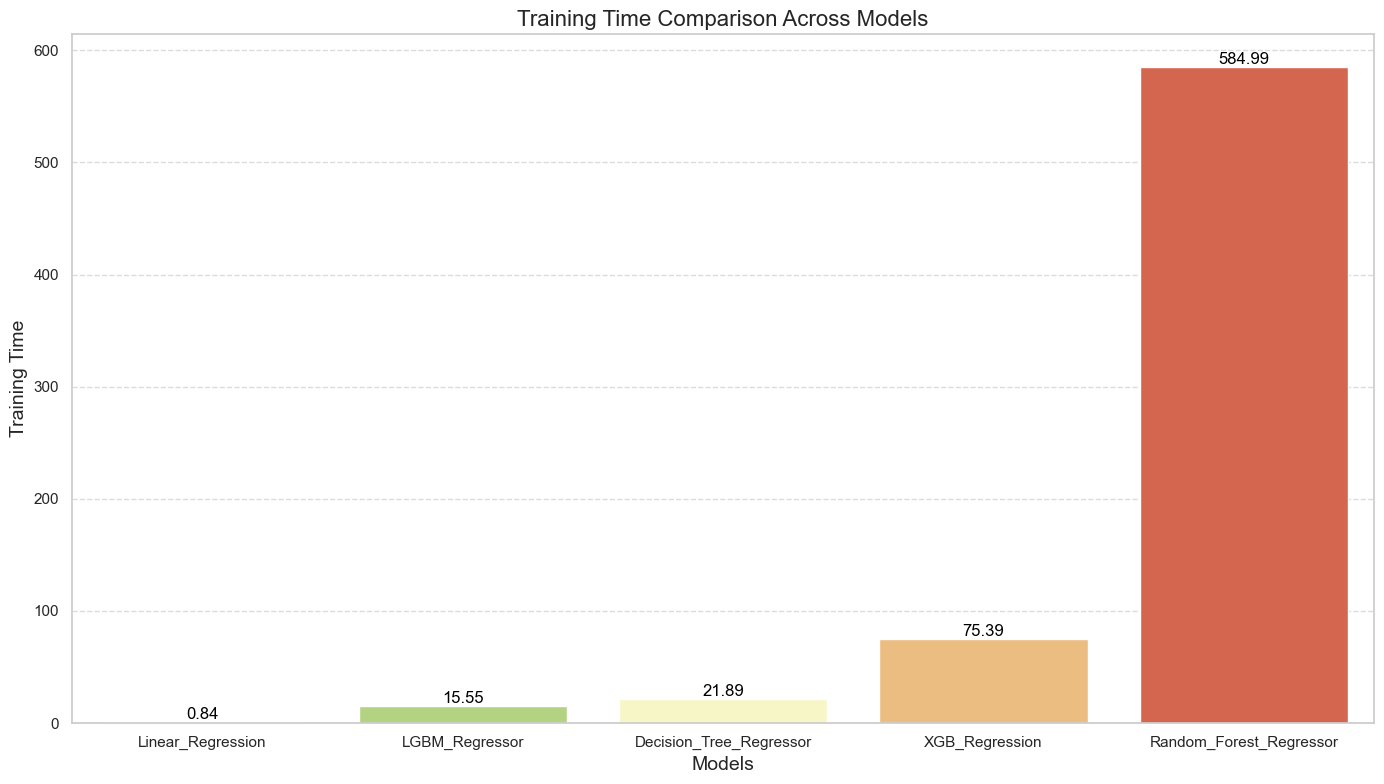

In [126]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create the plot with vertical bars
plt.figure(figsize=(14, 8))

# Plot with vertical bars and a refined color palette
sns.barplot(x='Model', y='Value', data=important_df_training_time, palette='RdYlGn_r')

# Add labels and title with more readable fonts and sizes
plt.xlabel('Models', fontsize=14)
plt.ylabel('Training Time', fontsize=14)
plt.title('Training Time Comparison Across Models', fontsize=16)

# Annotate values on top of the bars
for index, row in important_df_training_time.iterrows():
    plt.text(index, row['Value'], f'{row["Value"]:.2f}', ha='center', va='bottom', fontsize=12, color='black')

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot with tight layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

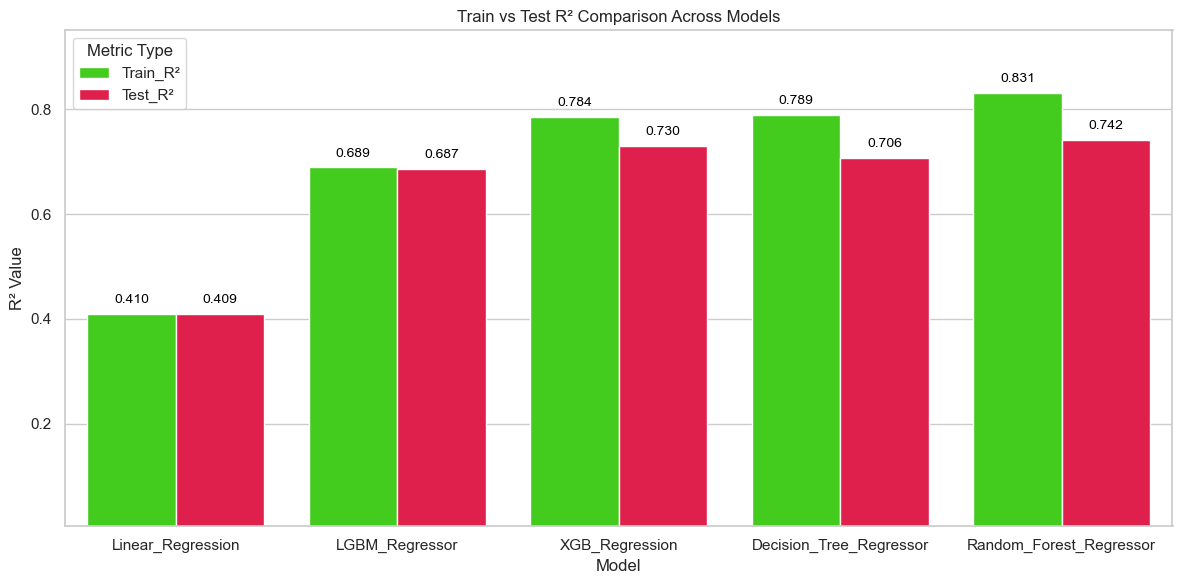

In [127]:
important_df_train_r2['Metric_Type'] = 'Train_R²'
important_df_test_r2['Metric_Type']  = 'Test_R²'
r2_combined                          = pd.concat([important_df_train_r2, important_df_test_r2]).reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Value', hue='Metric_Type', data=r2_combined, palette='prism')
plt.xlabel('Model')
plt.ylabel('R² Value')
plt.title('Train vs Test R² Comparison Across Models')
plt.ylim(0.005, 0.95)
plt.legend(title='Metric Type', loc='best')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()

plt.show()

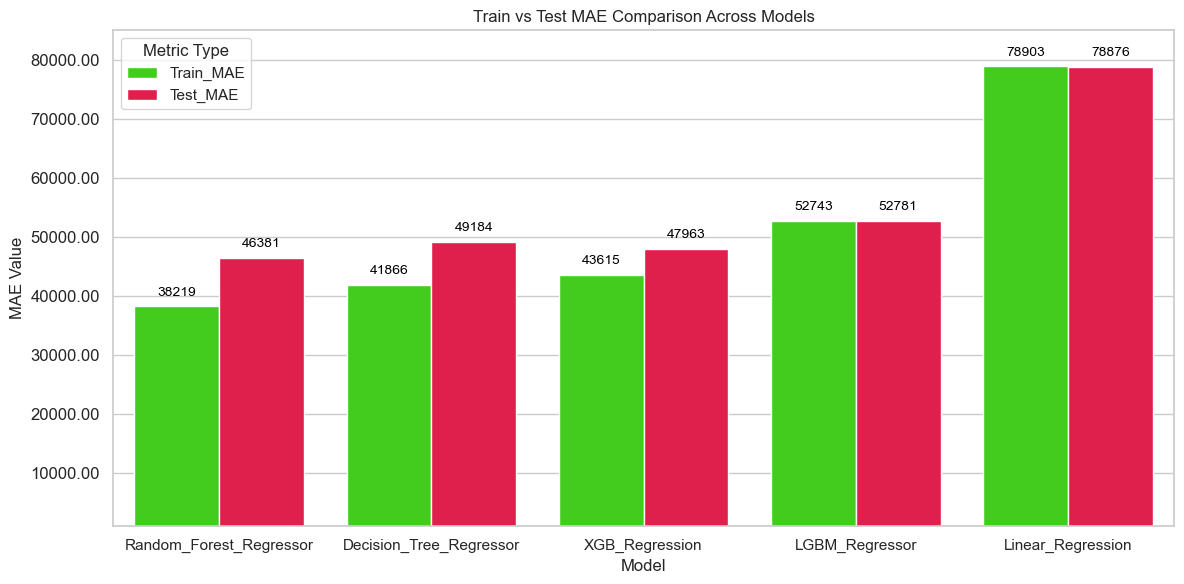

In [128]:
important_df_train_mae['Metric_Type'] = 'Train_MAE'
important_df_test_mae['Metric_Type']  = 'Test_MAE'
mae_combined                          = pd.concat([important_df_train_mae, important_df_test_mae]).reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Value', hue='Metric_Type', data=mae_combined, palette='prism')
plt.xlabel('Model')
plt.ylabel('MAE Value')
plt.title('Train vs Test MAE Comparison Across Models')
plt.ylim(1000, 85000)
plt.legend(title='Metric Type', loc='best')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

plt.gca().set_xticks(range(len(mae_combined['Model'].unique())))  # Manually setting the x-ticks
plt.gca().tick_params(axis='y', labelsize=12)  # Adjust y-axis label size if needed

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))

plt.tight_layout()

plt.show()

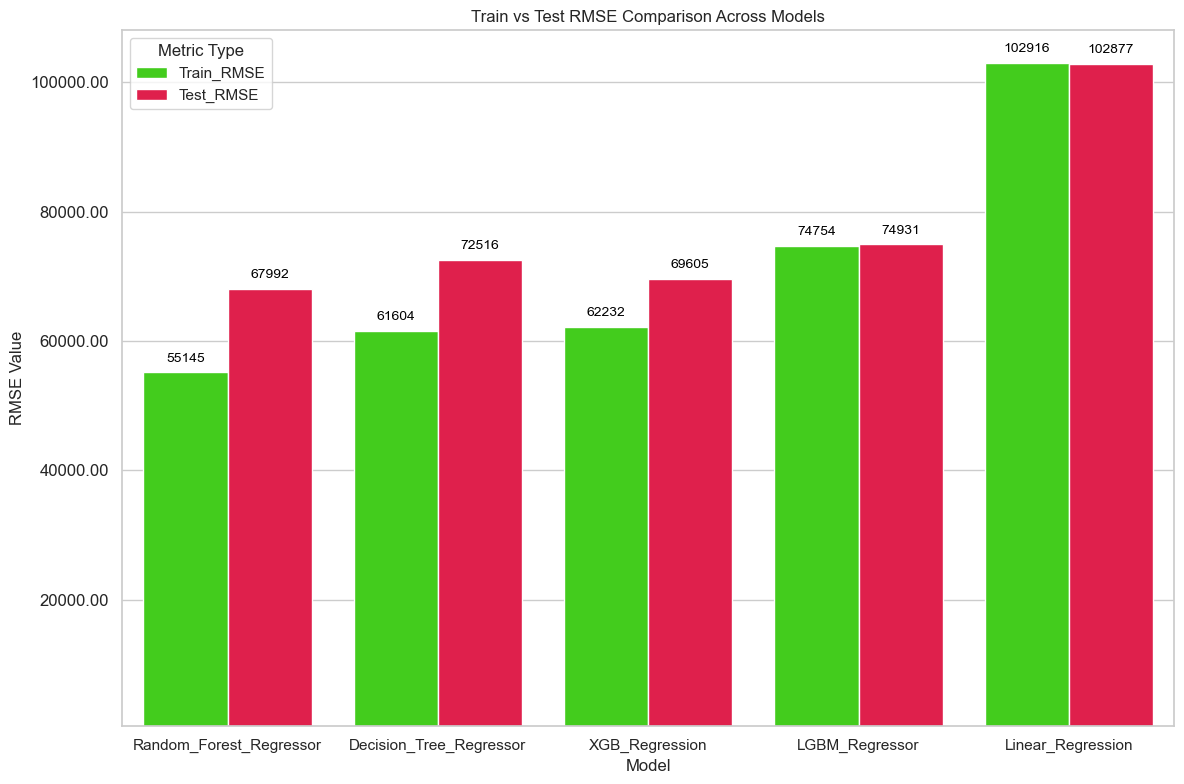

In [129]:
important_df_train_rmse['Metric_Type'] = 'Train_RMSE'
important_df_test_rmse['Metric_Type']  = 'Test_RMSE'
rmse_combined                          = pd.concat([important_df_train_rmse, important_df_test_rmse]).reset_index(drop=True)

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Value', hue='Metric_Type', data = rmse_combined, palette = 'prism')
plt.xlabel('Model')
plt.ylabel('RMSE Value')
plt.title('Train vs Test RMSE Comparison Across Models')
plt.ylim(500, 108000)
plt.legend(title='Metric Type', loc='best')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

plt.gca().set_xticks(range(len(rmse_combined['Model'].unique())))
plt.gca().tick_params(axis='y', labelsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))

plt.tight_layout()

plt.show()

### **Decision Tree Model Analysis**

#### **Model Overview**

The **Decision Tree Regressor** is a non-parametric model that creates a tree-like structure based on feature splits to make predictions. Each node in the tree represents a decision rule on a feature, and the model splits the data iteratively to minimize prediction error. This model is interpretable and flexible, capturing non-linear relationships in the data. However, **Decision Trees** are prone to overfitting, especially with deeper trees.

---

#### **Performance Metrics**

##### **Error Metrics:**

**Train MAE**: `41866.2331`  
**Test MAE**: `49184.0243`  
**Train RMSE**: `61604.2940`  
**Test RMSE**: `72515.8821`

- The increase in error from `41866.233` on the training set to `49184.0243` on the test set indicates slight overfitting.
  
- The relatively higher test RMSE (`72515.8821`) suggests that the model may benefit from regularization techniques, such as limiting tree depth or pruning, to reduce overfitting and improve generalization.

##### **R² Scores:**

**Train R²**: `0.7886`  
**Test R²**: `0.7064`  

- An R² score of `0.7886` on the training data shows that the model explains approximately `78%` of the variance.  

- On the test set, the R² score drops to `0.7064`, indicating reduced predictive power and slight overfitting.  

##### **Training Time:** `21.4440` seconds  

- The training time remains quick (`21.4440` seconds), highlighting the computational efficiency of **Decision Trees**.

---

#### **Model Strengths and Weaknesses**

##### **Strengths:**

- **Interpretability**: The model is straightforward to interpret, with clear feature importances and decision rules.  

- **Efficiency**: Quick training time makes it suitable for large datasets.  

##### **Weaknesses:**

- **Generalization**: Single **Decision Trees** often struggle to generalize, as reflected in the performance gap between the training and test sets.

---

### **Light Gradient Boosting Machines (LGBM) Model Analysis**

#### **Model Overview**

**Light Gradient Boosting Machines (LGBM)** is a faster and more efficient variant of **Gradient Boosting**, designed to handle large datasets and high-dimensional features with greater speed and lower memory usage. **LGBM** uses a histogram-based approach to decision tree building, significantly reducing training time without sacrificing accuracy. This model excels in scenarios involving large-scale datasets and real-time predictions.

---

#### **Performance Metrics**

##### **Error Metrics:**
**Train MAE**: `52743.1641`  
**Test MAE**: `52781.1024`  
**Train RMSE**: `74753.6940`  
**Test RMSE**: `74930.8545`  

- The close **MAE** and **RMSE** values for training and test sets indicate excellent generalization.  

- The model performs consistently across datasets, reflecting stability and minimal overfitting.

##### **R² Scores:**
**Train R²**: `0.6887`  
**Test R²**: `0.6866`

- The **Train R²** of `0.6887` means the model explains about `68.87%` of the variance in the training data.  

- The **Test R²** of `0.6866` confirms the model’s ability to generalize, showing similar predictive power on unseen data.

##### **Training Time:**: `15.5683` seconds  

- The training time of `15.5683` seconds highlights the efficiency of **LGBM**, making it significantly faster than traditional boosting methods like **Gradient Boosting**.

---

#### **Model Strengths and Weaknesses**

##### **Strengths:**

- **Efficiency**: Quick training time (`15.5683` seconds) makes **LGBM** ideal for time-sensitive applications.  

- **Memory Optimization**: The histogram-based approach ensures lower memory usage compared to traditional methods.  

- **Generalization**: Strong performance on both training and test sets reflects a balanced model that avoids overfitting.

##### **Weaknesses:**

- **Moderate Predictive Power**: While **LGBM** generalizes well, its **R²** scores of `0.6887` (train) and `0.6866` (test) may fall short compared to more complex models.  

- **Hyperparameter Sensitivity**: Achieving optimal performance still requires careful tuning.  

- **Outlier Sensitivity**: Like other boosting methods, **LGBM** may be affected by outliers, necessitating robust preprocessing.

---

### **Linear Regression Model Analysis**

### **Model Overview**
**Linear Regression** is a statistical method that models the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship, where changes in the predictors lead to proportional changes in the target variable. While simple and interpretable, **Linear Regression** may not capture complex relationships that require more advanced models.

---

### **Performance Metrics**

#### **Error Metrics:**

**Train MAE**: `78,902.9865`
**Test MAE**: `78,876.1266`
**Train RMSE**: `102,916.2020`
**Test RMSE**: `102,876.9372`

**Interpretation**:

- The **MAE** and **RMSE** values for both training and testing are quite close to each other, suggesting that **Linear Regression** is consistently performing across both datasets, with no significant overfitting or underfitting.

- However, the relatively high **MAE** and **RMSE** values indicate that the model's predictive accuracy could be improved. The error magnitudes suggest the model struggles to make precise predictions, which is typical for **Linear Regression** when relationships between features and the target are not strictly linear.

#### **R² Scores:**

**Train R²**: `0.4100`
**Test R²**: `0.4092`

**Interpretation**:

- Both the **Train R²** and **Test R²** scores are very close to each other , meaning the model explains roughly `40%` of the variance in the data. This is considered a low performance for regression models.

- The similarity between the **train R²** and **test R²** values suggests that the model generalizes reasonably well. However, the relatively low **R²** values indicate that **Linear Regression** may not be capturing important nonlinear relationships in the data, which could be why the model’s explanatory power is limited.

#### **Training Time:**

**Training Time**: `0.9570 seconds`

---

### **Model Strengths and Weaknesses**

#### **Strengths:**

- **Simplicity and Interpretability**: **Linear Regression** is a simple model that provides direct insights into the relationship between features and the target variable. The coefficients can be interpreted as the effect of each predictor on the target.

- **Fast Training**: The model’s low training time makes it suitable for quick iterations and deployment, especially in real-time prediction scenarios where computational efficiency is important.

#### **Weaknesses:**

- **Limited to Linear Relationships**: **Linear Regression** assumes linearity in relationships, which limits its performance when the data has complex or non-linear relationships. In cases where interactions between features or nonlinear patterns are present, **Linear Regression** will likely underperform.

- **Low R² Value**: The **Train R²** and **Test R²** values indicate that **Linear Regression** is not capturing a substantial amount of the variance in the data. This suggests that either feature engineering or a more advanced model is necessary to improve performance.

### **Random Forest Regressor Model Analysis**

#### **Model Overview**

The **Random Forest Regressor** is an ensemble learning technique that constructs multiple decision trees and aggregates their results for predictions. This reduces the variance inherent in individual trees, leading to more robust and stable predictions.

---

#### **Performance Metrics**

##### **Error Metrics:**

**Train MAE**: `38227.6441`  
**Test MAE**: `46387.1159`  
**Train RMSE**: `55136.5522`  
**Test RMSE**: `67997.5357`  

**Interpretation**:  
- The **MAE** and **RMSE** scores indicate strong performance on the training set, with slightly higher errors on the test set.  
- While the model generalizes well, the gap between training and test metrics suggests mild overfitting, which is a common characteristic of **Random Forests**.

##### **R² Scores:**

**Train R²**: `0.8307`  
**Test R²**: `0.7419`  

**Interpretation**:  

- The **Train R²** of `0.8307` indicates that the model explains about `83.07%` of the variance in the training data.  

- The **Test R²** of `0.7419` reflects good generalization, capturing approximately `74.19%` of the variance in unseen data.  

- The drop in **R²** between training and test sets highlights slight overfitting but is within acceptable limits for **Random Forest** models.

##### **Training Time:**: `604.86` seconds 

**Interpretation**:  

- The training time of approximately `10 minutes` suggests a computationally intensive process due to the ensemble nature of **Random Forests**.

---

#### **Model Strengths and Weaknesses**

##### **Strengths:**

- **High Predictive Power**: The **R²** scores and low error metrics demonstrate the model’s ability to effectively capture relationships in the data.  

- **Robustness**: The ensemble approach ensures stability and reduces the risk of overfitting compared to individual decision trees.  

- **Interpretability**: The feature importance scores offer clear insights into the factors driving predictions.

##### **Weaknesses:**

- **Computational Complexity**: The training time of `604.86` seconds highlights the model's resource-intensive nature. Scaling to larger datasets could increase this challenge.  

- **Mild Overfitting**: The gap between training and test performance suggests some overfitting, though it remains within acceptable limits.

---

### **Xtreme Gradient Boosting (XGBoost) Model Analysis**

#### **Model Overview**

**Xtreme Gradient Boosting (XGBoost)** is an optimized version of **Gradient Boosting**, improving performance through better regularization, parallelization, and tree boosting techniques. Known for its efficiency, speed, and high predictive power, **XGBoost** is widely used in regression tasks involving structured/tabular data. It is a preferred choice for many industry and academic applications.

---

#### **Performance Metrics**

##### **Error Metrics:**

**Train MAE**: `43614.8691`
**Test MAE**: `47962.6639`
**Train RMSE**: `62231.6424`
**Test RMSE**: `69605.1330`

**Interpretation**:

- The difference in **MAE** and **RMSE** between training and test sets indicates some overfitting, with the model performing better on training data.

- The **MAE** values show the model predicts within `43614.8691` for training data and `47962.6639` for test data on average, reflecting moderate prediction errors.

- **RMSE** highlights a more pronounced gap between training and test performance, suggesting further tuning may reduce overfitting.

##### **R² Scores:**
**Train R²**: `0.7843`
**Test R²**: `0.7295`

**Interpretation**:

- A **Train R²** of `0.7843` means the model explains approximately `78.43%` of the variance in the training data, showcasing strong training performance.
- The **Test R²** of `0.7295` demonstrates that the model explains around `72.95%` of the variance in unseen data. Although slightly overfit, the model generalizes reasonably well.

##### Training Time: `70.1251` seconds
**Interpretation**:

- The training time is moderate, balancing between computational efficiency and predictive performance. **XGBoost** typically requires more resources than simpler models but remains faster than traditional **Gradient Boosting**.

---

#### **Model Strengths and Weaknesses**

##### **Strengths:**

- **High Predictive Power**: The **R²** scores indicate that **XGBoost** captures complex patterns effectively, providing robust predictions.

- **Efficiency**: Moderate training time and parallelization make it suitable for larger datasets.

- **Feature Importance**: Offers clear insights into significant predictors, aiding interpretability.

- **Regularization**: Built-in regularization helps mitigate overfitting compared to traditional boosting models.

##### **Weaknesses:**

- **Computational Cost**: Training is slower than lightweight models like **LightGBM**, which might be a limitation for real-time applications.

---

In [135]:
def compare_models(df_train_r2, df_test_r2, df_train_rmse, df_test_rmse, df_train_mae, df_test_mae):
    
    # Merge train and test scores by Model name
    merged_r2 = pd.merge(df_train_r2, df_test_r2, on="Model", suffixes=('_train', '_test'))
    merged_rmse = pd.merge(df_train_rmse, df_test_rmse, on="Model", suffixes=('_train', '_test'))
    merged_mae = pd.merge(df_train_mae, df_test_mae, on="Model", suffixes=('_train', '_test'))

    # Extracting values
    merged_r2 = merged_r2[['Model', 'Value_train', 'Value_test']].rename(
        columns={'Value_train': 'Train_R2', 'Value_test': 'Test_R2'}
    )
    merged_rmse = merged_rmse[['Model', 'Value_train', 'Value_test']].rename(
        columns={'Value_train': 'Train_RMSE', 'Value_test': 'Test_RMSE'}
    )
    merged_mae = merged_mae[['Model', 'Value_train', 'Value_test']].rename(
        columns={'Value_train': 'Train_MAE', 'Value_test': 'Test_MAE'}
    )

    #  Combine R², RMSE, and MAE
    metrics_df = pd.merge(merged_r2, merged_rmse, on="Model")
    metrics_df = pd.merge(metrics_df, merged_mae, on="Model")

    # Compute average values for train and test metrics
    # The averages help balance performance on seen (train) and unseen (test) data,reducing the risk of overfitting or underfitting
    metrics_df['R2_Avg'] = (metrics_df['Train_R2'] + metrics_df['Test_R2']) / 2
    metrics_df['RMSE_Avg'] = (metrics_df['Train_RMSE'] + metrics_df['Test_RMSE']) / 2
    metrics_df['MAE_Avg'] = (metrics_df['Train_MAE'] + metrics_df['Test_MAE']) / 2

    # Rank models based on their performance
    # Higher R² values are better, so ranked in descending order
    metrics_df['R2_Rank'] = metrics_df['R2_Avg'].rank(ascending=False)

    # Lower RMSE and MAE values are better, so ranked in ascending order
    metrics_df['RMSE_Rank'] = metrics_df['RMSE_Avg'].rank(ascending=True)
    metrics_df['MAE_Rank'] = metrics_df['MAE_Avg'].rank(ascending=True)
    metrics_df['Overall_Score'] = metrics_df['R2_Rank'] + metrics_df['RMSE_Rank'] + metrics_df['MAE_Rank']

    # Calculate overall score by summing the ranks
    # A lower overall score indicates a better-performing model
    all_model_comparison = metrics_df.sort_values(by='Overall_Score')
    best_model = all_model_comparison.iloc[0]

    return all_model_comparison, best_model

# Usage
all_model_comparison, best_model = compare_models(important_df_train_r2, important_df_test_r2,
                            important_df_train_rmse, important_df_test_rmse,
                            important_df_train_mae, important_df_test_mae)

all_model_comparison = all_model_comparison[['Model', 'Train_R2', 'Test_R2', 'Train_MAE', 'Test_MAE', 'Train_RMSE', 'Test_RMSE',
                                             'R2_Avg', 'RMSE_Avg', 'MAE_Avg', 'R2_Rank', 'RMSE_Rank', 'MAE_Rank', 'Overall_Score']]

print(f'\nBest Model for Deployment: "{best_model["Model"]}\n"')
print(best_model)

all_model_comparison


Best Model for Deployment: "Random_Forest_Regressor
"
Model            Random_Forest_Regressor
Train_R2                          0.8306
Test_R2                           0.7419
Train_RMSE                    55144.5079
Test_RMSE                     67992.2601
Train_MAE                     38219.0419
Test_MAE                      46380.9622
R2_Avg                            0.7863
RMSE_Avg                      61568.3840
MAE_Avg                       42300.0021
R2_Rank                           1.0000
RMSE_Rank                         1.0000
MAE_Rank                          1.0000
Overall_Score                     3.0000
Name: 4, dtype: object


,Model,Train_R2,Test_R2,Train_MAE,Test_MAE,Train_RMSE,Test_RMSE,R2_Avg,RMSE_Avg,MAE_Avg,R2_Rank,RMSE_Rank,MAE_Rank,Overall_Score
4,Random_Forest_Regressor,0.8306,0.7419,38219.0419,46380.9622,55144.5079,67992.2601,0.7863,61568.3840,42300.0021,1.0000,1.0000,1.0000,3.0000
2,XGB_Regression,0.7843,0.7295,43614.8691,47962.6639,62231.6424,69605.1330,0.7569,65918.3877,45788.7665,2.0000,2.0000,3.0000,7.0000
3,Decision_Tree_Regressor,0.7886,0.7064,41866.2331,49184.0243,61604.2940,72515.8821,0.7475,67060.0881,45525.1287,3.0000,3.0000,2.0000,8.0000
1,LGBM_Regressor,0.6887,0.6866,52743.1641,52781.1024,74753.6940,74930.8545,0.6876,74842.2742,52762.1333,4.0000,4.0000,4.0000,12.0000
0,Linear_Regression,0.4100,0.4092,78902.9865,78876.1266,102916.2020,102876.9372,0.4096,102896.5696,78889.5565,5.0000,5.0000,5.0000,15.0000


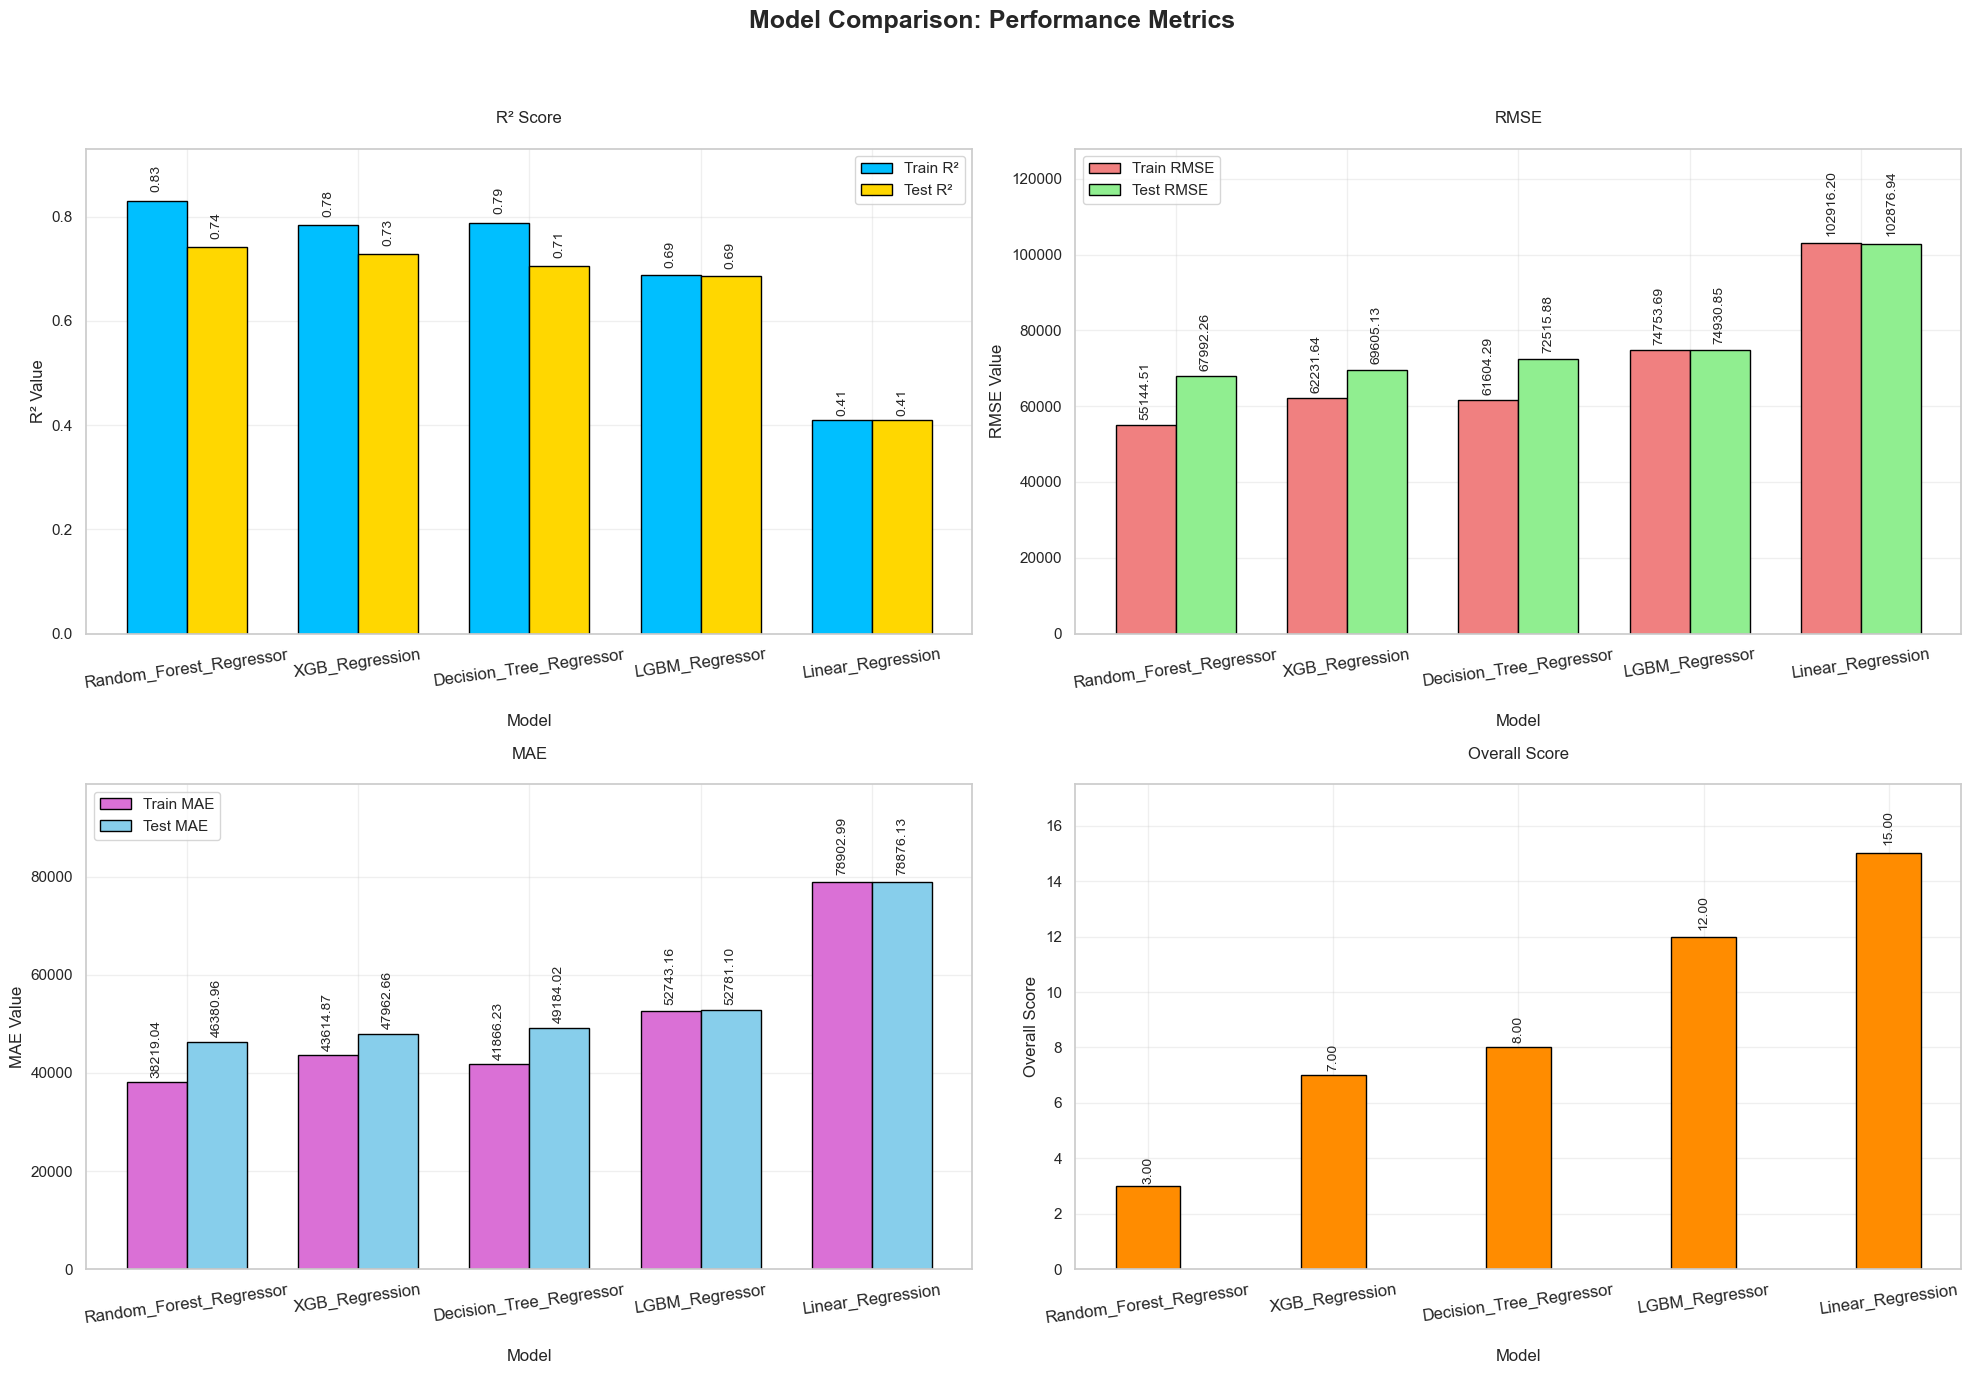

In [136]:
model_names = all_model_comparison['Model']
x           = np.arange(len(model_names))  # Define x-axis positions
bar_width   = 0.35

r2_color_train, r2_color_test     = 'deepskyblue', 'gold'
rmse_color_train, rmse_color_test = 'lightcoral', 'lightgreen'
mae_color_train, mae_color_test   = 'orchid', 'skyblue'
overall_score_color               = 'darkorange'

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('Model Comparison: Performance Metrics', fontsize=18, fontweight='bold')

# Function to add values on top of bars
def add_values(ax, bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.02 * yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10, rotation=90)

# R² Plot
train_r2_bars = axs[0, 0].bar(x - bar_width / 2, all_model_comparison['Train_R2'], bar_width, color=r2_color_train, label="Train R²", edgecolor="black")
test_r2_bars   = axs[0, 0].bar(x + bar_width / 2, all_model_comparison['Test_R2'], bar_width, color=r2_color_test, label="Test R²", edgecolor="black")
axs[0, 0].set_title('R² Score\n')
axs[0, 0].set_xlabel('\nModel')
axs[0, 0].set_ylabel('R² Value')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(model_names, rotation=8, ha='center', fontsize=12)
axs[0, 0].legend()
axs[0, 0].grid(alpha=0.3)
axs[0, 0].set_ylim(0, max(all_model_comparison['Train_R2'].max() + 0.10, all_model_comparison['Test_R2'].max() + 0.10))

add_values(axs[0, 0], train_r2_bars)
add_values(axs[0, 0], test_r2_bars)

# RMSE Plot
train_rmse_bars = axs[0, 1].bar(x - bar_width / 2, all_model_comparison['Train_RMSE'], bar_width, color=rmse_color_train, label="Train RMSE", edgecolor="black")
test_rmse_bars   = axs[0, 1].bar(x + bar_width / 2, all_model_comparison['Test_RMSE'], bar_width, color=rmse_color_test, label="Test RMSE", edgecolor="black")

axs[0, 1].set_title('RMSE\n')
axs[0, 1].set_xlabel('\nModel')
axs[0, 1].set_ylabel('RMSE Value')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(model_names, rotation=8, ha='center', fontsize=12)
axs[0, 1].legend(loc='upper left')
axs[0, 1].grid(alpha=0.3)
axs[0, 1].set_ylim(0, max(all_model_comparison['Train_RMSE'].max() + 25000, all_model_comparison['Test_RMSE'].max() + 25000))
add_values(axs[0, 1], train_rmse_bars)
add_values(axs[0, 1], test_rmse_bars)

# MAE Plot
train_mae_bars = axs[1, 0].bar(x - bar_width / 2, all_model_comparison['Train_MAE'], bar_width, color=mae_color_train, label="Train MAE", edgecolor="black")
test_mae_bars  = axs[1, 0].bar(x + bar_width / 2, all_model_comparison['Test_MAE'], bar_width, color=mae_color_test, label="Test MAE", edgecolor="black")
axs[1, 0].set_title('MAE\n')
axs[1, 0].set_xlabel('\nModel')
axs[1, 0].set_ylabel('MAE Value')
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(model_names, rotation=8, ha='center', fontsize=12)
axs[1, 0].legend(loc='upper left')
axs[1, 0].grid(alpha=0.3)
axs[1, 0].set_ylim(0, max(all_model_comparison['Train_MAE'].max() + 20000, all_model_comparison['Test_MAE'].max() + 20000))
add_values(axs[1, 0], train_mae_bars)
add_values(axs[1, 0], test_mae_bars)

# Overall Score Plot
overall_score_bars = axs[1, 1].bar(x, all_model_comparison['Overall_Score'], bar_width, color=overall_score_color, edgecolor="black")

axs[1, 1].set_title('Overall Score\n')
axs[1, 1].set_xlabel('\nModel')
axs[1, 1].set_ylabel('Overall Score')
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(model_names, rotation=8, ha='center', fontsize=12)
axs[1, 1].grid(alpha=0.3)
axs[1, 1].set_ylim(0, all_model_comparison['Overall_Score'].max() + 2.5)
add_values(axs[1, 1], overall_score_bars)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

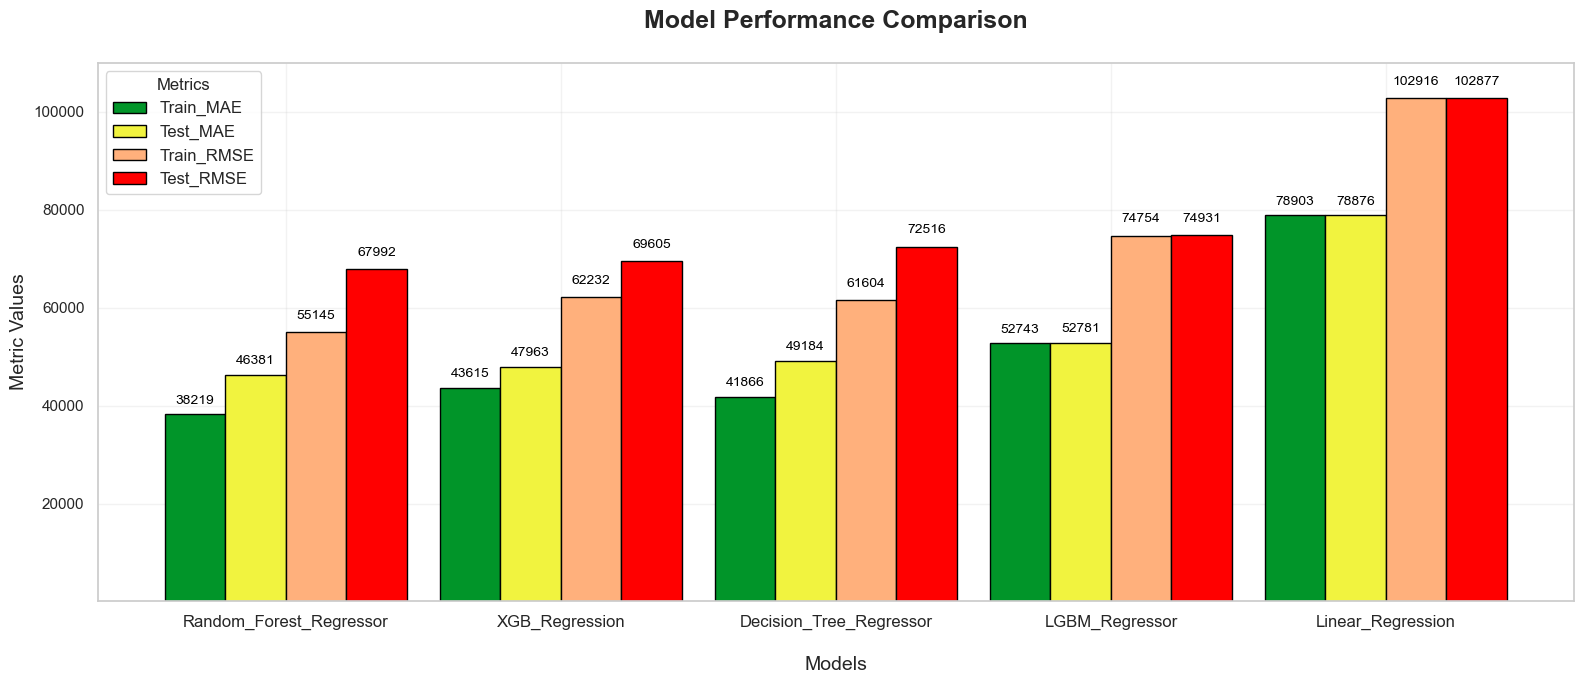

In [137]:
model_names = all_model_comparison['Model']
metrics     = ['Train_MAE', 'Test_MAE', 'Train_RMSE', 'Test_RMSE']
colors      = ['#019529', '#f1f33f', '#ffb07c', '#ff0000']
x           = np.arange(len(model_names)) * 2.5  # Space between groups of bars for each model
bar_width   = 0.55

def add_value_labels(bars):
    for bar in bars:
        y_val = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, y_val + 0.02 * max(all_model_comparison[metric]),
                f'{y_val:.0f}', ha='center', va='bottom', fontsize=10, color='black', rotation=0)

fig, ax = plt.subplots(figsize=(16, 7))

for i, metric in enumerate(metrics):
    bars = ax.bar(x + i * bar_width, all_model_comparison[metric], width=bar_width,
                  color=colors[i], edgecolor='black', label=metric)
    add_value_labels(bars)

ax.set_title('Model Performance Comparison\n', fontsize=18, fontweight='bold')
ax.set_xlabel('\nModels', fontsize=14)
ax.set_ylabel('Metric Values', fontsize=14)
ax.set_xticks(x + (len(metrics) - 1) * bar_width / 2)
ax.set_xticklabels(model_names, rotation=0, ha='center', fontsize=12)
plt.ylim(100, 110000)

ax.legend(metrics, title="Metrics", loc='upper left', fontsize=12)

plt.tight_layout()
plt.grid(alpha=0.25)

plt.show()

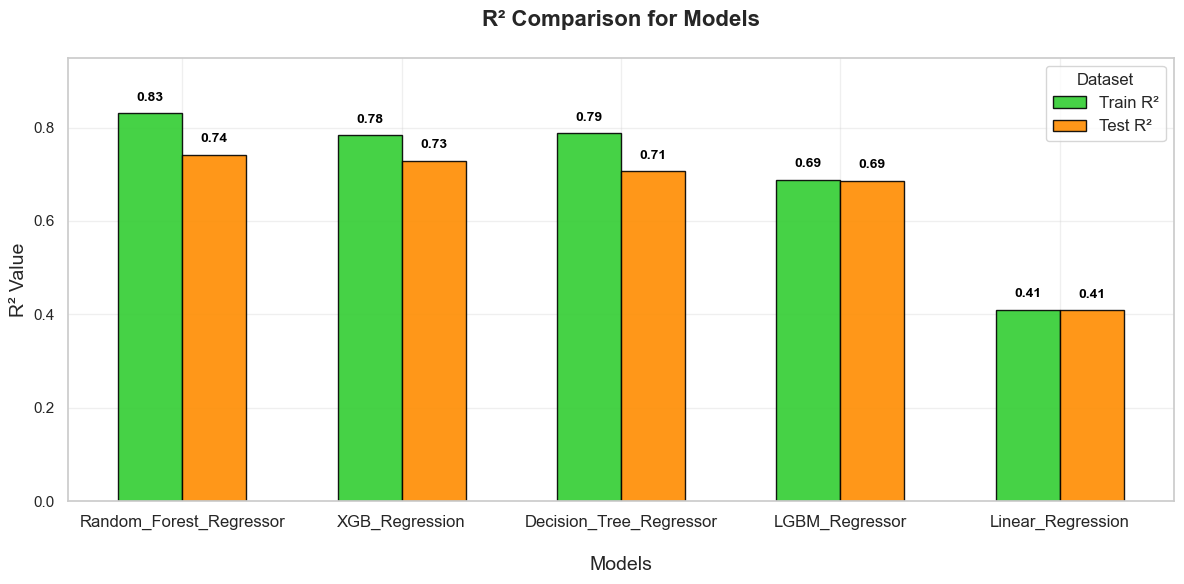

In [138]:
# Set the plot style
sns.set(style ="whitegrid")
bar_width     = 0.4
model_count   = len(all_model_comparison)

def add_value_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 2), ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

r2_train_color = 'limegreen'
r2_test_color  = 'darkorange'
index_r2       = np.arange(model_count) * 1.2
bar_width      = 0.35

plt.figure(figsize=(12, 6))
train_bars = plt.bar(index_r2 - bar_width / 2, all_model_comparison['Train_R2'], bar_width, color=r2_train_color, alpha=0.9, edgecolor="black", label="Train R²")
test_bars  = plt.bar(index_r2 + bar_width / 2, all_model_comparison['Test_R2'], bar_width, color=r2_test_color, alpha=0.9, edgecolor="black", label="Test R²")

plt.title('R² Comparison for Models\n', fontsize=16, fontweight='bold')
plt.xlabel('\nModels', fontsize=14)
plt.ylabel('R² Value', fontsize=14)
plt.xticks(index_r2, all_model_comparison['Model'], ha='center', fontsize=12)
plt.legend(title='Dataset', fontsize=12)
plt.ylim(0, 0.95)

add_value_labels(train_bars)
add_value_labels(test_bars)

plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

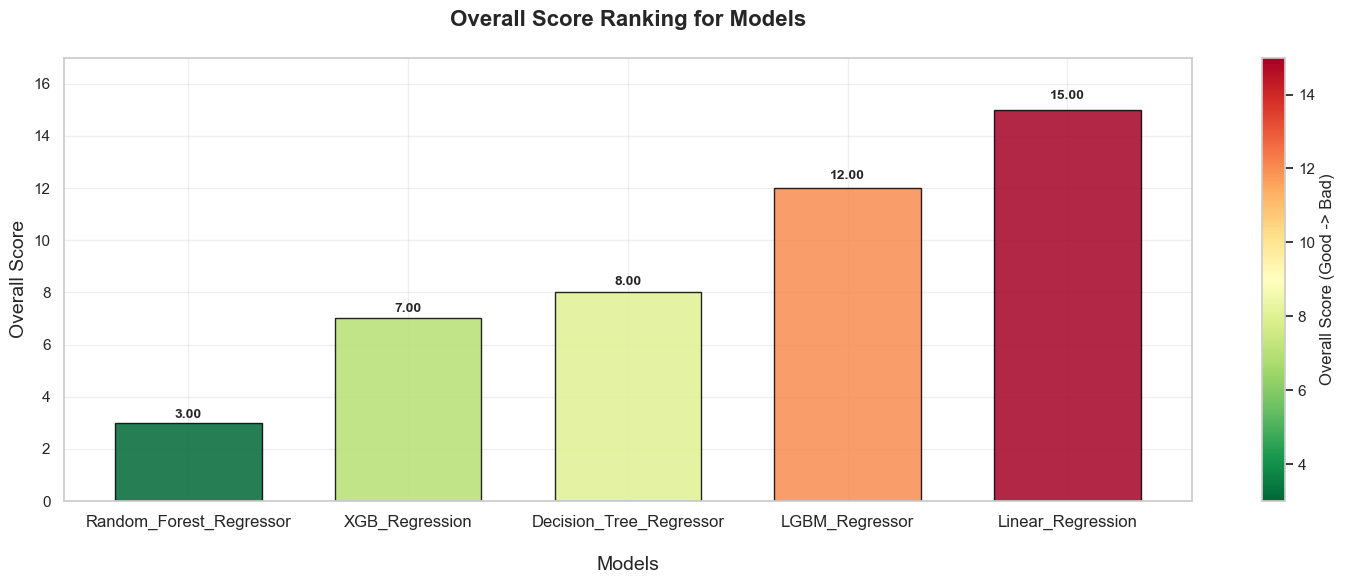

In [139]:
model_count   = len(all_model_comparison)
index_overall = np.arange(model_count) * 1.2
fig_width     = max(10, model_count * 1.2)
fig, ax       = plt.subplots(figsize=(15, 6))

overall_color_map = plt.cm.RdYlGn_r
norm              = mcolors.Normalize(vmin=all_model_comparison['Overall_Score'].min(), vmax=all_model_comparison['Overall_Score'].max())
overall_bars      = ax.bar(index_overall, all_model_comparison['Overall_Score'], color=overall_color_map(norm(all_model_comparison['Overall_Score'])),
                                alpha=0.85, edgecolor="black")

ax.set_title('Overall Score Ranking for Models\n', fontsize=16, fontweight='bold')
ax.set_xlabel('\nModels', fontsize=14)
ax.set_ylabel('Overall Score', fontsize=14)
ax.set_xticks(index_overall)
ax.set_xticklabels(all_model_comparison['Model'], ha='center', fontsize=12)
ax.set_ylim(0, all_model_comparison['Overall_Score'].max() + 2)

def add_value_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.02 * yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

add_value_labels(overall_bars)

sm   = plt.cm.ScalarMappable(cmap=overall_color_map, norm=norm)
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Overall Score (Good -> Bad)', fontsize=12)

ax.grid(alpha=0.3)
plt.tight_layout()

plt.show()

## Model Comparison Analysis

In this comparison, five machine learning models are evaluated using three key performance metrics: **R²**, **RMSE**, and **MAE**, each on both training and testing datasets. Here’s how each metric helps in determining the best model:

### R² (Coefficient of Determination):

**R²** measures the proportion of variance in the target variable that is predictable from the input features. Higher values indicate a better fit, with `1.0` representing a perfect fit. To balance performance across both training and testing, the average **R²** (`R2_Avg`) for each model is calculated.

### RMSE (Root Mean Squared Error):

**RMSE** gives a sense of the prediction error’s magnitude in the same units as the target variable. Lower **RMSE** values represent better model performance. Similar to **R²**, an average **RMSE** (`RMSE_Avg`) across training and testing is calculated to reflect a model’s overall error.

### MAE (Mean Absolute Error):

**MAE** provides the mean absolute deviation of predictions from the actual values, also in the target's units. Lower **MAE** values are preferred, and again, an average (`MAE_Avg`) is computed for balanced training and testing performance.

---

### Ranking Criteria

To identify the best model, each metric's average is used to rank the models:

- **R² Ranking**: Models are ranked from highest to lowest `R2_Avg`, prioritizing models that explain the most variance.

- **RMSE and MAE Rankings**: Models are ranked from lowest to highest `RMSE_Avg` and `MAE_Avg` to favor models with minimal error.

- The **Overall_Score** is then computed as the sum of the `R2_Rank`, `RMSE_Rank`, and `MAE_Rank` for each model. A lower **Overall_Score** suggests balanced performance across metrics and is used as the final criterion to identify the best model.

---

# Selection of Best Model

Based on the rankings, the **Random_Forest_Regressor** model is identified as the best model with an **Overall_Score of `3`**. It ranks as follows:

- **R² Rank**: `1st`, indicating it explains variance very well (**Train_R2**: `0.8307`, **Test_R2**: `0.7419`), Minimal overfitting: Train R² and Test R² are close.

- **RMSE Rank**: `1st`, showing the lowest average prediction error across datasets (**Train_RMSE**: `55136.7522`, **Test_RMSE**: `67997.5357`).

- **MAE Rank**: `1st`, also demonstrating the lowest mean error (**Train_MAE**: `38227.6441`, **Test_MAE**: `46387.1159`).

---

In [141]:
joblib.dump(random_forest_model, saving_path + 'prediction_model.joblib')[0]

'./datasets/results_dir/prediction_model.joblib'

In [142]:
# Define function to plot feature importances
def plot_feature_importance(importances, feature_names, model_name, how_many_features, p=3):
    # Ensure p is at least 0 (no decimal places)
    if p < 0:
        p = 0

    # Create a DataFrame for easier sorting
    importance_df = pd.DataFrame({'Feature': feature_names,
                                  'Importance': importances})

    # Sort by importance and get the specified top features
    top_features = importance_df.nlargest(how_many_features, 'Importance')

    # Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=top_features, palette='RdYlGn_r')

    # Add title and labels
    plt.title(f'Top {how_many_features} Feature Importance for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')

    # Add values on top of each bar with the precise value
    for index, value in enumerate(top_features['Importance']):
        # Use format to display the exact value without unnecessary rounding
        plt.text(value, index, f'{value:.{p}f}', va='center')  # Adjust precision based on p

    plt.tight_layout()
    plt.show()

all_features = X_train_scaled.shape[0]

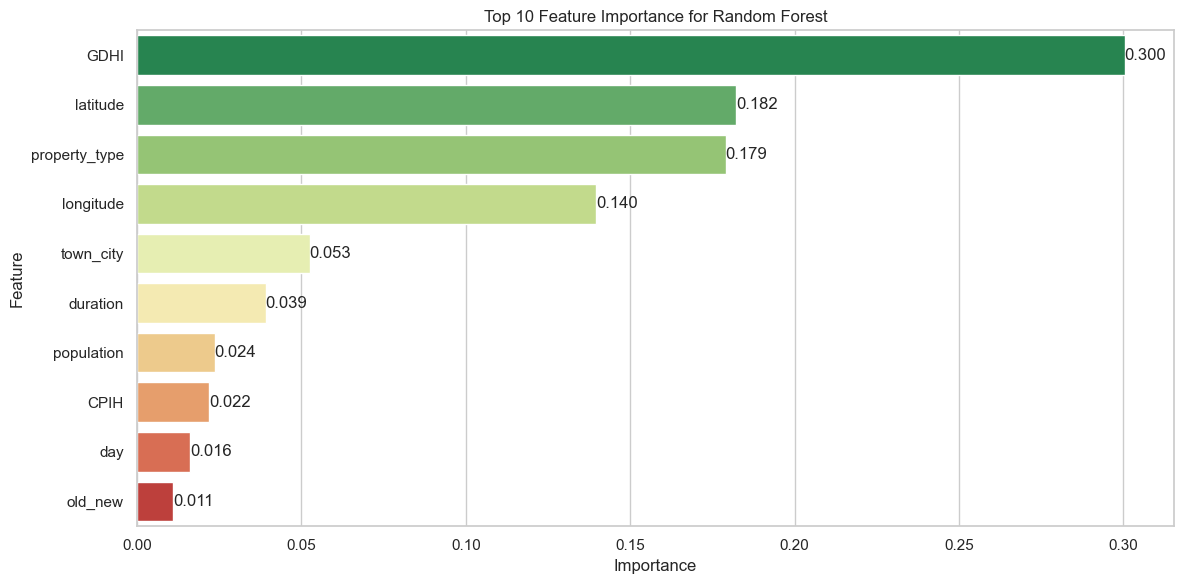

In [143]:
# Random Forest Feature Importance
feature_names = X_train.columns
rf_importances = random_forest_model.feature_importances_
plot_feature_importance(rf_importances, feature_names, 'Random Forest', p=3, how_many_features=10)

# Feature Importance Analysis for the best performing Model

The **Random Forest Regressor** provides insights into the relative importance of features based on their contributions to the decision trees within the forest:

#### Top Contributing Features:

- **GDHI** (`0.301`): The most influential feature, indicating that regional household income significantly impacts the target variable.  

- **Property Type** (`0.179`): Highlights the importance of property characteristics in driving predictions.  

- **Latitude** (`0.182`) and **Longitude** (`0.139`): Together, these geographic indicators capture spatial factors critical to the model’s predictions.

#### Moderately Contributing Features:

- **Town/City** (`0.053`): Reflects location-specific economic or market conditions.  

- **CPIH** (`0.022`): Suggests the influence of housing market inflation rates.  

- **Population** (`0.024`): Indicates the impact of demographic factors on property demand.

#### Lower Contributing Features:

- Macro-economic factors like **GDP** and **Bank Rate** play minimal roles in the model, reflecting their limited direct impact on the predictions.

#### Interpretation:  

The model heavily relies on economic and geographic features, such as **GDHI**, **Latitude**, and **Longitude**, which aligns with the importance of these factors in real estate and property value predictions.

---

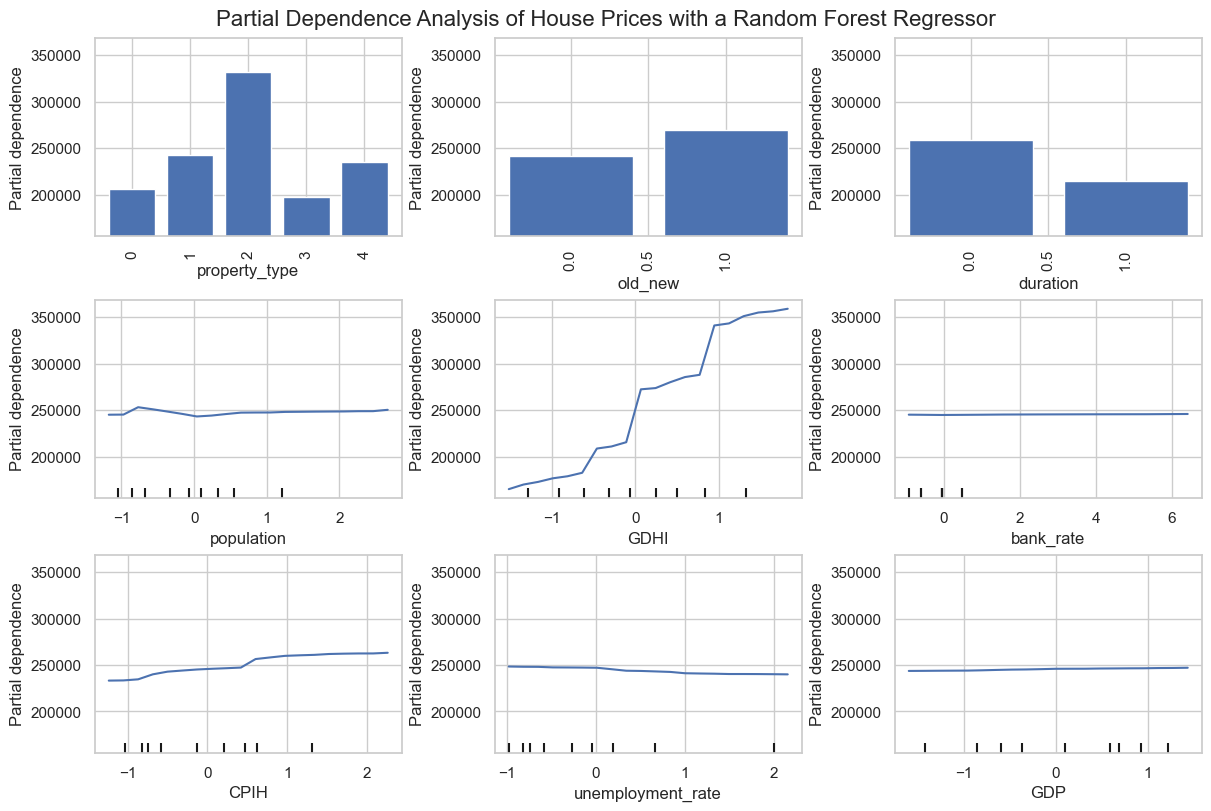

In [145]:
from sklearn.inspection import PartialDependenceDisplay

# Common parameters for the partial dependence plot
common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "random_state": 0,
}

features =['property_type','old_new','duration','population', 'GDHI', 'bank_rate', 'CPIH', 'unemployment_rate', 'GDP']
categorical_features = ['property_type','old_new','duration']

features_info = {
    # Features of interest
    "features": features,
    # Type of partial dependence plot
    "kind": "average",
    # Information regarding categorical features
    "categorical_features": categorical_features,
}

# Set up subplots (3 rows, 3 columns) to match the number of features
_, ax = plt.subplots(ncols=3, nrows=3, figsize=(12, 8), constrained_layout=True)

# Flatten the ax array to make it easier to work with
ax = ax.ravel()

# Generate the partial dependence display
display = PartialDependenceDisplay.from_estimator(
    random_forest_model,
    X_train_scaled,
    **features_info,
    ax=ax,
    **common_params,
)

# Add a title to the figure
_ = display.figure_.suptitle(
    (
        "Partial Dependence Analysis of House Prices with a Random Forest Regressor"
    ),
    fontsize=16,
)

# Display the plot
plt.show()

### Partial Dependence Analysis of House Prices with a Random Forest Regressor

Observations and interpretation of each plot:

1. **Property Type**:
   - The PDP for property type shows that different property types have varying impacts on house prices. The categories for property type are:
     - `T (Terraced) → 0`: Includes Terraced and end-of-terrace properties.
     - `S (Semi-Detached) → 1`: Houses that share one wall with a neighboring property.
     - `D (Detached) → 2`: Houses that stand alone with no shared walls.
     - `F (Flats/Maisonettes) → 3`: Multi-story or apartment-style properties.
     - `O (Other) → 4`: Used for properties that do not fit into the above categories, such as large parcels of land or multi-unit properties.
     
     The plot shows that detached properties (D→ 2) have the highest prices, followed by semi-detached (S→ 1) and terraced properties (T→ 0). Flats and maisonettes (F→ 3) and properties in the "Other" category (O→ 4) generally have lower house prices, which aligns with common market trends where detached houses tend to be more expensive.

2. **Old/New**:
   - The "Old/New" feature indicates whether the property is newly built (Y) or an established residential building (N).
      - `Y (Newly built) → 1`
      - `N (an established residential building) → 0`
     The PDP shows that newly built properties (Y→ 1) tend to have higher prices compared to older properties (N→ 0). This suggests that newer properties are often valued higher in the market, possibly due to their modern amenities and construction standards.

3. **Duration**:
   - The "Duration" feature relates to the tenure type of the property, where:
     - `F (Freehold) → 0`: The owner has full ownership of the property and land.
     - `L (Leasehold) → 1`: The owner only owns the property, but the land is leased from a landlord.
     
     The PDP for duration shows that freehold properties (F) tend to have higher prices compared to leasehold properties (L). This is consistent with market behavior, where freehold properties are generally more desirable and tend to be priced higher than leasehold properties.

4. **Population**:
   - The plot for population shows little to no impact on house prices across its range of values. This suggests that population size, as captured in the model, does not have a significant effect on house prices in this case.

5. **GDHI (Gross Disposable Household Income)**:
   - GDHI shows a clear positive relationship with house prices. As GDHI increases, so do the house prices. Higher household income typically allows individuals to afford more expensive properties, thus driving up property values in areas with higher incomes.

6. **Bank Rate**:
   - The plot for the bank rate is relatively flat, showing little to no impact on house prices. This suggests that changes in the bank rate do not significantly affect house prices within the model. However, the bank rate often indirectly affects housing prices, as lower rates can encourage more borrowing and drive up demand for properties.

7. **CPIH (Consumer Prices Index - Housing)**:
   - The PDP for CPIH shows a slight positive impact on house prices, suggesting that as inflation (or cost of living adjustments) rises, house prices tend to increase as well. This may be due to rising construction costs or higher demand for housing during inflationary periods.

8. **Unemployment Rate**:
   - The unemployment rate plot is almost flat, indicating minimal effect on house prices. While high unemployment might lead to reduced demand in the housing market, in this dataset, it does not appear to have a strong direct influence on house prices.

9. **GDP (Gross Domestic Product)**:
   - The GDP feature also shows minimal effect on house prices, suggesting that the general economic output, as captured by GDP, does not heavily influence property values in this model. However, GDP growth could influence housing prices indirectly through factors like employment and income.

### Key Findings from Partial Dependence Plots (PDP):

| **Feature**               | **Mapping**                     | **Key Findings**                                                                 |
|---------------------------|----------------------------------|----------------------------------------------------------------------------------|
| **Property Type**          | T → 0, S → 1, D → 2, F → 3, O → 4 | - Detached properties (D) have the highest prices, followed by semi-detached (S) and terraced properties (T).<br> - Flats and maisonettes (F) and properties in the "Other" category (O) generally have lower house prices. |
| **Old/New**                | Y → 1, N → 0                     | - Newly built properties (Y) tend to have higher prices compared to older properties (N).<br> - Newer properties are valued higher due to modern amenities and construction standards. |
| **Duration**               | F → 0, L → 1                     | - Freehold properties (F) tend to have higher prices compared to leasehold properties (L).<br> - Freehold properties are generally more desirable and priced higher in the market. |
| **Population**             | N/A                              | - Population size has little to no effect on house prices in this model.             |
| **GDHI (Gross Disposable Household Income)** | N/A                              | - Higher GDHI shows a clear positive relationship with house prices.<br> - Higher income levels allow individuals to afford more expensive properties, driving up prices in wealthier areas. |
| **Bank Rate**              | N/A                              | - The bank rate has minimal impact on house prices in the model.<br> - Lower bank rates could indirectly encourage more borrowing, though it does not show a strong effect in this dataset. |
| **CPIH (Consumer Prices Index - Housing)** | N/A                              | - CPIH shows a slight positive impact on house prices, indicating that higher inflation or cost of living adjustments lead to higher property prices. |
| **Unemployment Rate**     | N/A                              | - Unemployment rate shows minimal effect on house prices in this dataset.<br> - While high unemployment could reduce demand, it does not significantly impact house prices in this case. |
| **GDP (Gross Domestic Product)** | N/A                              | - GDP has little effect on house prices in this model.<br> - While GDP growth can influence house prices indirectly, it does not show a strong direct effect. |
